#  Avocado Price Prediction and Region Classification Project

# 1. Introduction

# Project Description
This data was downloaded from the Hass Avocado Board website in May of 2018 & compiled into a single CSV. 
The table below represents weekly 2018 retail scan data for National retail volume (units) and price. Retail scan data comes directly from retailers’ cash registers based on actual retail sales of Hass avocados. 
Starting in 2013, the table below reflects an expanded, multi-outlet retail data set. Multi-outlet reporting includes an aggregation of the following channels: grocery, mass, club, drug, dollar and military. The Average Price (of avocados) in the table reflects a per unit (per avocado) cost, even when multiple units (avocados) are sold in bags. 
The Product Lookup codes (PLU’s) in the table are only for Hass avocados. Other varieties of avocados (e.g. greenskins) are not included in this table.


# Dataset Attributes
- **Date:** The date of the observation.
- **AveragePrice:** The average price of a single avocado.
- **Type:** Whether the avocado is conventional or organic.
- **Year:** The year of observation.
- **Region:** The city or region of the observation.
- **Total Volume:** Total number of avocados sold.
- **4046, 4225, 4770:** Total number of avocados with PLU 4046, 4225, and 4770 sold respectively.

# Objective:
1. To predict the average price of avocados using regression techniques.
2. To classify regions based on provided features using classification techniques.


# Type of Project:
This is a machine learning project involving both regression and classification tasks.

# Inspiration /Label 
The dataset can be seen in two angles to find the region and find the average price .
Task: One of Classification and other of Regression
Do both tasks in the same .ipynb file and submit at single file. 


# Tasks:
- Regression: Predicting average avocado price.
- Classification: Predicting the region.


# File Format:
The project will be implemented in a Jupyter Notebook (.ipynb) file containing both regression and classification tasks, along with data preprocessing, model training, evaluation, and interpretation.

By combining regression and classification tasks in the same project, the aim is to provide a comprehensive analysis of the avocado dataset, exploring both continuous and categorical predictions.

# 2. Data Cleaning



# Import important library :

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import pickle
import warnings
warnings.filterwarnings('ignore')

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_absolute_error
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor, ExtraTreesClassifier, ExtraTreesRegressor
from xgboost import XGBRegressor


C:\Users\javed_wed9jdh\AppData\Roaming\Python\Python311\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [3]:
df= pd.read_csv(r"C:\Users\JAVED\Documents\avocado.csv")

In [4]:
df

Unnamed: 0        Date  AveragePrice  Total Volume     4046       4225  \
0               0  2015-12-27          1.33      64236.62  1036.74   54454.85   
1               1  2015-12-20          1.35      54876.98   674.28   44638.81   
2               2  2015-12-13          0.93     118220.22   794.70  109149.67   
3               3  2015-12-06          1.08      78992.15  1132.00   71976.41   
4               4  2015-11-29          1.28      51039.60   941.48   43838.39   
...           ...         ...           ...           ...      ...        ...   
18244           7  2018-02-04          1.63      17074.83  2046.96    1529.20   
18245           8  2018-01-28          1.71      13888.04  1191.70    3431.50   
18246           9  2018-01-21          1.87      13766.76  1191.92    2452.79   
18247          10  2018-01-14          1.93      16205.22  1527.63    2981.04   
18248          11  2018-01-07          1.62      17489.58  2894.77    2356.13   

         4770  Total Bags  Small Bags  Large Bags  XLarge Bags          type  \
0       48.16     8696.87     8603.62       93.25          0.0  conventional   
1       58.33     9505.56     9408.07       97.49          0.0  conventional   
2      130.50     8145.35     8042.21      103.14          0.0  conventional   
3       72.58     5811.16     5677.40      133.76          0.0  conventional   
4       75.78     6183.95     5986.26      197.69          0.0  conventional   
...       ...         ...         ...         ...          ...           ...   
18244    0.00    13498.67    13066.82      431.85          0.0       organic   
18245    0.00     9264.84     8940.04      324.80          0.0       organic   
18246  727.94     9394.11     9351.80       42.31          0.0       organic   
18247  727.01    10969.54    10919.54       50.00          0.0       organic   
18248  224.53    12014.15    11988.14       26.01          0.0       organic   

       year            region  
0      2015            Albany  
1      2015            Albany  
2      2015            Albany  
3      2015            Albany  
4      2015            Albany  
...     ...               ...  
18244  2018  WestTexNewMexico  
18245  2018  WestTexNewMexico  
18246  2018  WestTexNewMexico  
18247  2018  WestTexNewMexico  
18248  2018  WestTexNewMexico  

[18249 rows x 14 columns]

In [5]:
df.head()#first 5 rows

Unnamed: 0        Date  AveragePrice  Total Volume     4046       4225  \
0           0  2015-12-27          1.33      64236.62  1036.74   54454.85   
1           1  2015-12-20          1.35      54876.98   674.28   44638.81   
2           2  2015-12-13          0.93     118220.22   794.70  109149.67   
3           3  2015-12-06          1.08      78992.15  1132.00   71976.41   
4           4  2015-11-29          1.28      51039.60   941.48   43838.39   

     4770  Total Bags  Small Bags  Large Bags  XLarge Bags          type  \
0   48.16     8696.87     8603.62       93.25          0.0  conventional   
1   58.33     9505.56     9408.07       97.49          0.0  conventional   
2  130.50     8145.35     8042.21      103.14          0.0  conventional   
3   72.58     5811.16     5677.40      133.76          0.0  conventional   
4   75.78     6183.95     5986.26      197.69          0.0  conventional   

   year  region  
0  2015  Albany  
1  2015  Albany  
2  2015  Albany  
3  2015  Albany  
4  2015  Albany

In [6]:
df.tail()#last 5 rows

Unnamed: 0        Date  AveragePrice  Total Volume     4046     4225  \
18244           7  2018-02-04          1.63      17074.83  2046.96  1529.20   
18245           8  2018-01-28          1.71      13888.04  1191.70  3431.50   
18246           9  2018-01-21          1.87      13766.76  1191.92  2452.79   
18247          10  2018-01-14          1.93      16205.22  1527.63  2981.04   
18248          11  2018-01-07          1.62      17489.58  2894.77  2356.13   

         4770  Total Bags  Small Bags  Large Bags  XLarge Bags     type  year  \
18244    0.00    13498.67    13066.82      431.85          0.0  organic  2018   
18245    0.00     9264.84     8940.04      324.80          0.0  organic  2018   
18246  727.94     9394.11     9351.80       42.31          0.0  organic  2018   
18247  727.01    10969.54    10919.54       50.00          0.0  organic  2018   
18248  224.53    12014.15    11988.14       26.01          0.0  organic  2018   

                 region  
18244  WestTexNewMexico  
18245  WestTexNewMexico  
18246  WestTexNewMexico  
18247  WestTexNewMexico  
18248  WestTexNewMexico

# Exploratory Data Analysis (EDA)

In [7]:
df.shape

(18249, 14)

The dataset consists of 18249 rows and 14 columns, which include both features and labels.

In [8]:
df.isnull().sum()

Unnamed: 0      0
Date            0
AveragePrice    0
Total Volume    0
4046            0
4225            0
4770            0
Total Bags      0
Small Bags      0
Large Bags      0
XLarge Bags     0
type            0
year            0
region          0
dtype: int64

No Missing values were detected in the columns.

In [9]:
df.columns

Index(['Unnamed: 0', 'Date', 'AveragePrice', 'Total Volume', '4046', '4225',
       '4770', 'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags', 'type',
       'year', 'region'],
      dtype='object')

In [10]:
df.dtypes

Unnamed: 0        int64
Date             object
AveragePrice    float64
Total Volume    float64
4046            float64
4225            float64
4770            float64
Total Bags      float64
Small Bags      float64
Large Bags      float64
XLarge Bags     float64
type             object
year              int64
region           object
dtype: object

The dataset comprises integers, floats, and object data types. The date column is currently represented as an object, requiring conversion to datetime format.

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    18249 non-null  int64  
 1   Date          18249 non-null  object 
 2   AveragePrice  18249 non-null  float64
 3   Total Volume  18249 non-null  float64
 4   4046          18249 non-null  float64
 5   4225          18249 non-null  float64
 6   4770          18249 non-null  float64
 7   Total Bags    18249 non-null  float64
 8   Small Bags    18249 non-null  float64
 9   Large Bags    18249 non-null  float64
 10  XLarge Bags   18249 non-null  float64
 11  type          18249 non-null  object 
 12  year          18249 non-null  int64  
 13  region        18249 non-null  object 
dtypes: float64(9), int64(2), object(3)
memory usage: 1.9+ MB


In [12]:
df.describe()

Unnamed: 0  AveragePrice  Total Volume          4046          4225  \
count  18249.000000  18249.000000  1.824900e+04  1.824900e+04  1.824900e+04   
mean      24.232232      1.405978  8.506440e+05  2.930084e+05  2.951546e+05   
std       15.481045      0.402677  3.453545e+06  1.264989e+06  1.204120e+06   
min        0.000000      0.440000  8.456000e+01  0.000000e+00  0.000000e+00   
25%       10.000000      1.100000  1.083858e+04  8.540700e+02  3.008780e+03   
50%       24.000000      1.370000  1.073768e+05  8.645300e+03  2.906102e+04   
75%       38.000000      1.660000  4.329623e+05  1.110202e+05  1.502069e+05   
max       52.000000      3.250000  6.250565e+07  2.274362e+07  2.047057e+07   

               4770    Total Bags    Small Bags    Large Bags    XLarge Bags  \
count  1.824900e+04  1.824900e+04  1.824900e+04  1.824900e+04   18249.000000   
mean   2.283974e+04  2.396392e+05  1.821947e+05  5.433809e+04    3106.426507   
std    1.074641e+05  9.862424e+05  7.461785e+05  2.439660e+05   17692.894652   
min    0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00       0.000000   
25%    0.000000e+00  5.088640e+03  2.849420e+03  1.274700e+02       0.000000   
50%    1.849900e+02  3.974383e+04  2.636282e+04  2.647710e+03       0.000000   
75%    6.243420e+03  1.107834e+05  8.333767e+04  2.202925e+04     132.500000   
max    2.546439e+06  1.937313e+07  1.338459e+07  5.719097e+06  551693.650000   

               year  
count  18249.000000  
mean    2016.147899  
std        0.939938  
min     2015.000000  
25%     2015.000000  
50%     2016.000000  
75%     2017.000000  
max     2018.000000

In [13]:
df.duplicated().sum()

0

In the dataset, there are no duplicate values present.

In [14]:
# checking the number of unique values in each column
df.nunique().to_frame("no.of unique values")

no.of unique values
Unnamed: 0                     53
Date                          169
AveragePrice                  259
Total Volume                18237
4046                        17702
4225                        18103
4770                        12071
Total Bags                  18097
Small Bags                  17321
Large Bags                  15082
XLarge Bags                  5588
type                            2
year                            4
region                         54

In [15]:
# checking the value counts of each column
for i in df.columns:
    print(df[i].value_counts())
    print('/n')

Unnamed: 0
0     432
7     432
1     432
11    432
9     432
8     432
10    432
6     432
5     432
4     432
3     432
2     432
41    324
34    324
35    324
36    324
37    324
38    324
39    324
40    324
47    324
42    324
43    324
44    324
45    324
46    324
32    324
48    324
49    324
50    324
33    324
26    324
31    324
30    324
12    324
13    324
14    324
15    324
16    324
17    324
18    324
19    324
20    324
21    324
22    324
23    324
24    324
25    324
27    324
28    324
29    324
51    322
52    107
Name: count, dtype: int64
/n
Date
2015-12-27    108
2017-12-24    108
2017-12-10    108
2017-12-03    108
2017-11-26    108
             ... 
2016-11-06    108
2018-01-07    108
2017-06-18    107
2017-06-25    107
2015-12-06    107
Name: count, Length: 169, dtype: int64
/n
AveragePrice
1.15    202
1.18    199
1.08    194
1.26    193
1.13    192
       ... 
3.25      1
3.12      1
2.68      1
3.03      1
3.17      1
Name: count, Length: 259, dtype: int64
/

From the above result, it's evident that there are no zero values or white spaces present in the dataset.

In [16]:
nul_val=df.isnull()

In [17]:
#returns counts of values where True if null
for column in nul_val.columns.values.tolist():
    print(column)
    print (nul_val[column].value_counts())
    print("")  

Unnamed: 0
Unnamed: 0
False    18249
Name: count, dtype: int64

Date
Date
False    18249
Name: count, dtype: int64

AveragePrice
AveragePrice
False    18249
Name: count, dtype: int64

Total Volume
Total Volume
False    18249
Name: count, dtype: int64

4046
4046
False    18249
Name: count, dtype: int64

4225
4225
False    18249
Name: count, dtype: int64

4770
4770
False    18249
Name: count, dtype: int64

Total Bags
Total Bags
False    18249
Name: count, dtype: int64

Small Bags
Small Bags
False    18249
Name: count, dtype: int64

Large Bags
Large Bags
False    18249
Name: count, dtype: int64

XLarge Bags
XLarge Bags
False    18249
Name: count, dtype: int64

type
type
False    18249
Name: count, dtype: int64

year
year
False    18249
Name: count, dtype: int64

region
region
False    18249
Name: count, dtype: int64



In [18]:
#Checking null values-
df.isnull().sum()

Unnamed: 0      0
Date            0
AveragePrice    0
Total Volume    0
4046            0
4225            0
4770            0
Total Bags      0
Small Bags      0
Large Bags      0
XLarge Bags     0
type            0
year            0
region          0
dtype: int64

In [19]:
df.isnull().sum().sum()

0

<Axes: >

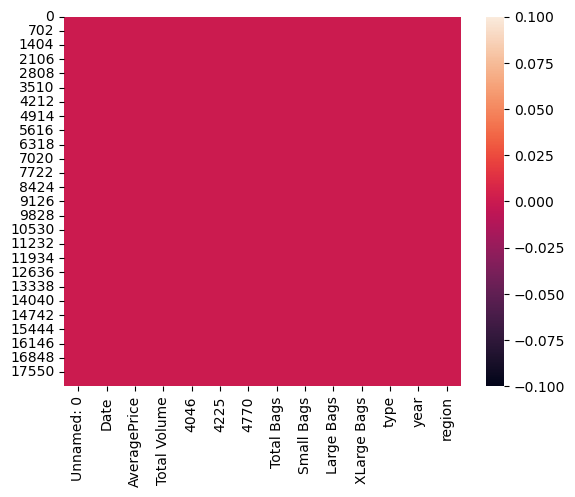

In [20]:
sns.heatmap(df.isnull())

In the dataset, there are no null values present.

In [21]:
#Converting to date time format-
df['Date'] = pd.to_datetime(df.Date, format='%Y-%m-%d')


In [22]:
# Convert 'Date' column to datetime format
df['Date'] = pd.to_datetime(df['Date'])

# Add a new column 'Month' containing the month component of the date
df['Month'] = df['Date'].apply(lambda x: x.month)

# Add a new column 'Day' containing the day component of the date
df['Day'] = df['Date'].apply(lambda x: x.day)


In [23]:
df

Unnamed: 0       Date  AveragePrice  Total Volume     4046       4225  \
0               0 2015-12-27          1.33      64236.62  1036.74   54454.85   
1               1 2015-12-20          1.35      54876.98   674.28   44638.81   
2               2 2015-12-13          0.93     118220.22   794.70  109149.67   
3               3 2015-12-06          1.08      78992.15  1132.00   71976.41   
4               4 2015-11-29          1.28      51039.60   941.48   43838.39   
...           ...        ...           ...           ...      ...        ...   
18244           7 2018-02-04          1.63      17074.83  2046.96    1529.20   
18245           8 2018-01-28          1.71      13888.04  1191.70    3431.50   
18246           9 2018-01-21          1.87      13766.76  1191.92    2452.79   
18247          10 2018-01-14          1.93      16205.22  1527.63    2981.04   
18248          11 2018-01-07          1.62      17489.58  2894.77    2356.13   

         4770  Total Bags  Small Bags  Large Bags  XLarge Bags          type  \
0       48.16     8696.87     8603.62       93.25          0.0  conventional   
1       58.33     9505.56     9408.07       97.49          0.0  conventional   
2      130.50     8145.35     8042.21      103.14          0.0  conventional   
3       72.58     5811.16     5677.40      133.76          0.0  conventional   
4       75.78     6183.95     5986.26      197.69          0.0  conventional   
...       ...         ...         ...         ...          ...           ...   
18244    0.00    13498.67    13066.82      431.85          0.0       organic   
18245    0.00     9264.84     8940.04      324.80          0.0       organic   
18246  727.94     9394.11     9351.80       42.31          0.0       organic   
18247  727.01    10969.54    10919.54       50.00          0.0       organic   
18248  224.53    12014.15    11988.14       26.01          0.0       organic   

       year            region  Month  Day  
0      2015            Albany     12   27  
1      2015            Albany     12   20  
2      2015            Albany     12   13  
3      2015            Albany     12    6  
4      2015            Albany     11   29  
...     ...               ...    ...  ...  
18244  2018  WestTexNewMexico      2    4  
18245  2018  WestTexNewMexico      1   28  
18246  2018  WestTexNewMexico      1   21  
18247  2018  WestTexNewMexico      1   14  
18248  2018  WestTexNewMexico      1    7  

[18249 rows x 16 columns]

In [24]:
# Initialize an empty list to store column names with data type 'object'
object=[]

# Iterate through the columns of the DataFrame
for column in df.columns:
    # Check if the data type of the column is 'object'
    if df[column].dtype == 'object':
        # If the data type is 'object', append the column name to the list
        object.append(column)


In [25]:
object

['type', 'region']

In [26]:
# Drop the 'Unnamed: 0' column from the DataFrame
df = df.drop(columns=['Unnamed: 0'], axis=1)


In [27]:
df

Date  AveragePrice  Total Volume     4046       4225    4770  \
0     2015-12-27          1.33      64236.62  1036.74   54454.85   48.16   
1     2015-12-20          1.35      54876.98   674.28   44638.81   58.33   
2     2015-12-13          0.93     118220.22   794.70  109149.67  130.50   
3     2015-12-06          1.08      78992.15  1132.00   71976.41   72.58   
4     2015-11-29          1.28      51039.60   941.48   43838.39   75.78   
...          ...           ...           ...      ...        ...     ...   
18244 2018-02-04          1.63      17074.83  2046.96    1529.20    0.00   
18245 2018-01-28          1.71      13888.04  1191.70    3431.50    0.00   
18246 2018-01-21          1.87      13766.76  1191.92    2452.79  727.94   
18247 2018-01-14          1.93      16205.22  1527.63    2981.04  727.01   
18248 2018-01-07          1.62      17489.58  2894.77    2356.13  224.53   

       Total Bags  Small Bags  Large Bags  XLarge Bags          type  year  \
0         8696.87     8603.62       93.25          0.0  conventional  2015   
1         9505.56     9408.07       97.49          0.0  conventional  2015   
2         8145.35     8042.21      103.14          0.0  conventional  2015   
3         5811.16     5677.40      133.76          0.0  conventional  2015   
4         6183.95     5986.26      197.69          0.0  conventional  2015   
...           ...         ...         ...          ...           ...   ...   
18244    13498.67    13066.82      431.85          0.0       organic  2018   
18245     9264.84     8940.04      324.80          0.0       organic  2018   
18246     9394.11     9351.80       42.31          0.0       organic  2018   
18247    10969.54    10919.54       50.00          0.0       organic  2018   
18248    12014.15    11988.14       26.01          0.0       organic  2018   

                 region  Month  Day  
0                Albany     12   27  
1                Albany     12   20  
2                Albany     12   13  
3                Albany     12    6  
4                Albany     11   29  
...                 ...    ...  ...  
18244  WestTexNewMexico      2    4  
18245  WestTexNewMexico      1   28  
18246  WestTexNewMexico      1   21  
18247  WestTexNewMexico      1   14  
18248  WestTexNewMexico      1    7  

[18249 rows x 15 columns]

In [28]:
df.describe()

Date  AveragePrice  Total Volume  \
count                          18249  18249.000000  1.824900e+04   
mean   2016-08-13 23:30:43.498273792      1.405978  8.506440e+05   
min              2015-01-04 00:00:00      0.440000  8.456000e+01   
25%              2015-10-25 00:00:00      1.100000  1.083858e+04   
50%              2016-08-14 00:00:00      1.370000  1.073768e+05   
75%              2017-06-04 00:00:00      1.660000  4.329623e+05   
max              2018-03-25 00:00:00      3.250000  6.250565e+07   
std                              NaN      0.402677  3.453545e+06   

               4046          4225          4770    Total Bags    Small Bags  \
count  1.824900e+04  1.824900e+04  1.824900e+04  1.824900e+04  1.824900e+04   
mean   2.930084e+05  2.951546e+05  2.283974e+04  2.396392e+05  1.821947e+05   
min    0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
25%    8.540700e+02  3.008780e+03  0.000000e+00  5.088640e+03  2.849420e+03   
50%    8.645300e+03  2.906102e+04  1.849900e+02  3.974383e+04  2.636282e+04   
75%    1.110202e+05  1.502069e+05  6.243420e+03  1.107834e+05  8.333767e+04   
max    2.274362e+07  2.047057e+07  2.546439e+06  1.937313e+07  1.338459e+07   
std    1.264989e+06  1.204120e+06  1.074641e+05  9.862424e+05  7.461785e+05   

         Large Bags    XLarge Bags          year         Month           Day  
count  1.824900e+04   18249.000000  18249.000000  18249.000000  18249.000000  
mean   5.433809e+04    3106.426507   2016.147899      6.177215     15.662612  
min    0.000000e+00       0.000000   2015.000000      1.000000      1.000000  
25%    1.274700e+02       0.000000   2015.000000      3.000000      8.000000  
50%    2.647710e+03       0.000000   2016.000000      6.000000     16.000000  
75%    2.202925e+04     132.500000   2017.000000      9.000000     23.000000  
max    5.719097e+06  551693.650000   2018.000000     12.000000     31.000000  
std    2.439660e+05   17692.894652      0.939938      3.534130      8.776281

# 3. Data Visualization

# 1.Univariate Analysis-

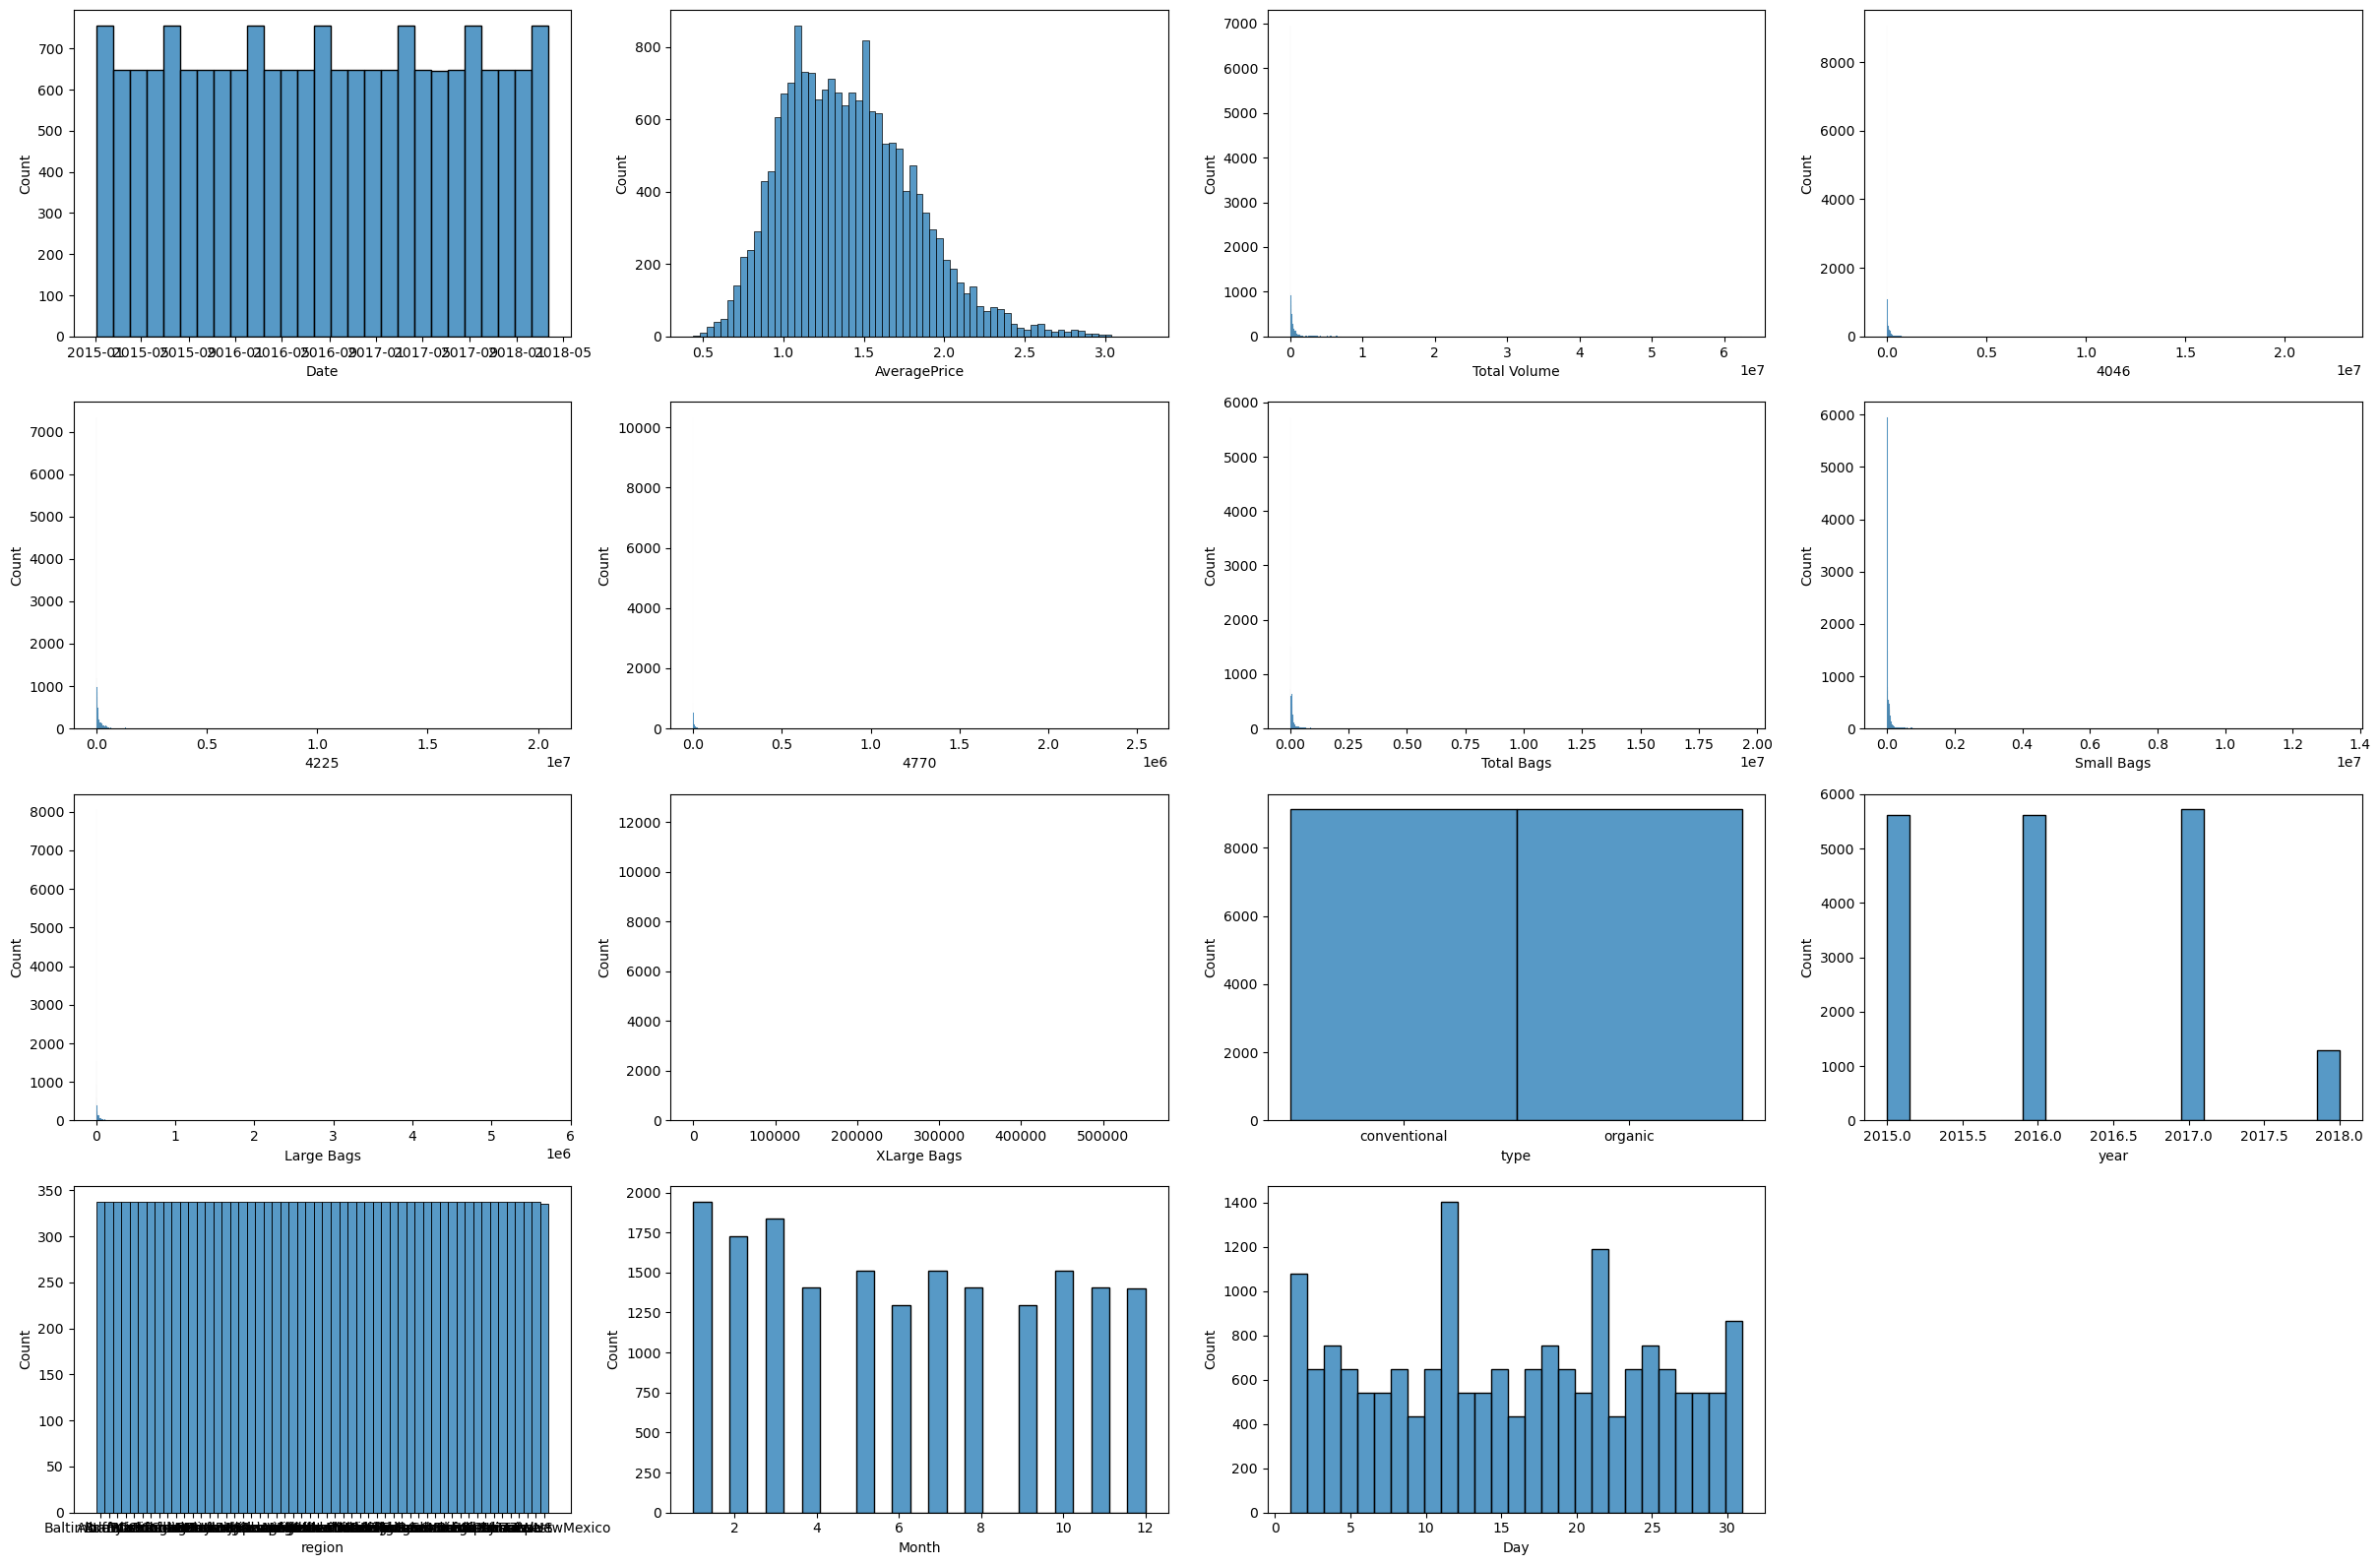

In [219]:
plt.figure(figsize=(30,25))
plotnumber=1

for i in df.columns:
    if plotnumber<=20:
        ax=plt.subplot(5,4,plotnumber)
        sns.histplot(df[i])
        plt.xlabel(i)
    plotnumber+=1
plt.show() 

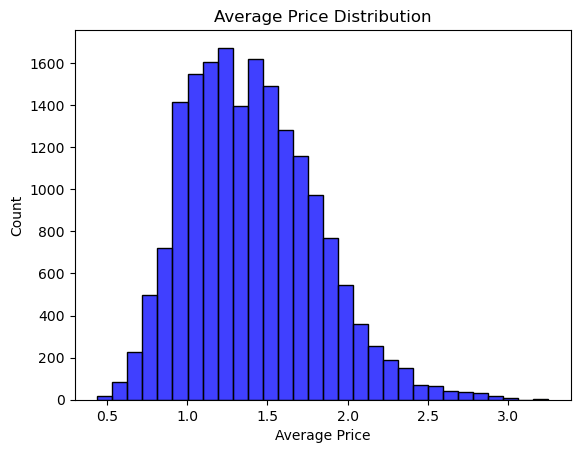

In [220]:
sns.histplot(df['AveragePrice'],color="blue",bins=30)
plt.xlabel("Average Price")
plt.title("Average Price Distribution")
plt.show()

Based on the graph above, it appears that the distribution of average prices is positively skewed.

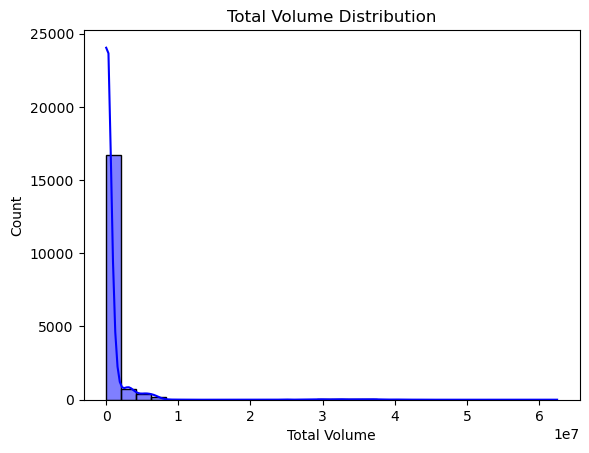

In [221]:
sns.histplot(df['Total Volume'],color="blue",bins=30,kde=True)
plt.xlabel("Total Volume")
plt.title("Total Volume Distribution")
plt.show()

The distribution of data in the total volume column appears to be strongly right-skewed.

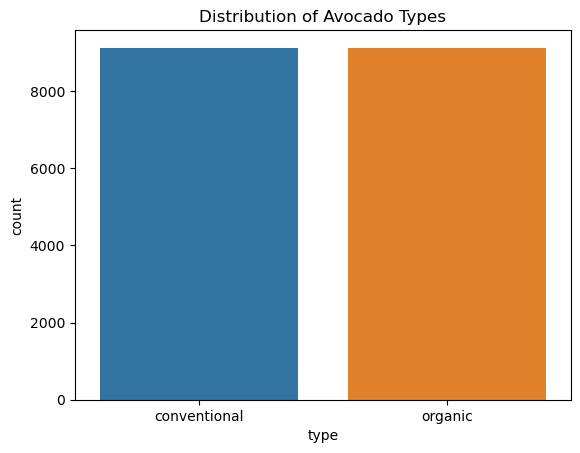

In [222]:
sns.countplot(x='type', data=df)
plt.title('Distribution of Avocado Types')
plt.show()


The counts for both types of avocados, conventional and organic, are equal.

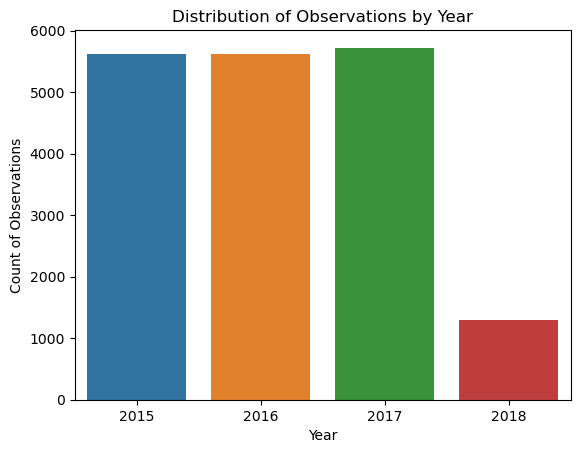

In [223]:
sns.countplot(x='year', data=df)
plt.xlabel('Year')
plt.ylabel('Count of Observations')
plt.title('Distribution of Observations by Year')
plt.show()


The dataset primarily consists of data from the year 2017, with the least amount of data recorded in 2018.

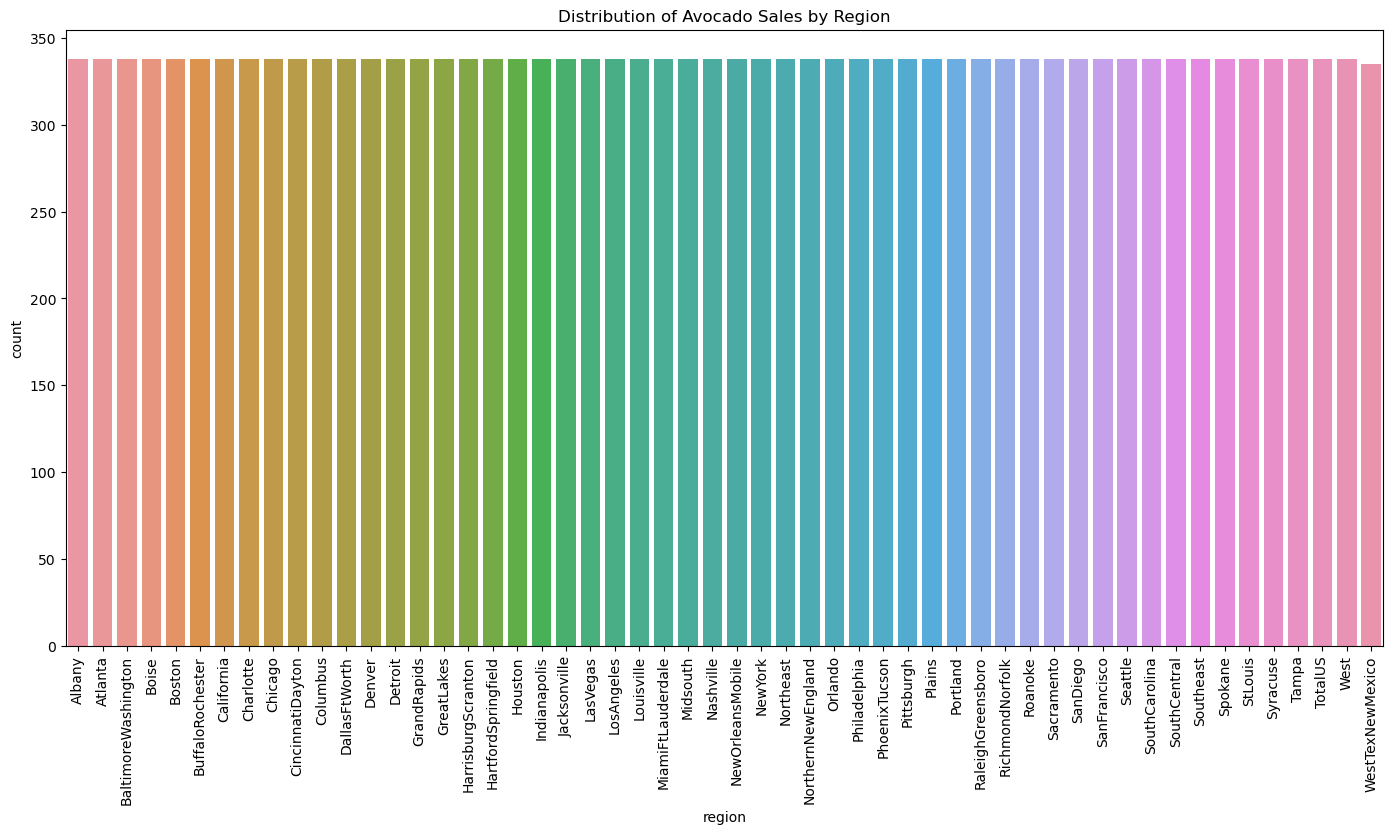

In [224]:
plt.figure(figsize=(17, 8))
sns.countplot(x='region', data=df)
plt.xticks(rotation=90)
plt.title('Distribution of Avocado Sales by Region')
plt.show()

The count of entries for each region in the dataset is approximately equal.

# 2.Bivariate analysis-

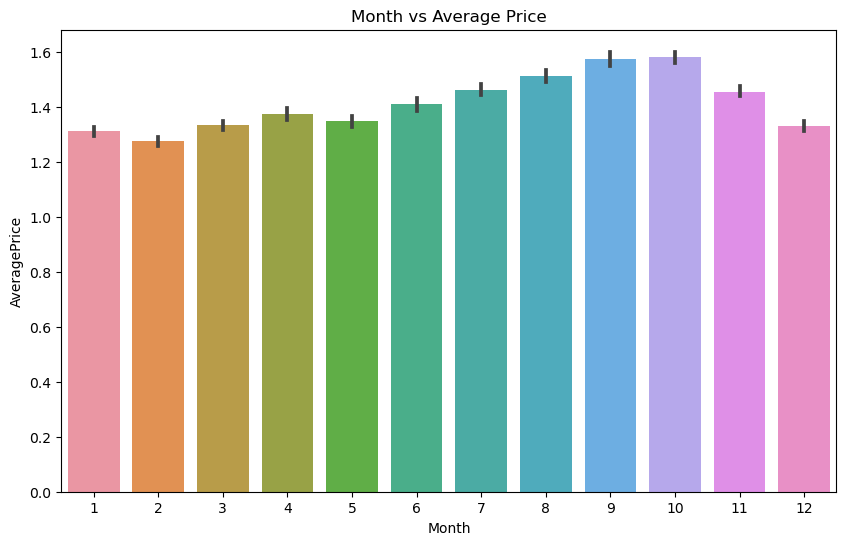

In [225]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set the figure size
plt.figure(figsize=(10, 6))

# Create a bar plot for 'Month' vs 'AveragePrice'
sns.barplot(x='Month', y='AveragePrice', data=df)

# Add a title to the plot
plt.title('Month vs Average Price')

# Show the plot
plt.show()


The graph above demonstrates that average prices peak in September and October, while they are lowest in February. Additionally, the average price of avocados starts to rise significantly after May, continuing until mid-November.

In [377]:
# Correlation between the target variable and features:

In [29]:
df.select_dtypes(include=['float64', 'int64'])

AveragePrice  Total Volume     4046       4225    4770  Total Bags  \
0              1.33      64236.62  1036.74   54454.85   48.16     8696.87   
1              1.35      54876.98   674.28   44638.81   58.33     9505.56   
2              0.93     118220.22   794.70  109149.67  130.50     8145.35   
3              1.08      78992.15  1132.00   71976.41   72.58     5811.16   
4              1.28      51039.60   941.48   43838.39   75.78     6183.95   
...             ...           ...      ...        ...     ...         ...   
18244          1.63      17074.83  2046.96    1529.20    0.00    13498.67   
18245          1.71      13888.04  1191.70    3431.50    0.00     9264.84   
18246          1.87      13766.76  1191.92    2452.79  727.94     9394.11   
18247          1.93      16205.22  1527.63    2981.04  727.01    10969.54   
18248          1.62      17489.58  2894.77    2356.13  224.53    12014.15   

       Small Bags  Large Bags  XLarge Bags  year  Month  Day  
0         8603.62       93.25          0.0  2015     12   27  
1         9408.07       97.49          0.0  2015     12   20  
2         8042.21      103.14          0.0  2015     12   13  
3         5677.40      133.76          0.0  2015     12    6  
4         5986.26      197.69          0.0  2015     11   29  
...           ...         ...          ...   ...    ...  ...  
18244    13066.82      431.85          0.0  2018      2    4  
18245     8940.04      324.80          0.0  2018      1   28  
18246     9351.80       42.31          0.0  2018      1   21  
18247    10919.54       50.00          0.0  2018      1   14  
18248    11988.14       26.01          0.0  2018      1    7  

[18249 rows x 12 columns]

In [30]:
# Exclude non-numeric columns from correlation calculation
numeric_columns = df.select_dtypes(include=['float64', 'int64'])

# Compute the correlation between the target variable 'AveragePrice' and numeric features
correlation_with_average_price = numeric_columns.corr()['AveragePrice'].sort_values(ascending=False)
print(correlation_with_average_price)


AveragePrice    1.000000
Month           0.162409
year            0.093197
Day             0.027386
XLarge Bags    -0.117592
4225           -0.172928
Large Bags     -0.172940
Small Bags     -0.174730
Total Bags     -0.177088
4770           -0.179446
Total Volume   -0.192752
4046           -0.208317
Name: AveragePrice, dtype: float64


Text(0.5, 1.0, 'Region vs Average Price')

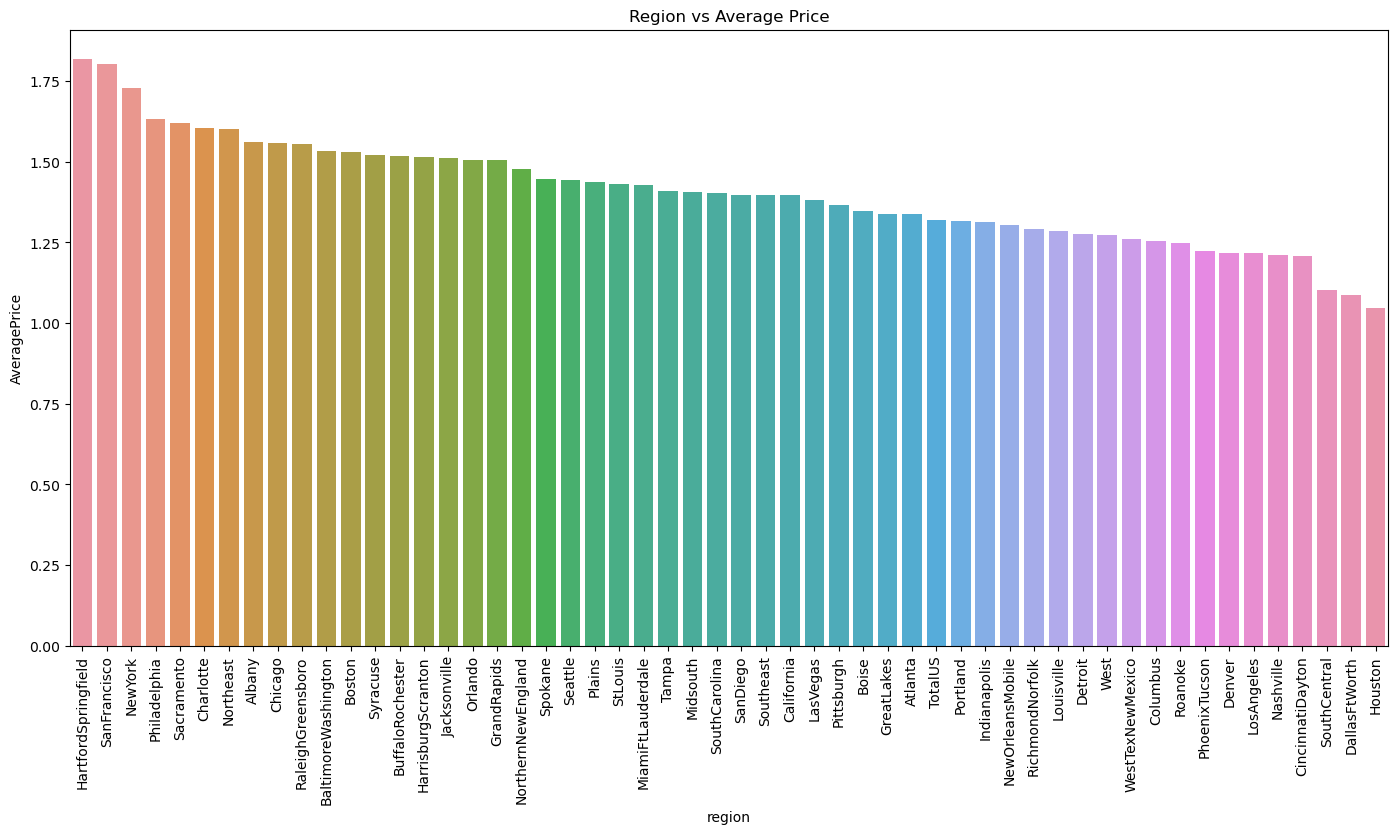

In [229]:
plt.figure(figsize=(17, 8), dpi=100)
sns.barplot(x=df.groupby('region')['AveragePrice'].mean().sort_values(ascending=False).index,
            y=df.groupby('region')['AveragePrice'].mean().sort_values(ascending=False),
            data=df)
plt.xticks(rotation=90)
plt.title('Region vs Average Price')


The plot above reveals that the average price for avocados is highest in regions like Hartford-Springfield and lowest in Houston.

Text(0.5, 1.0, 'month vs AveragePrice')

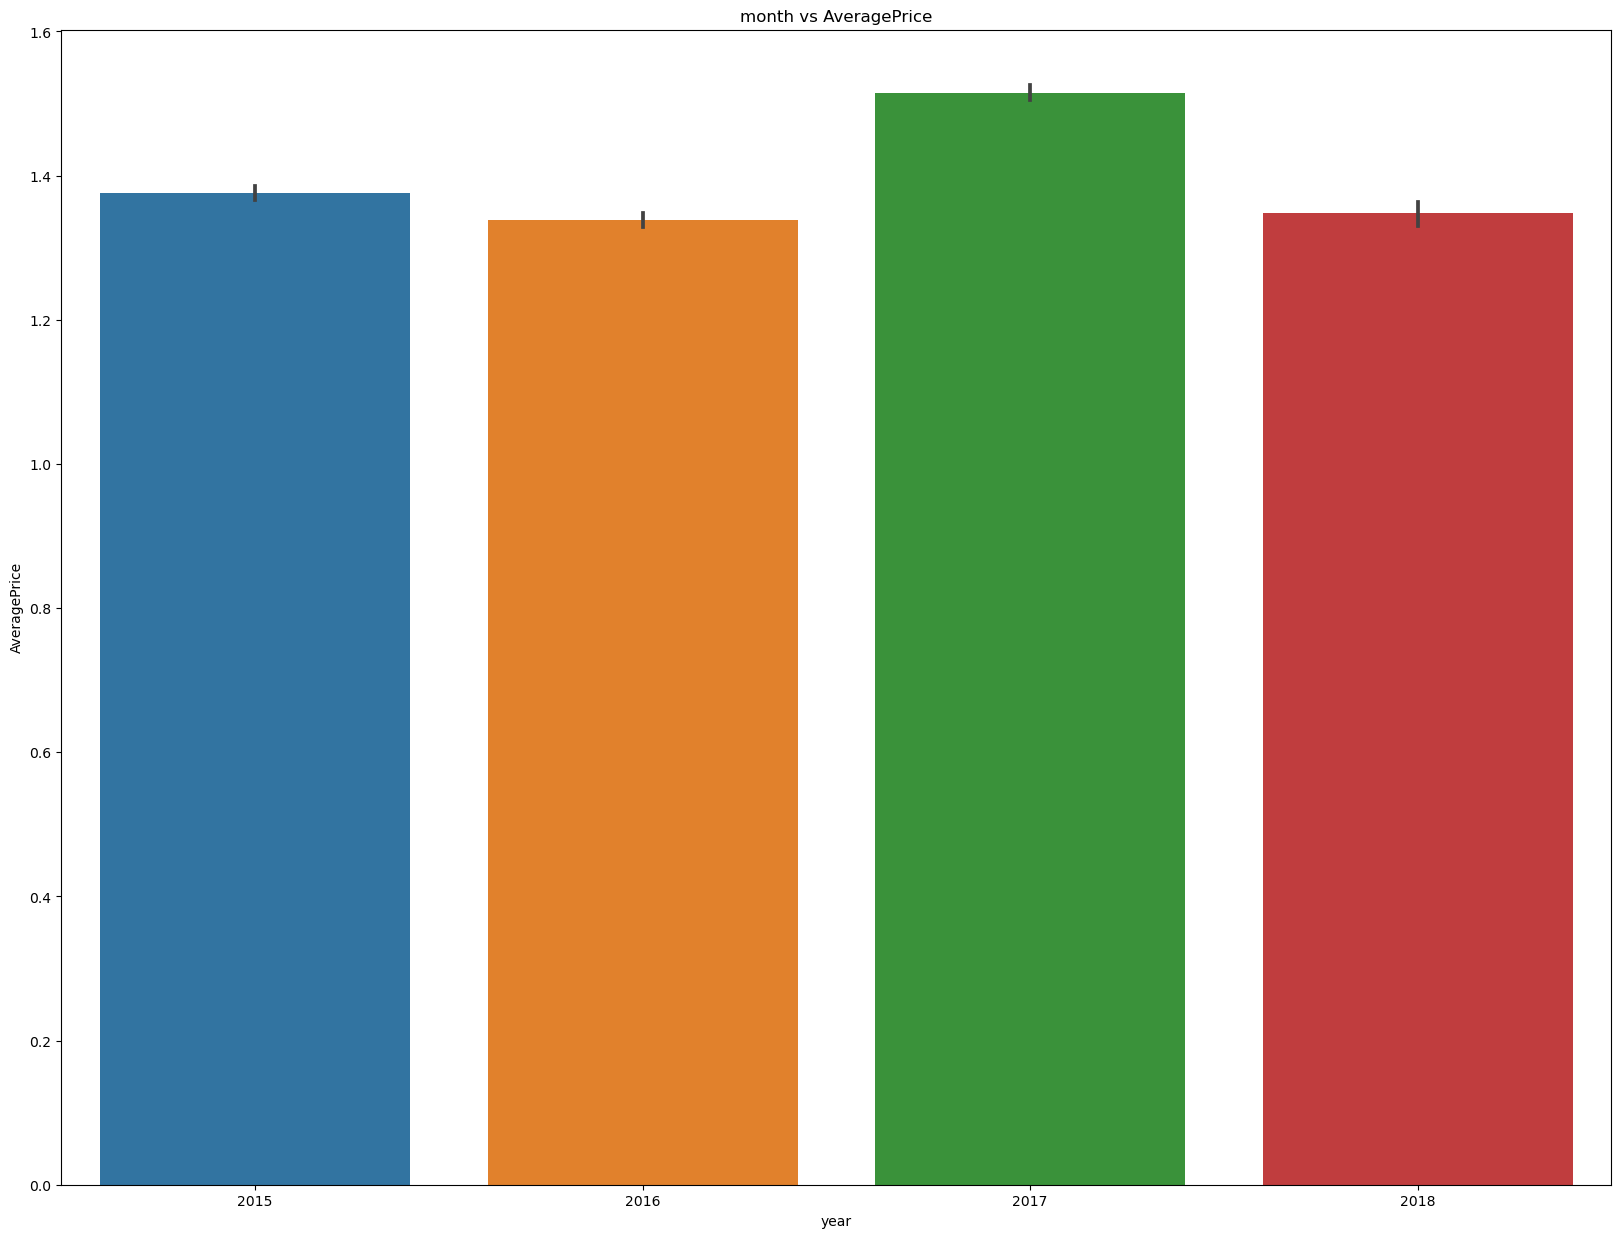

In [230]:
plt.figure(figsize=(20,15))
sns.barplot(x='year',y='AveragePrice',data=df)
plt.title('month vs AveragePrice')

In contrast to other years, the average price of avocados was lowest in 2016. Conversely, in 2017, the average price of avocados surged significantly, surpassing that of other years.

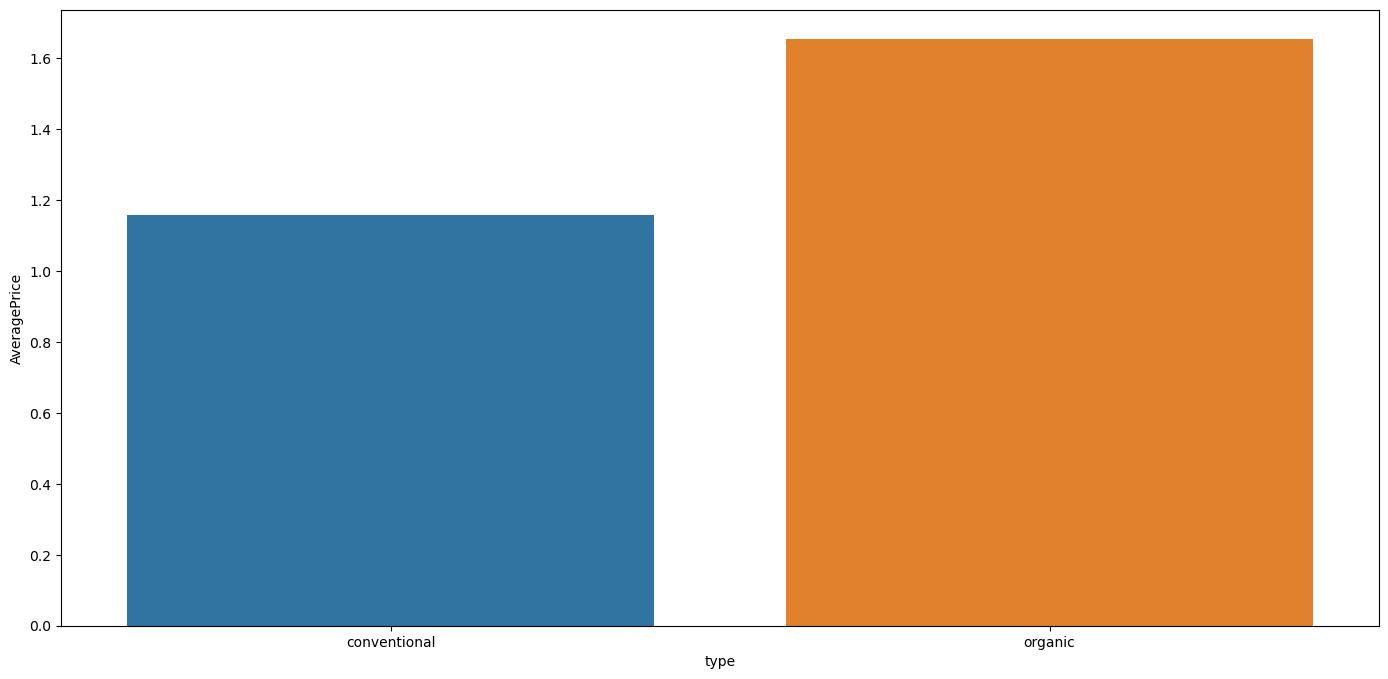

In [231]:
plt.figure(figsize=(17, 8), dpi=100)
sns.barplot(x=df.groupby('type')['AveragePrice'].mean().index,
            y=df.groupby('type')['AveragePrice'].mean(),
            data=df)
plt.show()

Organic avocados typically command a higher average price compared to conventional ones.

<Figure size 2000x1500 with 0 Axes>

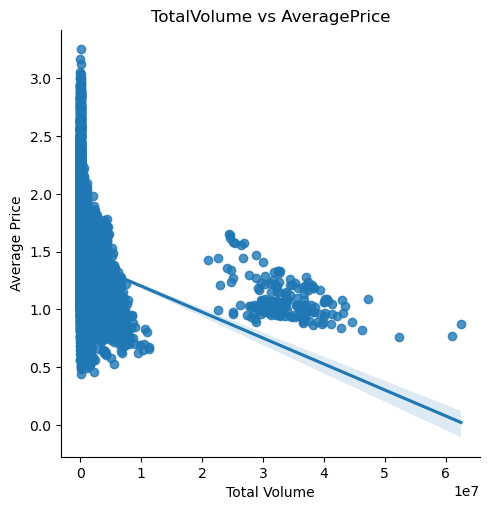

In [232]:
plt.figure(figsize=(20, 15))
sns.lmplot(x='Total Volume', y='AveragePrice', data=df)
plt.title('TotalVolume vs AveragePrice')
plt.xlabel('Total Volume')
plt.ylabel('Average Price')
plt.show()

The average price and total volume exhibit a negative correlation with each other.

<Figure size 2000x1500 with 0 Axes>

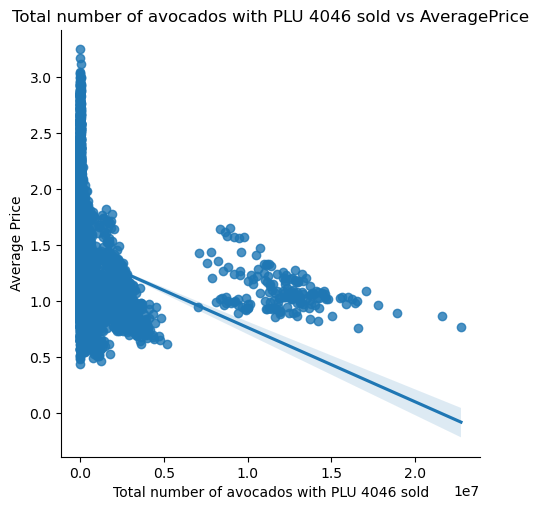

In [233]:
plt.figure(figsize=(20, 15))
sns.lmplot(x='4046', y='AveragePrice', data=df)
plt.title('Total number of avocados with PLU 4046 sold vs AveragePrice')
plt.xlabel('Total number of avocados with PLU 4046 sold')
plt.ylabel('Average Price')
plt.show()


The total number of avocados sold with PLU 4046 and the average price of avocados exhibit a negative correlation with each other.

<Figure size 2000x1500 with 0 Axes>

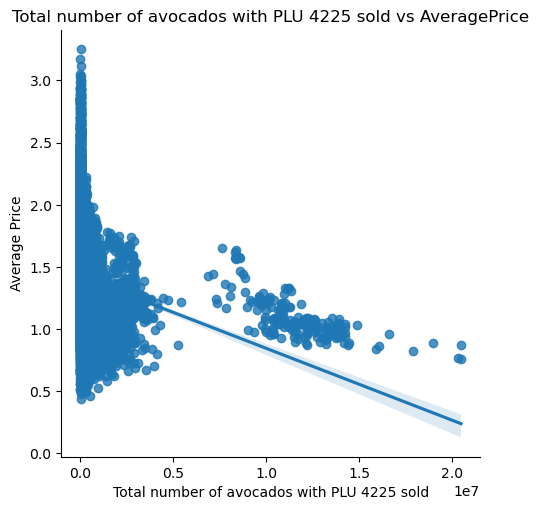

In [234]:
plt.figure(figsize=(20, 15))
sns.lmplot(x='4225', y='AveragePrice', data=df)
plt.title('Total number of avocados with PLU 4225 sold vs AveragePrice')
plt.xlabel('Total number of avocados with PLU 4225 sold')
plt.ylabel('Average Price')
plt.show()

There is a negative correlation between the total number of avocados sold with PLU 4225 and the average price.

<Figure size 2000x1500 with 0 Axes>

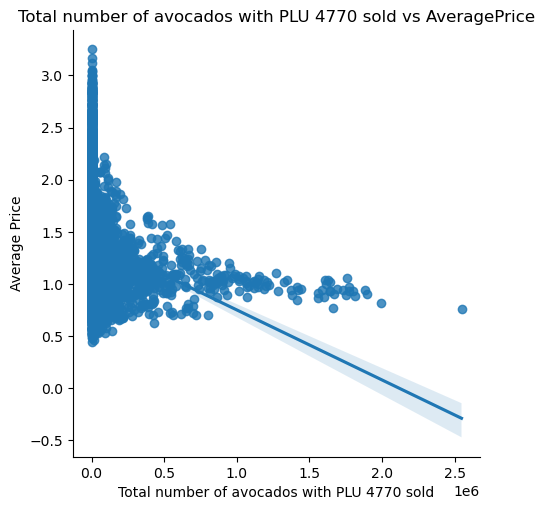

In [235]:
plt.figure(figsize=(20, 15))
sns.lmplot(x='4770', y='AveragePrice', data=df)
plt.title('Total number of avocados with PLU 4770 sold vs AveragePrice')
plt.xlabel('Total number of avocados with PLU 4770 sold')
plt.ylabel('Average Price')
plt.show()


There is a negative correlation between the total number of avocados sold with PLU 4770 and the average price.

<Figure size 2000x1500 with 0 Axes>

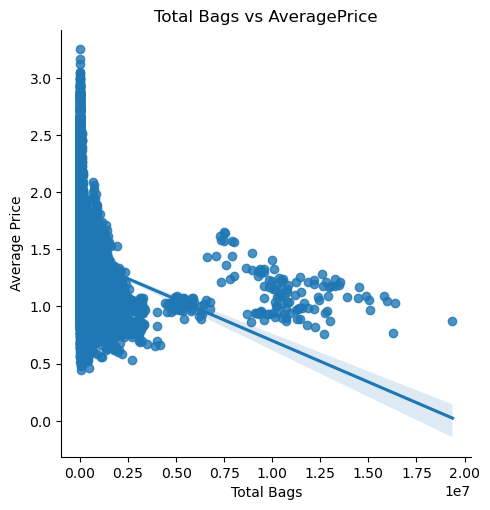

In [236]:
plt.figure(figsize=(20, 15))
sns.lmplot(x='Total Bags', y='AveragePrice', data=df)
plt.title('Total Bags vs AveragePrice')
plt.xlabel('Total Bags')
plt.ylabel('Average Price')
plt.show()


Total Bags & AveragePrice has Negetive correlationship with each other.

<Figure size 2000x1500 with 0 Axes>

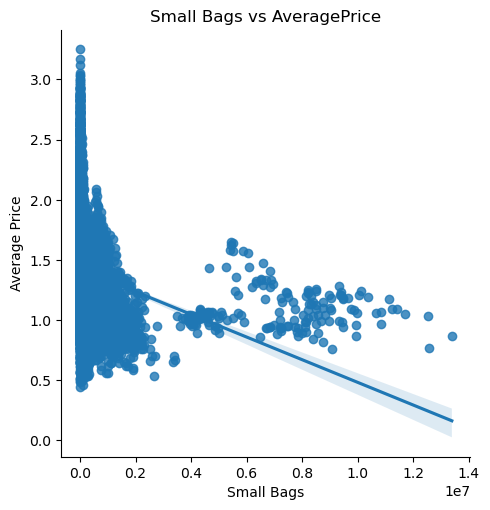

In [237]:
plt.figure(figsize=(20, 15))
sns.lmplot(x='Small Bags', y='AveragePrice', data=df)
plt.title('Small Bags vs AveragePrice')
plt.xlabel('Small Bags')
plt.ylabel('Average Price')
plt.show()

Small Bags & AveragePrice has negetive correlationship with each other.

<Figure size 2000x1500 with 0 Axes>

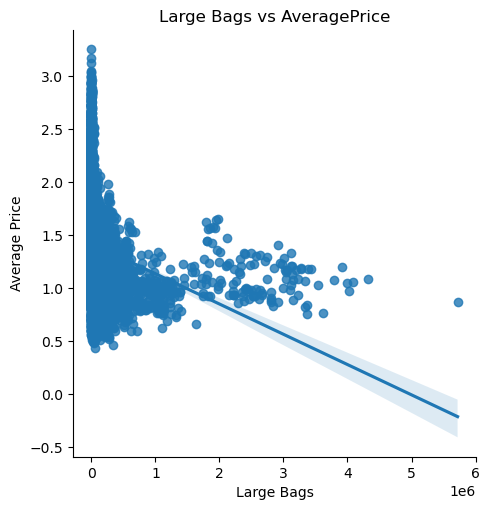

In [238]:
plt.figure(figsize=(20, 15))
sns.lmplot(x='Large Bags', y='AveragePrice', data=df)
plt.title('Large Bags vs AveragePrice')
plt.xlabel('Large Bags')
plt.ylabel('Average Price')
plt.show()


There is a negative correlation between the number of avocados sold in large bags and the average price.

<Figure size 2000x1500 with 0 Axes>

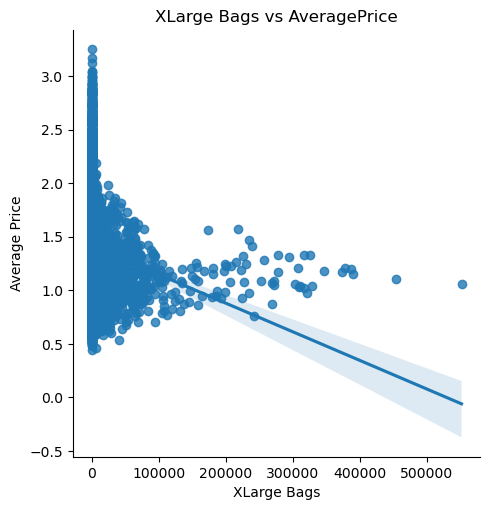

In [239]:
plt.figure(figsize=(20, 15))
sns.lmplot(x='XLarge Bags', y='AveragePrice', data=df)
plt.title('XLarge Bags vs AveragePrice')
plt.xlabel('XLarge Bags')
plt.ylabel('Average Price')
plt.show()


There is a negative correlation between the number of avocados sold in extra-large bags and the average price.

<Figure size 2000x1500 with 0 Axes>

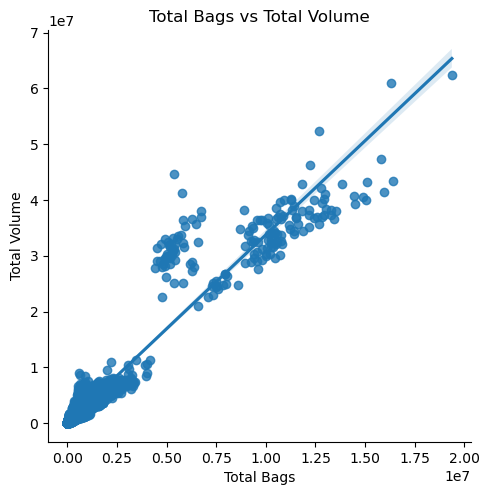

In [240]:
plt.figure(figsize=(20, 15))
sns.lmplot(x='Total Bags', y='Total Volume', data=df)
plt.title('Total Bags vs Total Volume')
plt.xlabel('Total Bags')
plt.ylabel('Total Volume')
plt.show()


There is a positive correlation between the total number of bags sold and the average price.








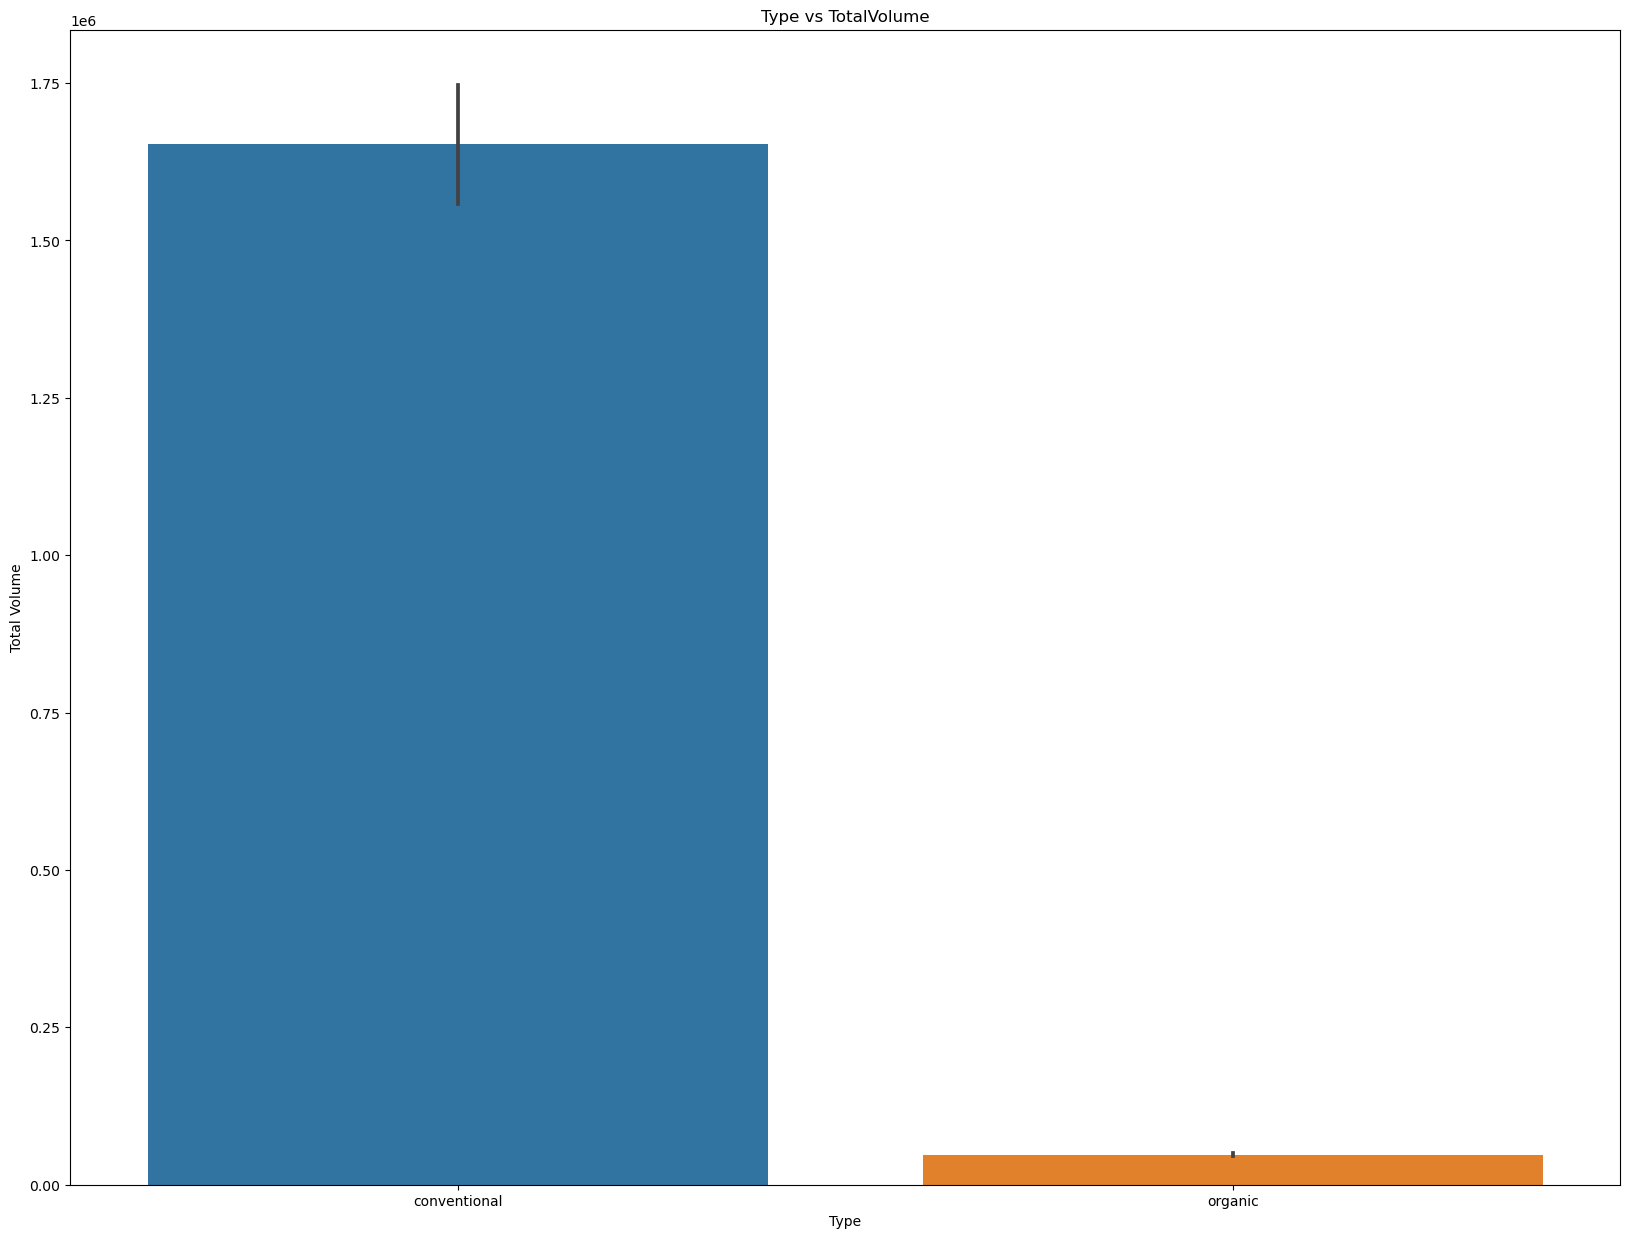

In [241]:
plt.figure(figsize=(20, 15))
sns.barplot(x='type', y='Total Volume', data=df)
plt.title('Type vs TotalVolume')
plt.xlabel('Type')
plt.ylabel('Total Volume')
plt.show()


Conventional type of avocados sold higher than organic type.

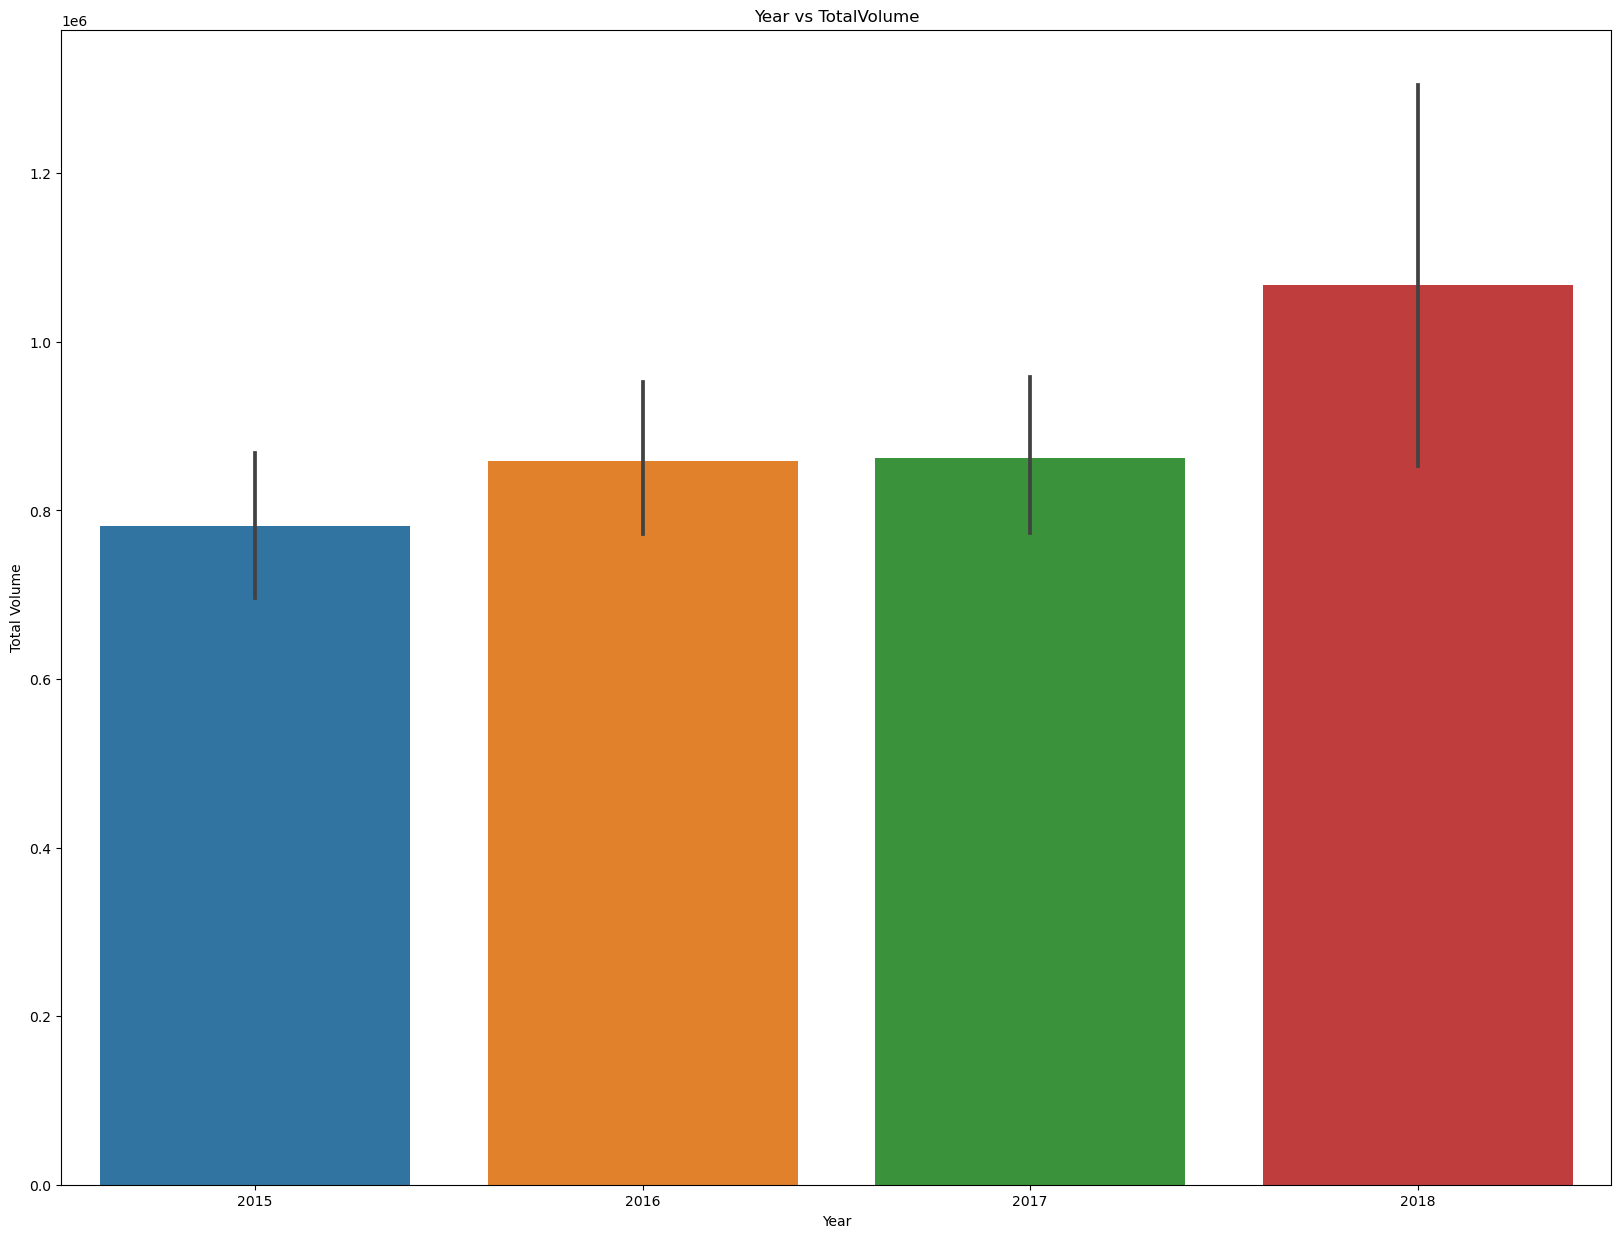

In [242]:
plt.figure(figsize=(20, 15))
sns.barplot(x='year', y='Total Volume', data=df)
plt.title('Year vs TotalVolume')
plt.xlabel('Year')
plt.ylabel('Total Volume')
plt.show()


The highest volume of avocados was sold in the year 2018.

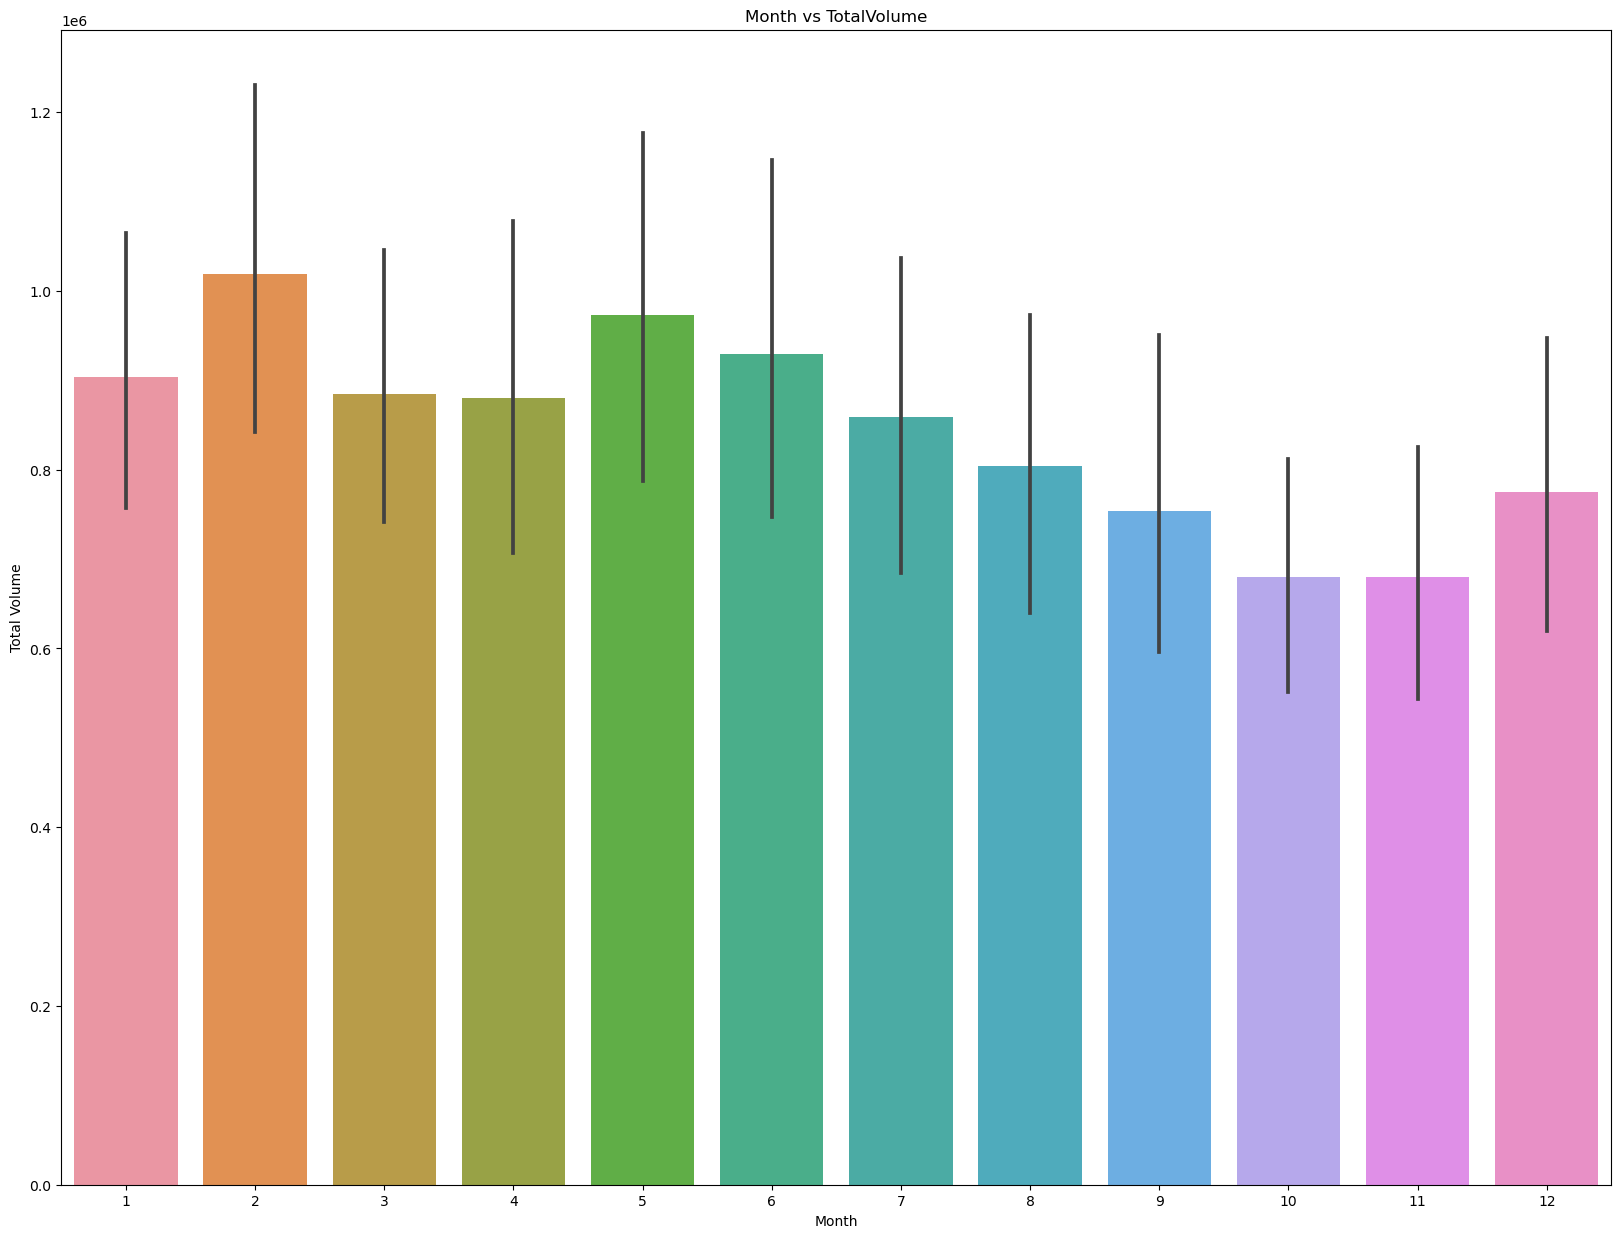

In [243]:
plt.figure(figsize=(20, 15))
sns.barplot(x='Month', y='Total Volume', data=df)
plt.title('Month vs TotalVolume')
plt.xlabel('Month')
plt.ylabel('Total Volume')
plt.show()


The highest volume of avocados was sold in February, while the lowest volume was sold in November.

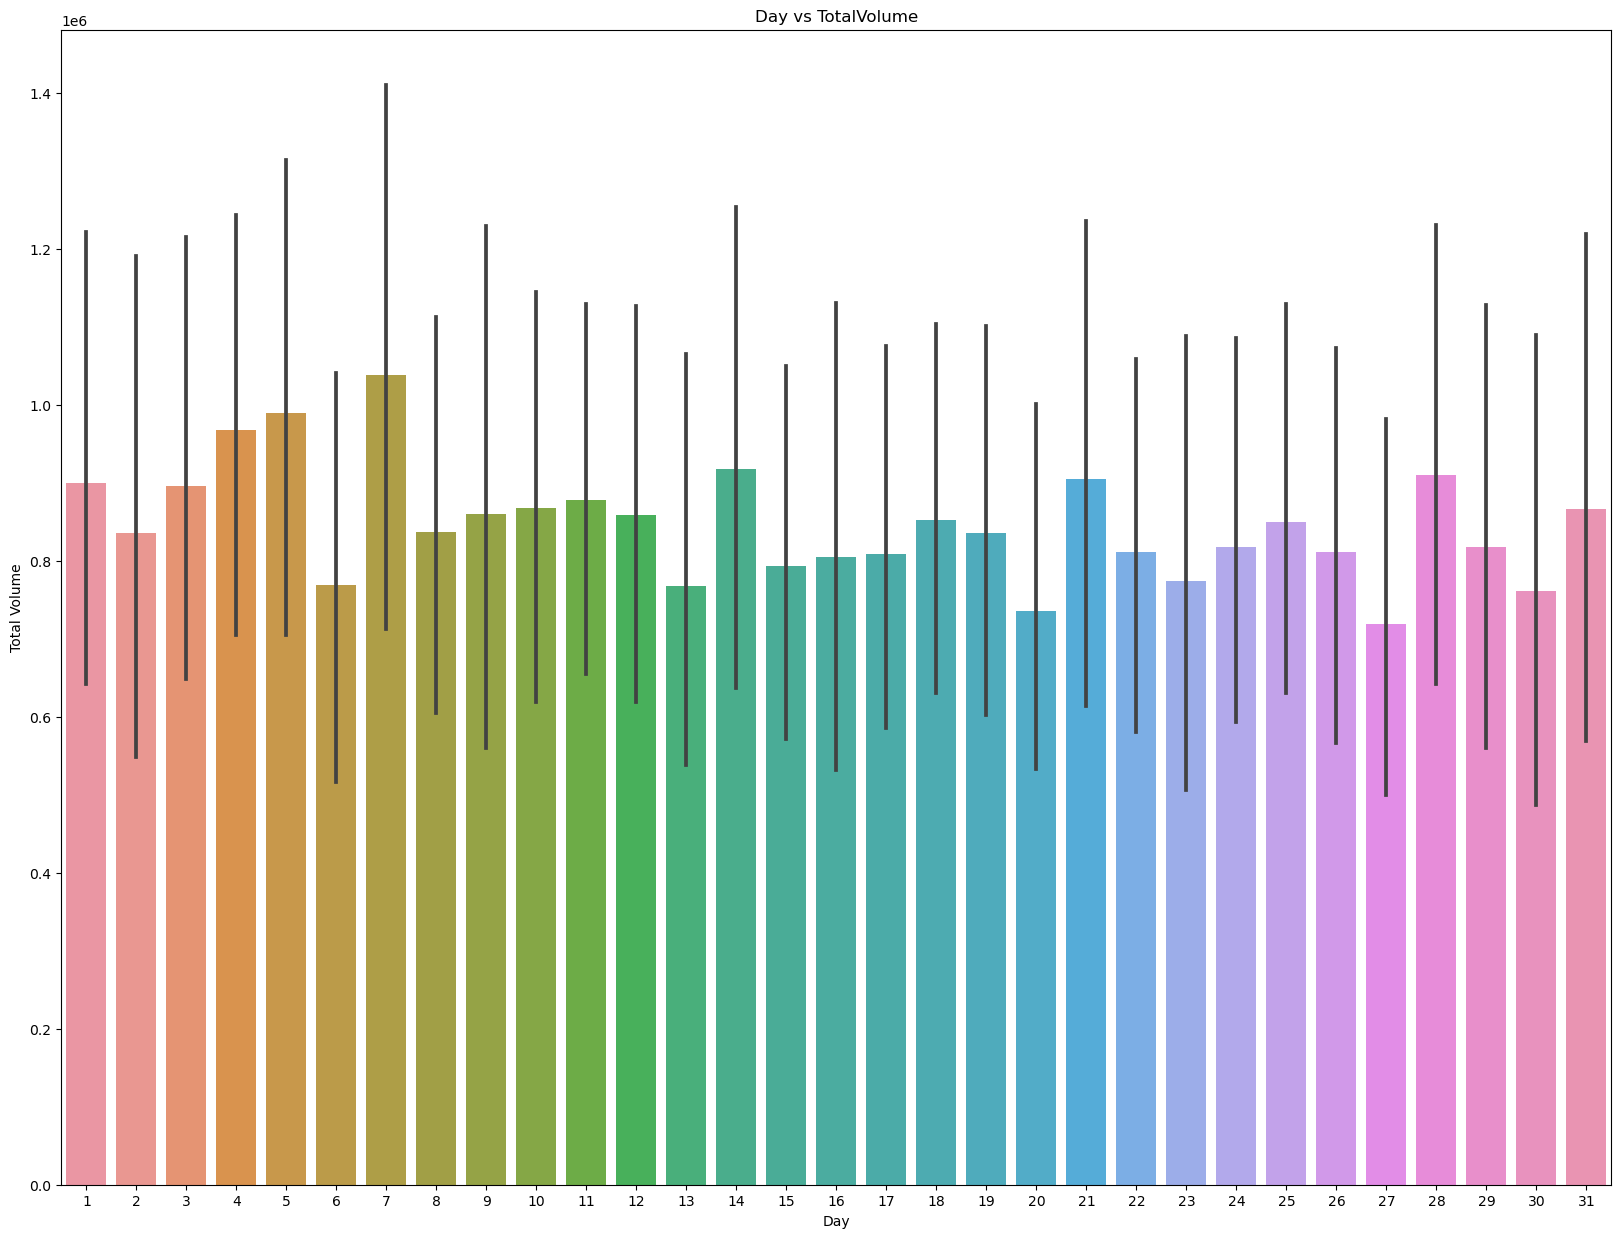

In [244]:
plt.figure(figsize=(20, 15))
sns.barplot(x='Day', y='Total Volume', data=df)
plt.title('Day vs TotalVolume')
plt.xlabel('Day')
plt.ylabel('Total Volume')
plt.show()


The highest volume of avocados was sold on the 7th day of the month.

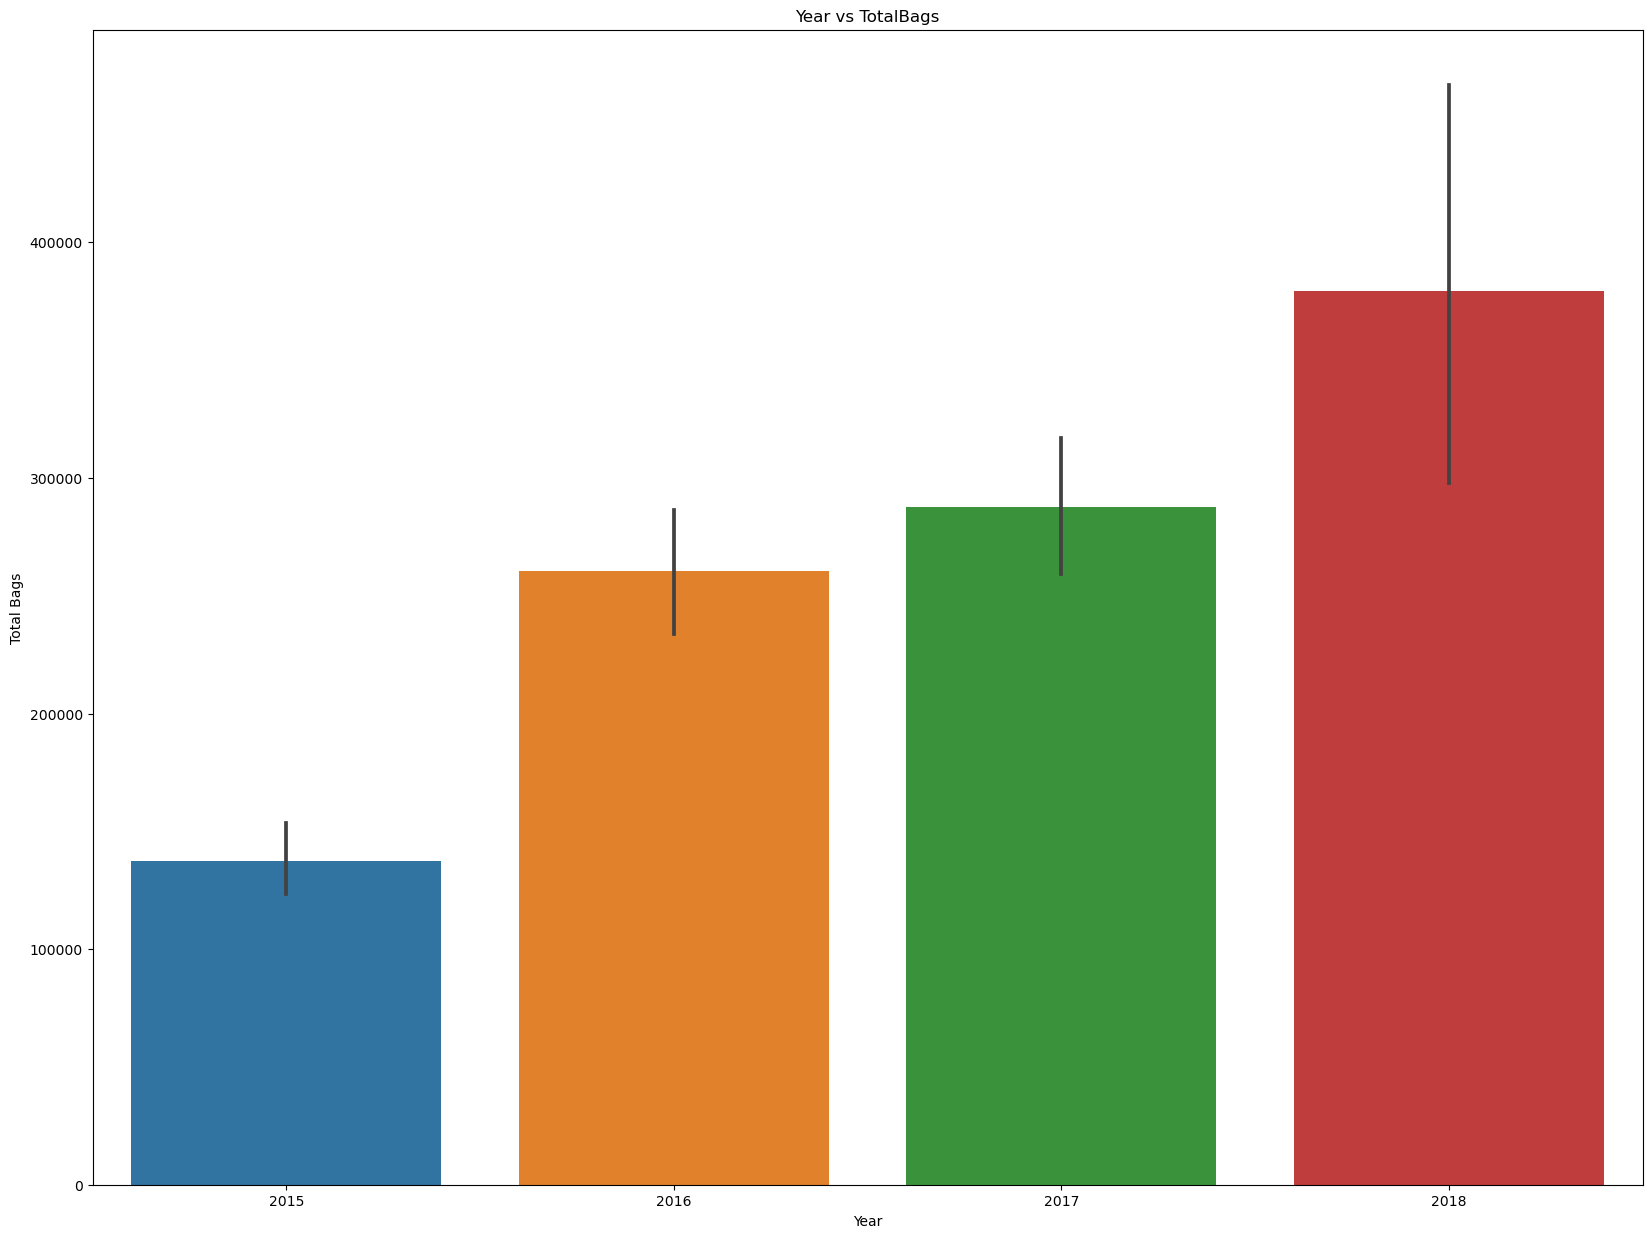

In [245]:
plt.figure(figsize=(20, 15))
sns.barplot(x='year', y='Total Bags', data=df)
plt.title('Year vs TotalBags')
plt.xlabel('Year')
plt.ylabel('Total Bags')
plt.show()


The correlation is evident: with the highest avocado sales in 2018, the highest number of bags were also used, while in 2015, with minimal avocado sales, the least number of bags were used.

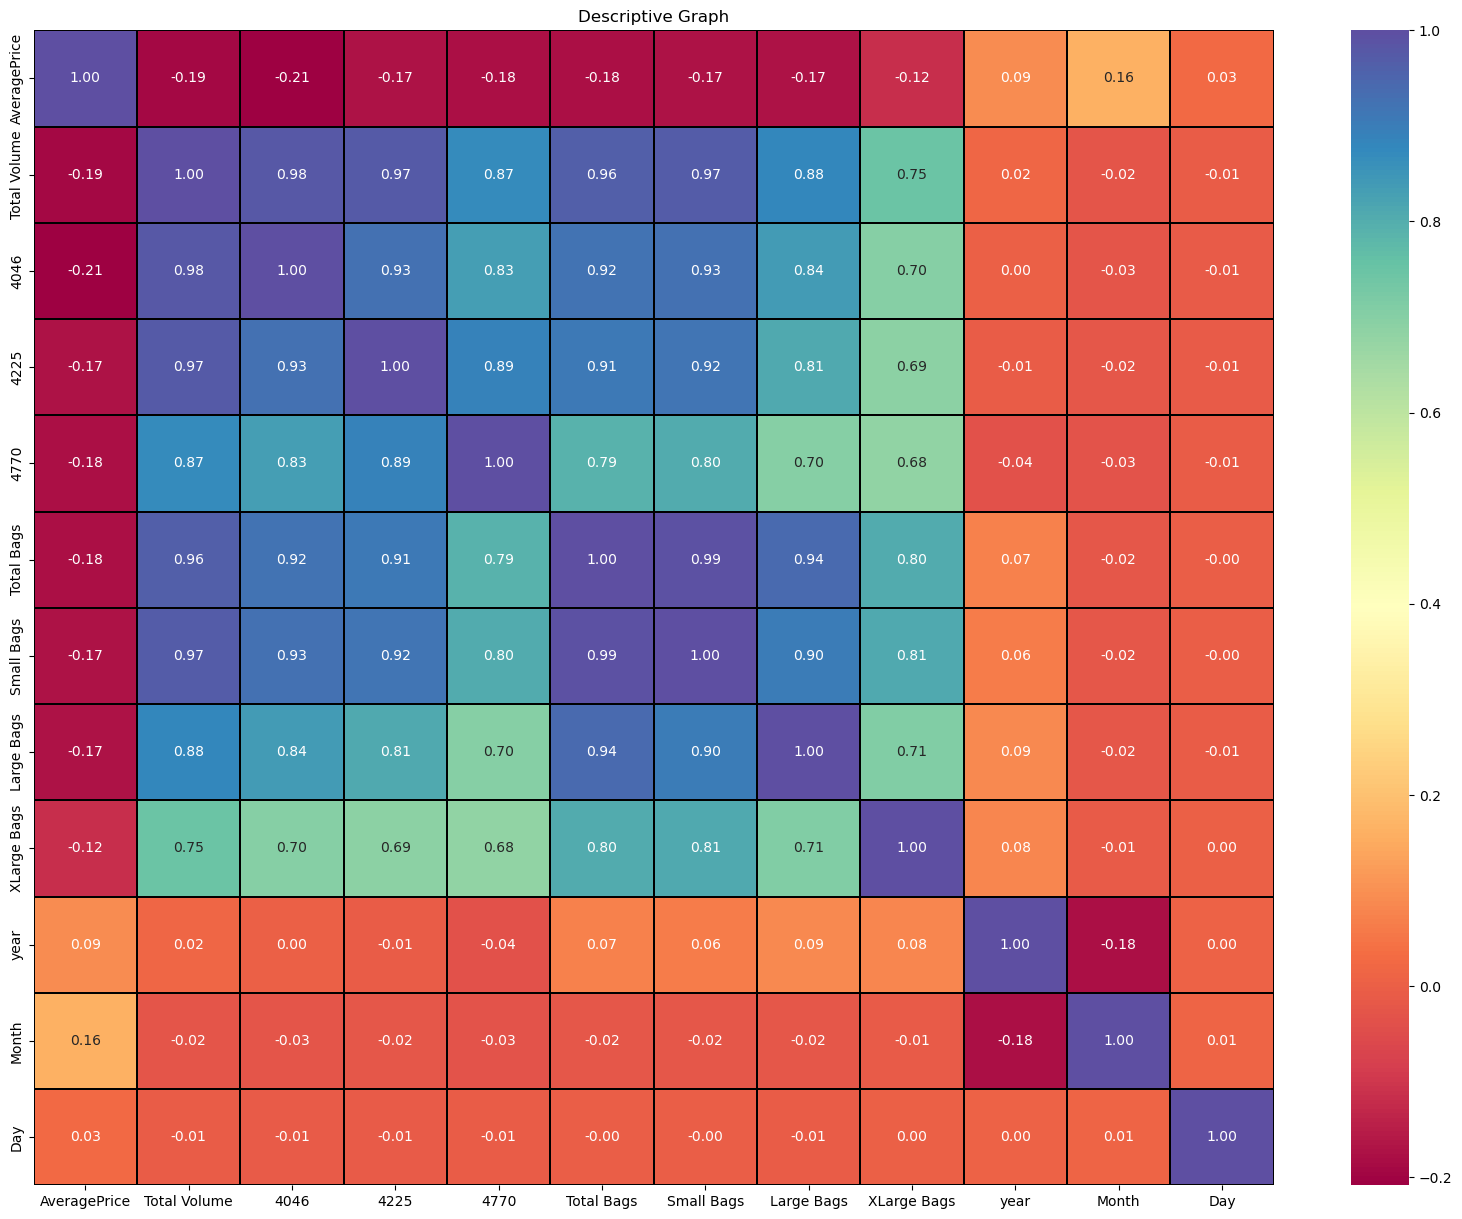

In [246]:
# Exclude non-numeric columns from the DataFrame
numeric_df = df.select_dtypes(include=['float64', 'int64'])

# Plot the heatmap
plt.figure(figsize=(20, 15))
sns.heatmap(numeric_df.corr(), annot=True, fmt='0.2f', linewidth=0.2, linecolor='Black', cmap='Spectral')
plt.title('Descriptive Graph')
plt.show()


Observations-
1. There is a strong positive correlation of 98% between the total volume of avocados and the PLU 4046.
2. The total volume of avocados shows a high positive correlation of 97% with the PLU 4225.
3. A notable positive correlation of 87% exists between the total volume of avocados and the PLU 4770.
4. There is a substantial positive correlation of 96% between the total volume of avocados and the total number of bags used.
5. The total volume of avocados exhibits a strong positive correlation of 97% with the number of small bags used.
6. A significant positive correlation of 88% is observed between the total volume of avocados and the number of large bags used.
7. The PLU 4046 and PLU 4225 demonstrate a strong positive correlation of 93%.
8. There is a substantial positive correlation of 93% between the number of small bags used and the PLU 4046.
9. The number of small bags used shows a strong positive correlation of 92% with the PLU 4225.
10. A noteworthy positive correlation of 80% exists between the number of small bags used and the PLU 4770.
11. The number of small bags used exhibits an exceptionally strong positive correlation of 99% with the total number of bags used.
12. There is a substantial positive correlation of 94% between the total number of bags used and the number of large bags used.

These observations highlight the strong positive relationships between different features in the dataset, providing valuable insights into the avocado sales and bag usage patterns.

# 3.Multivariate analysis-

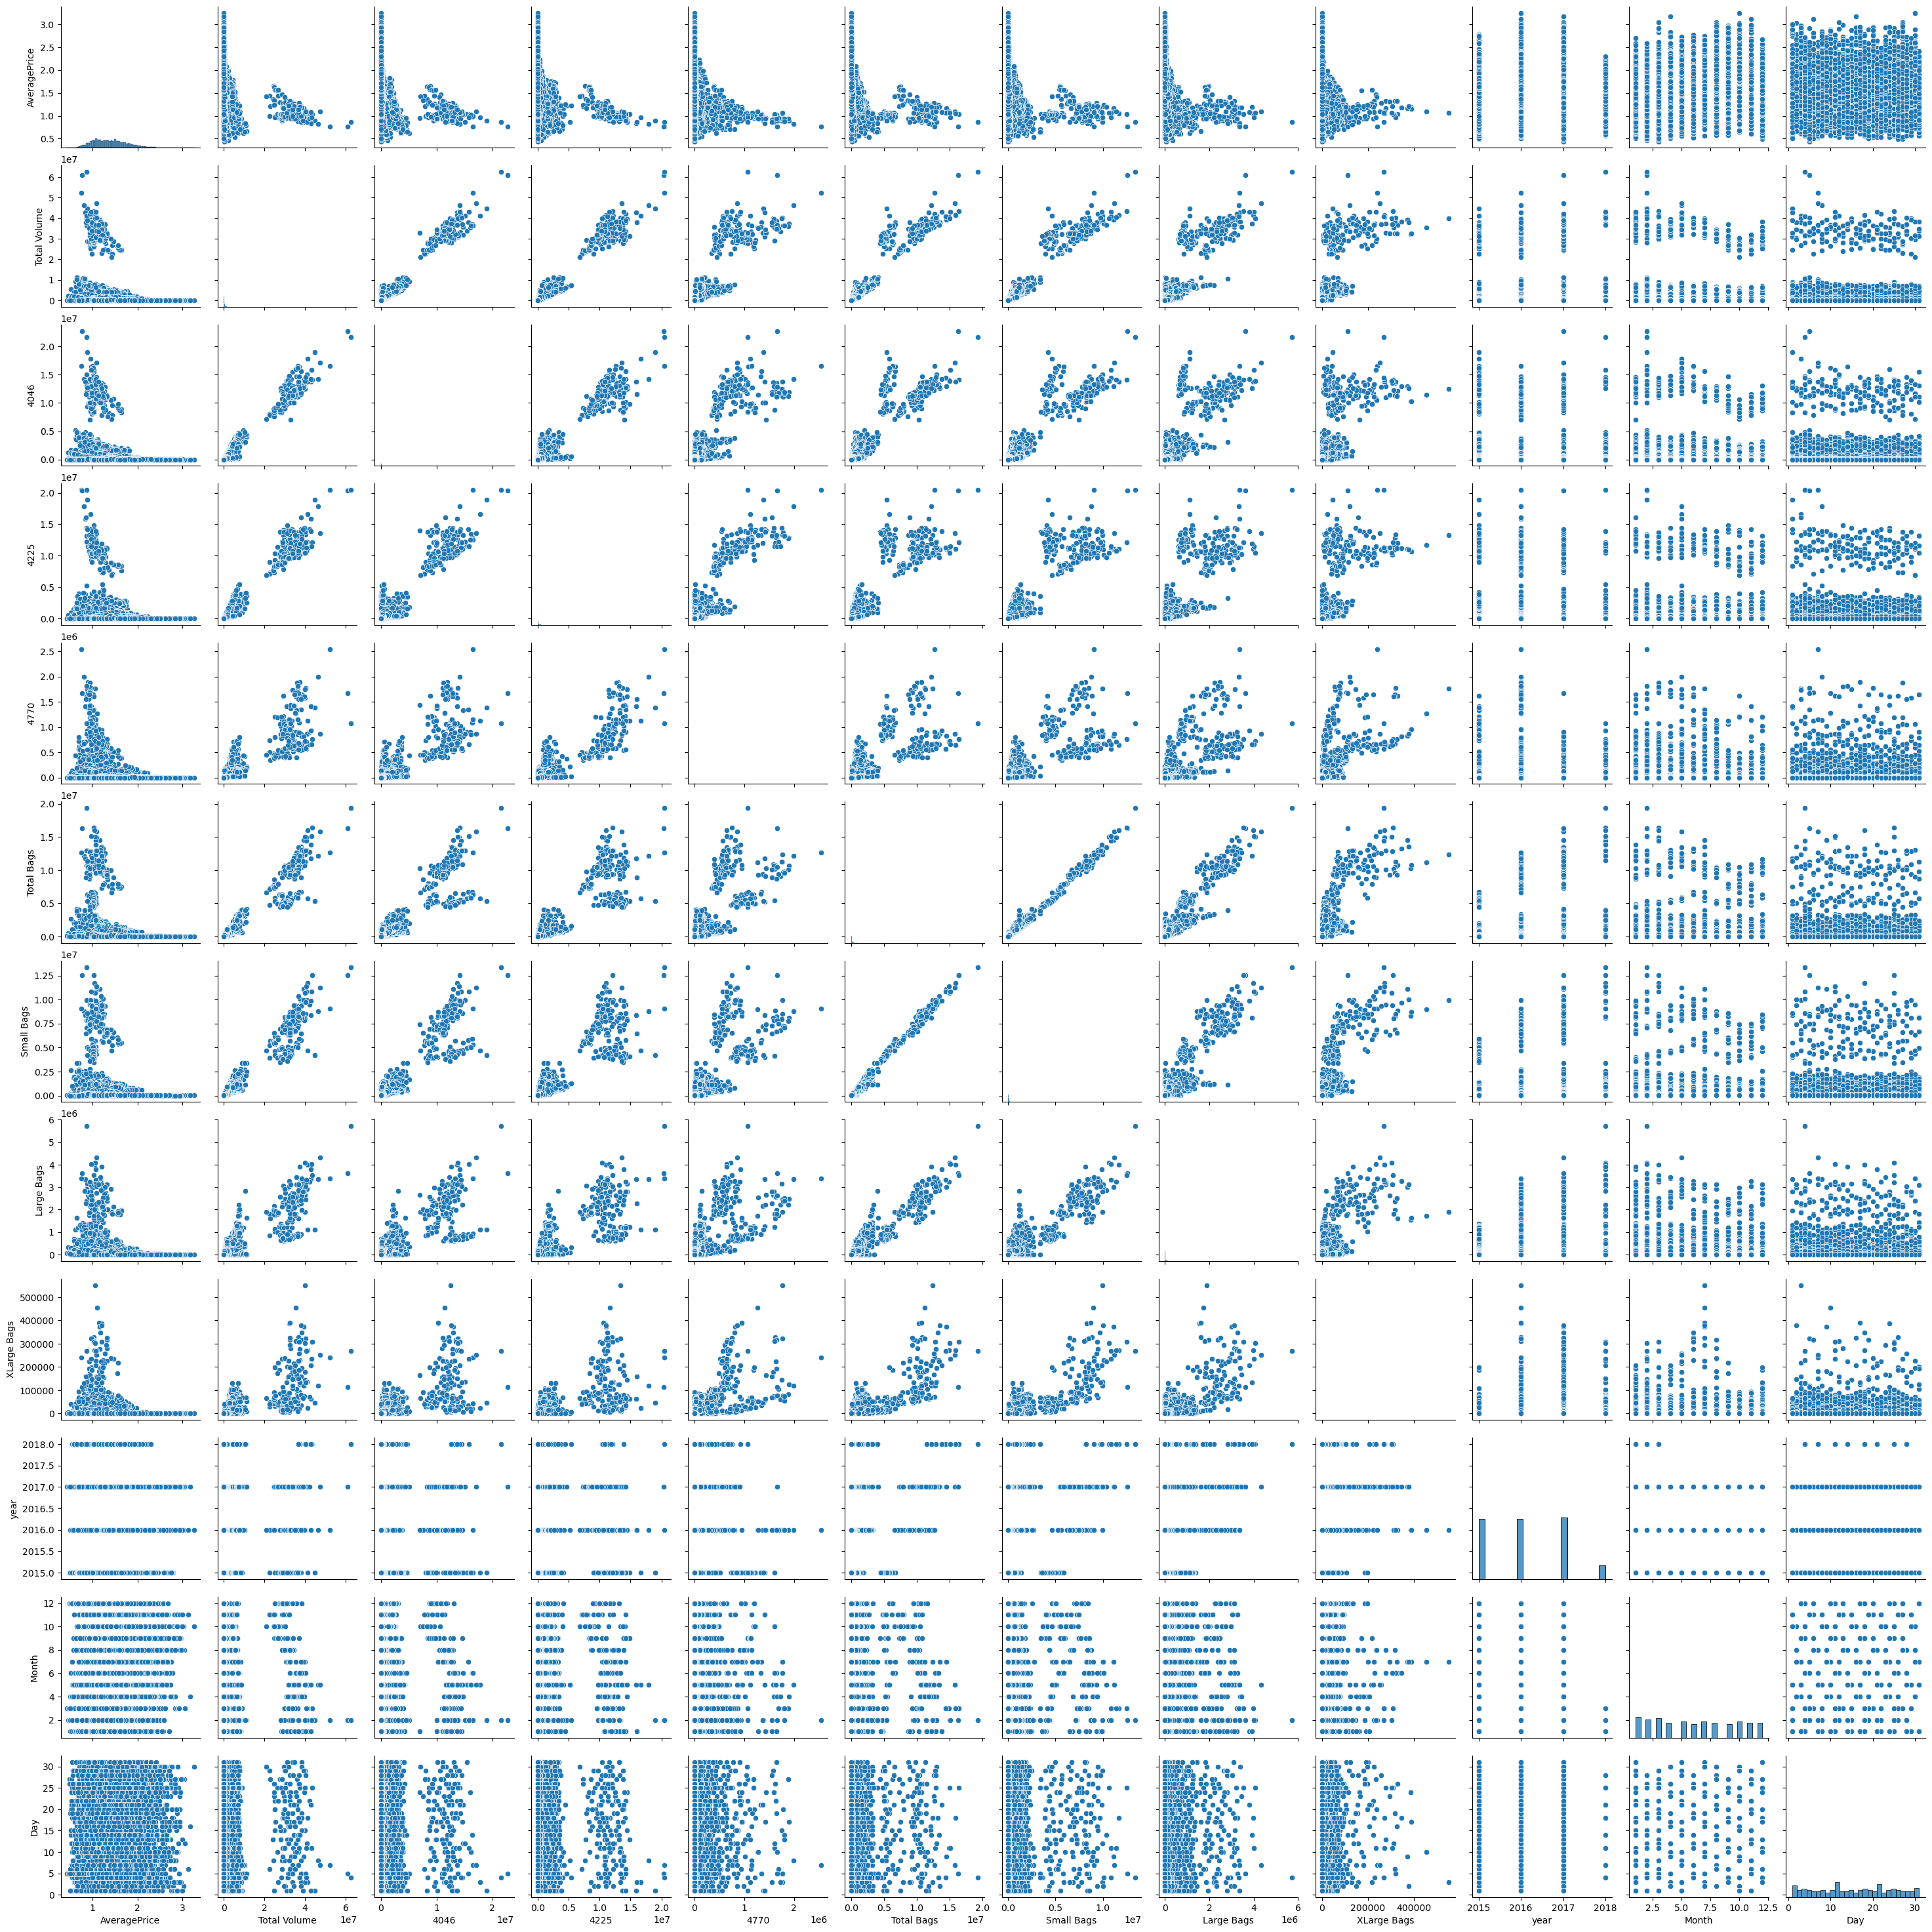

In [247]:
sns.pairplot(df)

observations:

- There is a positive correlation between Total volume and PLU 4046.
- Total volume and PLU 4225 show a positive correlation.
- Total volume and PLU 4770 exhibit a positive correlation.
- There is a positive correlation between Total volume and Total bags.
- Total volume and Small bags have a positive correlation.
- Total volume and Large bags demonstrate a positive correlation.
- PLU 4046 and PLU 4225 show a positive correlation.
- Small bags and PLU 4046 exhibit a positive correlation.
- Small bags and PLU 4225 demonstrate a positive correlation.
- Small bags and PLU 4770 show a positive correlation.
- There is a positive correlation between Small bags and Total bags.
- Total bags and Large bags exhibit a positive correlation.


In [31]:
df

Date  AveragePrice  Total Volume     4046       4225    4770  \
0     2015-12-27          1.33      64236.62  1036.74   54454.85   48.16   
1     2015-12-20          1.35      54876.98   674.28   44638.81   58.33   
2     2015-12-13          0.93     118220.22   794.70  109149.67  130.50   
3     2015-12-06          1.08      78992.15  1132.00   71976.41   72.58   
4     2015-11-29          1.28      51039.60   941.48   43838.39   75.78   
...          ...           ...           ...      ...        ...     ...   
18244 2018-02-04          1.63      17074.83  2046.96    1529.20    0.00   
18245 2018-01-28          1.71      13888.04  1191.70    3431.50    0.00   
18246 2018-01-21          1.87      13766.76  1191.92    2452.79  727.94   
18247 2018-01-14          1.93      16205.22  1527.63    2981.04  727.01   
18248 2018-01-07          1.62      17489.58  2894.77    2356.13  224.53   

       Total Bags  Small Bags  Large Bags  XLarge Bags          type  year  \
0         8696.87     8603.62       93.25          0.0  conventional  2015   
1         9505.56     9408.07       97.49          0.0  conventional  2015   
2         8145.35     8042.21      103.14          0.0  conventional  2015   
3         5811.16     5677.40      133.76          0.0  conventional  2015   
4         6183.95     5986.26      197.69          0.0  conventional  2015   
...           ...         ...         ...          ...           ...   ...   
18244    13498.67    13066.82      431.85          0.0       organic  2018   
18245     9264.84     8940.04      324.80          0.0       organic  2018   
18246     9394.11     9351.80       42.31          0.0       organic  2018   
18247    10969.54    10919.54       50.00          0.0       organic  2018   
18248    12014.15    11988.14       26.01          0.0       organic  2018   

                 region  Month  Day  
0                Albany     12   27  
1                Albany     12   20  
2                Albany     12   13  
3                Albany     12    6  
4                Albany     11   29  
...                 ...    ...  ...  
18244  WestTexNewMexico      2    4  
18245  WestTexNewMexico      1   28  
18246  WestTexNewMexico      1   21  
18247  WestTexNewMexico      1   14  
18248  WestTexNewMexico      1    7  

[18249 rows x 15 columns]

In [32]:
x=df.drop(columns=['type','region'],axis=1)

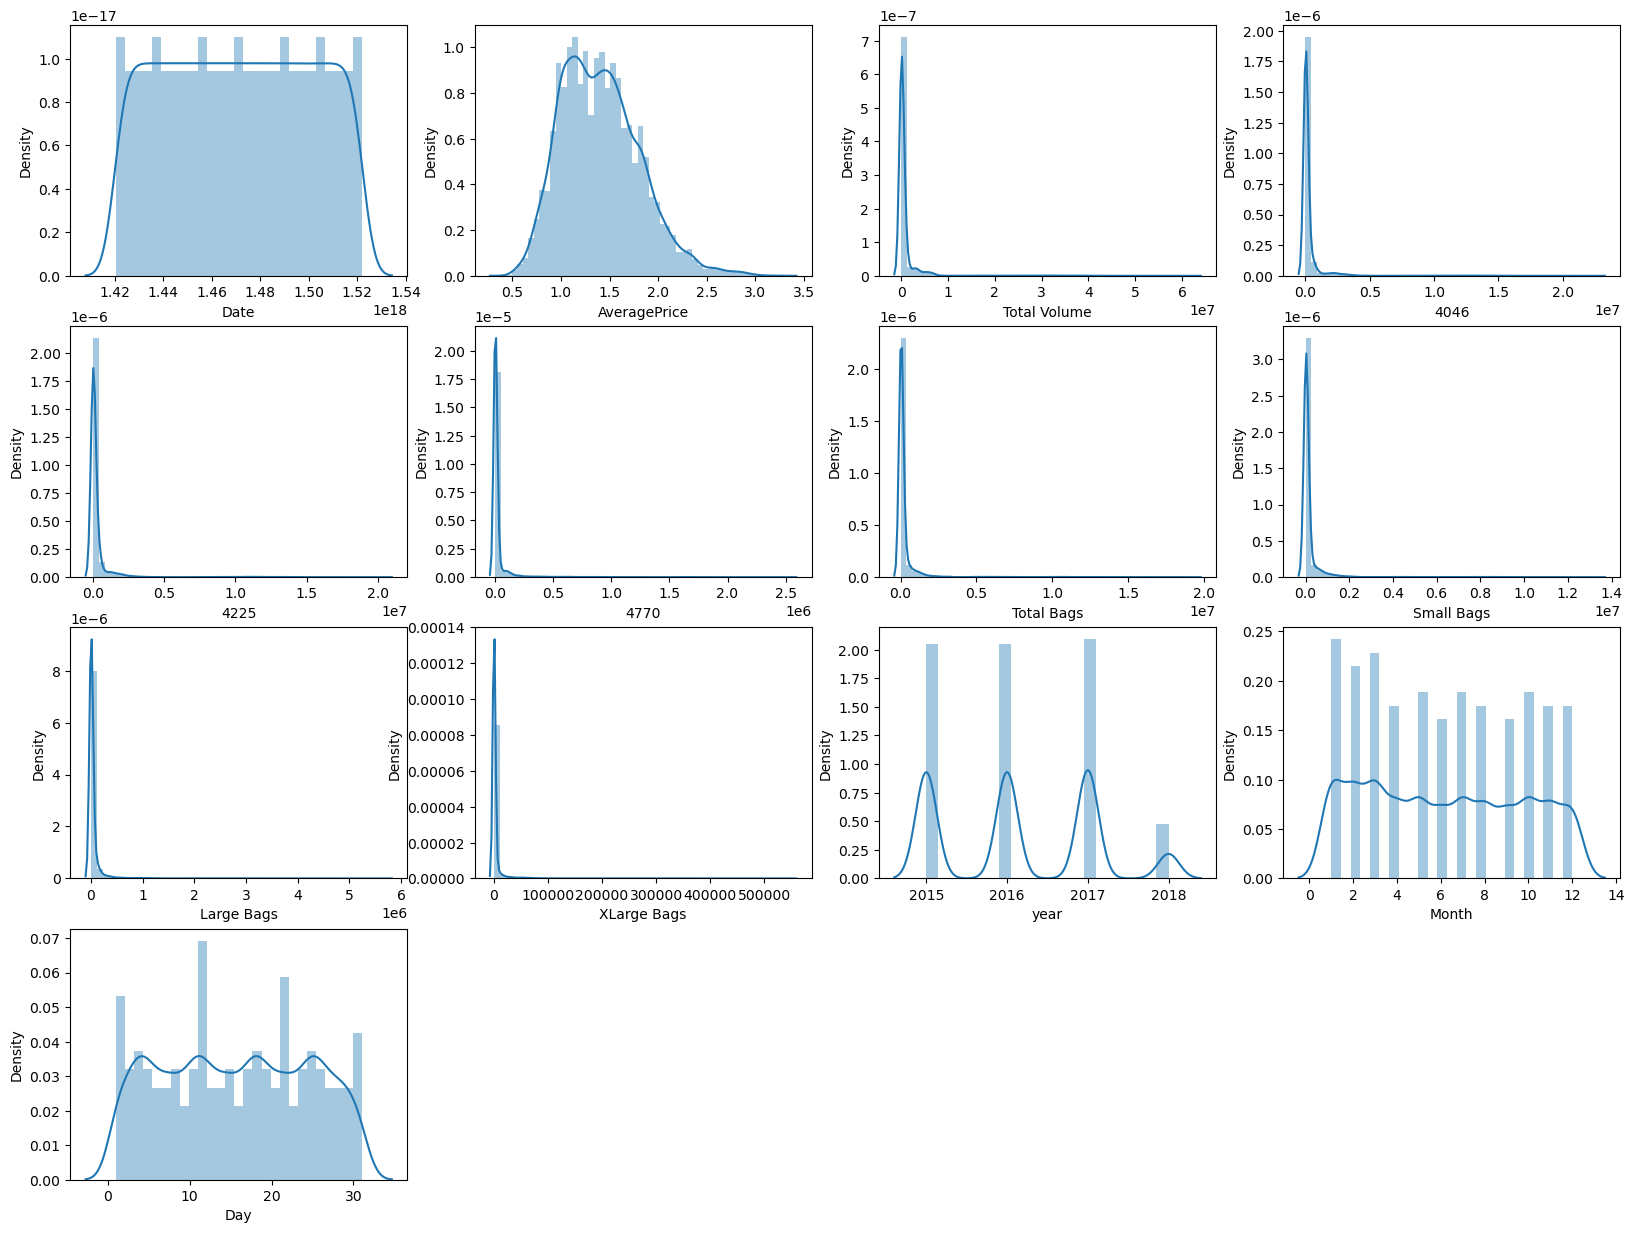

In [250]:
plt.figure(figsize=(20,15))
plotnumber=1


for column in x.columns:
    if plotnumber<=15:
        ax=plt.subplot(4,4,plotnumber)
        sns.distplot(df[column])
        plt.xlabel(column)
    plotnumber+=1   
plt.show()   

It appears that there is skewness present in columns such as Total Volume, 4046, 4225, 4770, Small Bags, Large Bags, and XLarge Bags. These skewed distributions may need to be addressed to improve the performance of our analysis.

In [33]:
# Exclude datetime columns from the DataFrame
numeric_df = df.select_dtypes(include=['float64', 'int64'])

# Calculate the skewness
skewness = numeric_df.skew()

# Print the skewness of each column
print(skewness)


AveragePrice     0.580303
Total Volume     9.007687
4046             8.648220
4225             8.942466
4770            10.159396
Total Bags       9.756072
Small Bags       9.540660
Large Bags       9.796455
XLarge Bags     13.139751
year             0.215339
Month            0.106617
Day              0.014310
dtype: float64


Upon cross-checking, it has been confirmed that skewness exists in columns such as Total Volume, 4046, 4225, 4770, Small Bags, Large Bags, and XLarge Bags.

# Using the Power Transformer method, we aim to eliminate skewness from the dataset.

In [34]:
from sklearn.preprocessing import PowerTransformer

In [35]:
features=['Total Volume','4046','4225','4770','Total Bags','Small Bags','Large Bags','XLarge Bags']

In [36]:
x=PowerTransformer(method='yeo-johnson') 
df[features]=x.fit_transform(df[features].values)

In [37]:
df

Date  AveragePrice  Total Volume      4046      4225      4770  \
0     2015-12-27          1.33     -0.086605 -0.658619  0.307313 -0.247250   
1     2015-12-20          1.35     -0.155746 -0.776870  0.231647 -0.201041   
2     2015-12-13          0.93      0.179327 -0.731947  0.579503 -0.007072   
3     2015-12-06          1.08      0.003876 -0.634200  0.415100 -0.148322   
4     2015-11-29          1.28     -0.187640 -0.685293  0.224806 -0.137918   
...          ...           ...           ...       ...       ...       ...   
18244 2018-02-04          1.63     -0.674587 -0.467366 -0.919470 -1.238310   
18245 2018-01-28          1.71     -0.767550 -0.619883 -0.665372 -1.238310   
18246 2018-01-21          1.87     -0.771505 -0.619831 -0.772496  0.401546   
18247 2018-01-14          1.93     -0.698077 -0.550282 -0.710543  0.401246   
18248 2018-01-07          1.62     -0.663809 -0.367908 -0.785173  0.122919   

       Total Bags  Small Bags  Large Bags  XLarge Bags          type  year  \
0       -0.524004   -0.340627   -0.773351    -0.699849  conventional  2015   
1       -0.485890   -0.306425   -0.763435    -0.699849  conventional  2015   
2       -0.552018   -0.366303   -0.750820    -0.699849  conventional  2015   
3       -0.695449   -0.496853   -0.691865    -0.699849  conventional  2015   
4       -0.669157   -0.477201   -0.600975    -0.699849  conventional  2015   
...           ...         ...         ...          ...           ...   ...   
18244   -0.334466   -0.178839   -0.410859    -0.699849       organic  2018   
18245   -0.496897   -0.325977   -0.481465    -0.699849       organic  2018   
18246   -0.490952   -0.308728   -0.943486    -0.699849       organic  2018   
18247   -0.424252   -0.248932   -0.908510    -0.699849       organic  2018   
18248   -0.384961   -0.212590   -1.042250    -0.699849       organic  2018   

                 region  Month  Day  
0                Albany     12   27  
1                Albany     12   20  
2                Albany     12   13  
3                Albany     12    6  
4                Albany     11   29  
...                 ...    ...  ...  
18244  WestTexNewMexico      2    4  
18245  WestTexNewMexico      1   28  
18246  WestTexNewMexico      1   21  
18247  WestTexNewMexico      1   14  
18248  WestTexNewMexico      1    7  

[18249 rows x 15 columns]

In [38]:
x=df.drop(columns=['type','region'],axis=1)

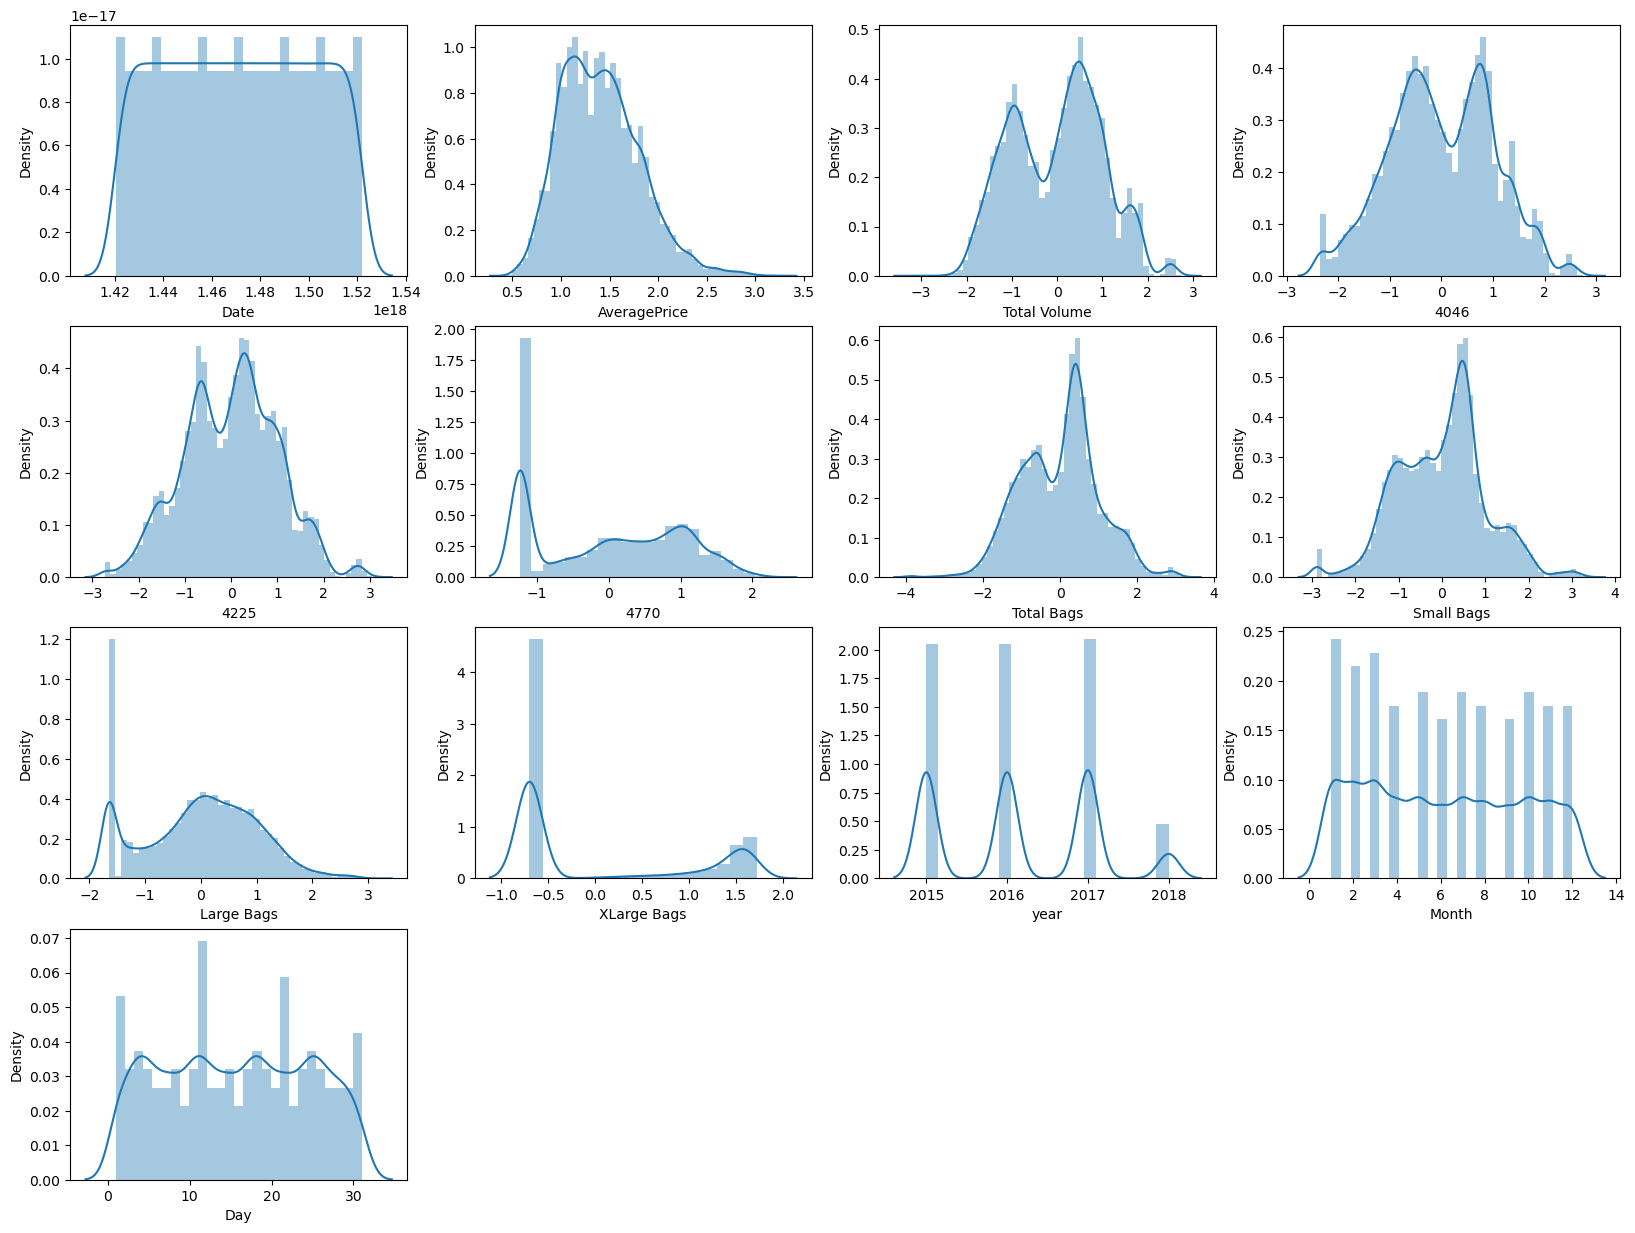

In [257]:
plt.figure(figsize=(20,15))
plotnumber=1


for column in x.columns:
    if plotnumber<=15:
        ax=plt.subplot(4,4,plotnumber)
        sns.distplot(df[column])
        plt.xlabel(column)
    plotnumber+=1   
plt.show() 

In [39]:
# Exclude datetime columns from the DataFrame
numeric_df = df.select_dtypes(include=['float64', 'int64'])

# Calculate the skewness
skewness = numeric_df.skew()

# Print the skewness of each column
print(skewness)


AveragePrice    0.580303
Total Volume    0.011171
4046           -0.022679
4225           -0.017740
4770            0.032184
Total Bags     -0.001626
Small Bags      0.007058
Large Bags     -0.073809
XLarge Bags     0.793520
year            0.215339
Month           0.106617
Day             0.014310
dtype: float64


We can conclude that skewness has been successfully eliminated from the dataset.

# Outliers

Eliminating date, categorical, and target variable columns:

In [40]:
x=df.drop(columns=['Date','type','region','AveragePrice'],axis=1)

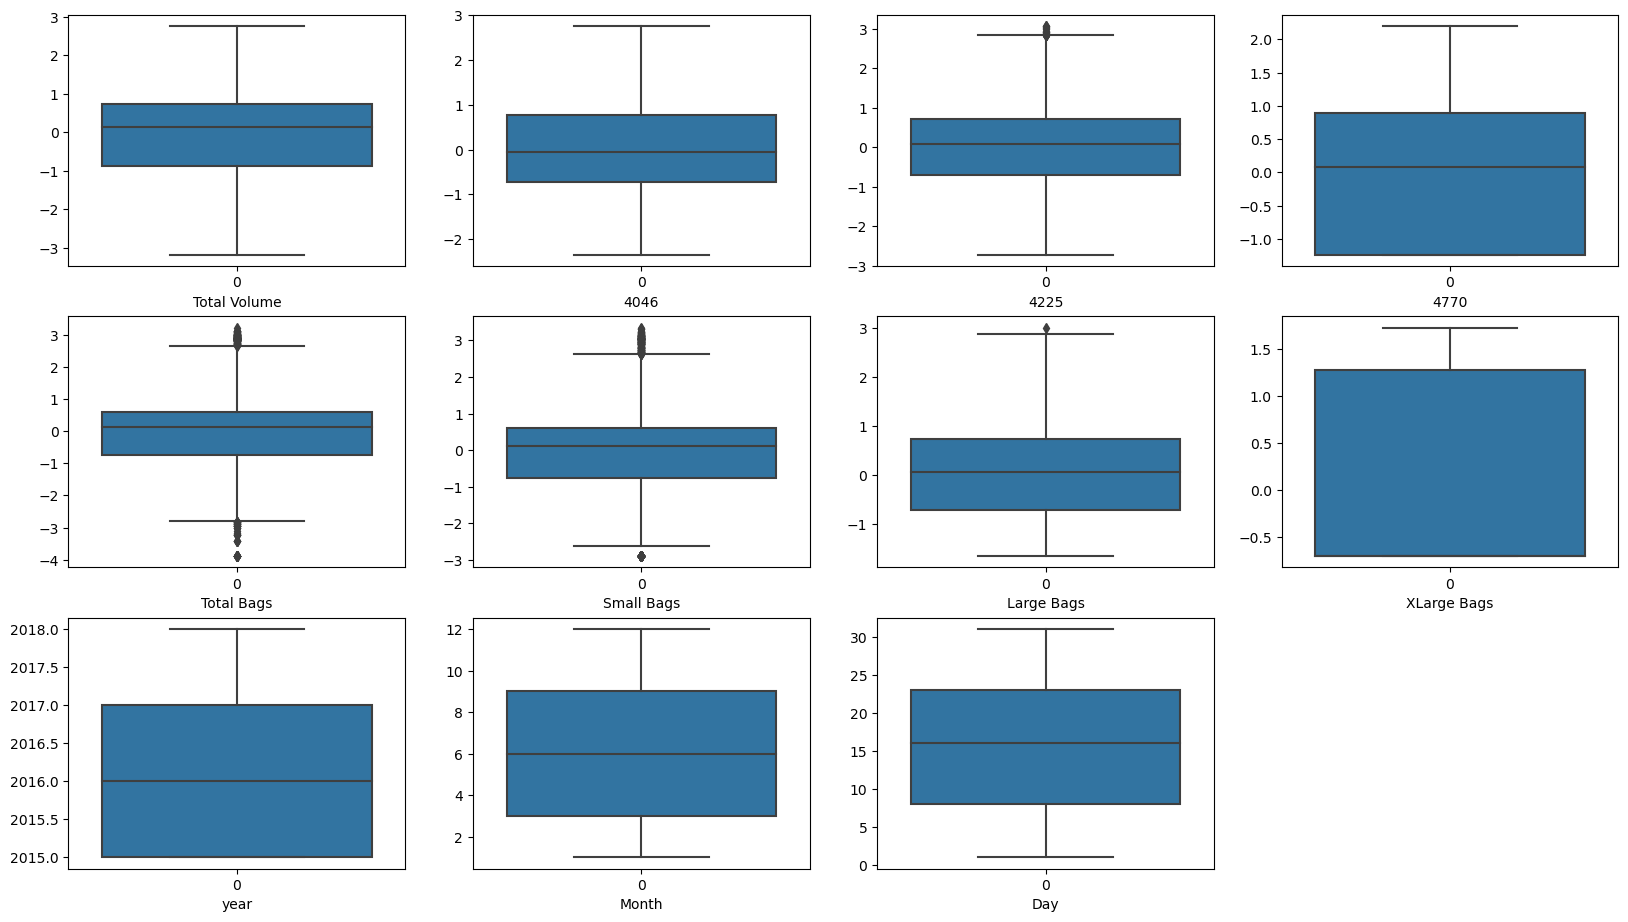

In [41]:
plt.figure(figsize=(20,15))
plotnumber=1


for column in x.columns:
    if plotnumber<=15:
        ax=plt.subplot(4,4,plotnumber)
        sns.boxplot(df[column])
        plt.xlabel(column)
    plotnumber+=1   
plt.show() 

We observe the presence of outliers in the columns: 4225, Total Bags, Small Bags, and Large Bags.

# Removing outliers using the IQR method:

In [42]:
# Exclude non-numeric columns from the DataFrame
numeric_df = df.select_dtypes(include=['float64', 'int64'])

# Calculate quartiles
q1 = numeric_df.quantile(0.25)
q3 = numeric_df.quantile(0.75)

# Calculate interquartile range (IQR)
IQR = q3 - q1

# Calculate upper and lower bounds for outliers
# upper_bound = q3 + (1.5 * IQR)
# lower_bound = q1 - (1.5 * IQR)


In [43]:
# 4225 

In [44]:
high_4225=(q3['4225']+(1.5*IQR['4225']))


index=np.where(df['4225']> high_4225)

df=df.drop(df.index[index])

In [45]:
#TotalBags

In [46]:
high_tb=(q3['Total Bags']+(1.5*IQR['Total Bags']))


index=np.where(df['Total Bags']> high_tb)

df=df.drop(df.index[index])

In [47]:
#smallBags 

In [48]:
high_sb=(q3['Small Bags']+(1.5*IQR['Small Bags']))


index=np.where(df['Small Bags']> high_sb)

df=df.drop(df.index[index])


In [49]:
# Large Bags 

In [50]:
high_lb=(q3['Large Bags']+(1.5*IQR['Large Bags']))


index=np.where(df['Large Bags']> high_lb)

df=df.drop(df.index[index])

In [51]:
#TotalBags

In [52]:
tb_low=q1['Total Bags']-(1.5*IQR['Total Bags'])

index=np.where(df['Total Bags']<tb_low)

df=df.drop(df.index[index])

In [53]:
#SmallBags 

In [54]:
sb_low=q1['Small Bags']-(1.5*IQR['Small Bags'])

index=np.where(df['Small Bags']<sb_low)

df=df.drop(df.index[index])

In [55]:
df.reset_index()

index       Date  AveragePrice  Total Volume      4046      4225  \
0          0 2015-12-27          1.33     -0.086605 -0.658619  0.307313   
1          1 2015-12-20          1.35     -0.155746 -0.776870  0.231647   
2          2 2015-12-13          0.93      0.179327 -0.731947  0.579503   
3          3 2015-12-06          1.08      0.003876 -0.634200  0.415100   
4          4 2015-11-29          1.28     -0.187640 -0.685293  0.224806   
...      ...        ...           ...           ...       ...       ...   
17898  18244 2018-02-04          1.63     -0.674587 -0.467366 -0.919470   
17899  18245 2018-01-28          1.71     -0.767550 -0.619883 -0.665372   
17900  18246 2018-01-21          1.87     -0.771505 -0.619831 -0.772496   
17901  18247 2018-01-14          1.93     -0.698077 -0.550282 -0.710543   
17902  18248 2018-01-07          1.62     -0.663809 -0.367908 -0.785173   

           4770  Total Bags  Small Bags  Large Bags  XLarge Bags  \
0     -0.247250   -0.524004   -0.340627   -0.773351    -0.699849   
1     -0.201041   -0.485890   -0.306425   -0.763435    -0.699849   
2     -0.007072   -0.552018   -0.366303   -0.750820    -0.699849   
3     -0.148322   -0.695449   -0.496853   -0.691865    -0.699849   
4     -0.137918   -0.669157   -0.477201   -0.600975    -0.699849   
...         ...         ...         ...         ...          ...   
17898 -1.238310   -0.334466   -0.178839   -0.410859    -0.699849   
17899 -1.238310   -0.496897   -0.325977   -0.481465    -0.699849   
17900  0.401546   -0.490952   -0.308728   -0.943486    -0.699849   
17901  0.401246   -0.424252   -0.248932   -0.908510    -0.699849   
17902  0.122919   -0.384961   -0.212590   -1.042250    -0.699849   

               type  year            region  Month  Day  
0      conventional  2015            Albany     12   27  
1      conventional  2015            Albany     12   20  
2      conventional  2015            Albany     12   13  
3      conventional  2015            Albany     12    6  
4      conventional  2015            Albany     11   29  
...             ...   ...               ...    ...  ...  
17898       organic  2018  WestTexNewMexico      2    4  
17899       organic  2018  WestTexNewMexico      1   28  
17900       organic  2018  WestTexNewMexico      1   21  
17901       organic  2018  WestTexNewMexico      1   14  
17902       organic  2018  WestTexNewMexico      1    7  

[17903 rows x 16 columns]

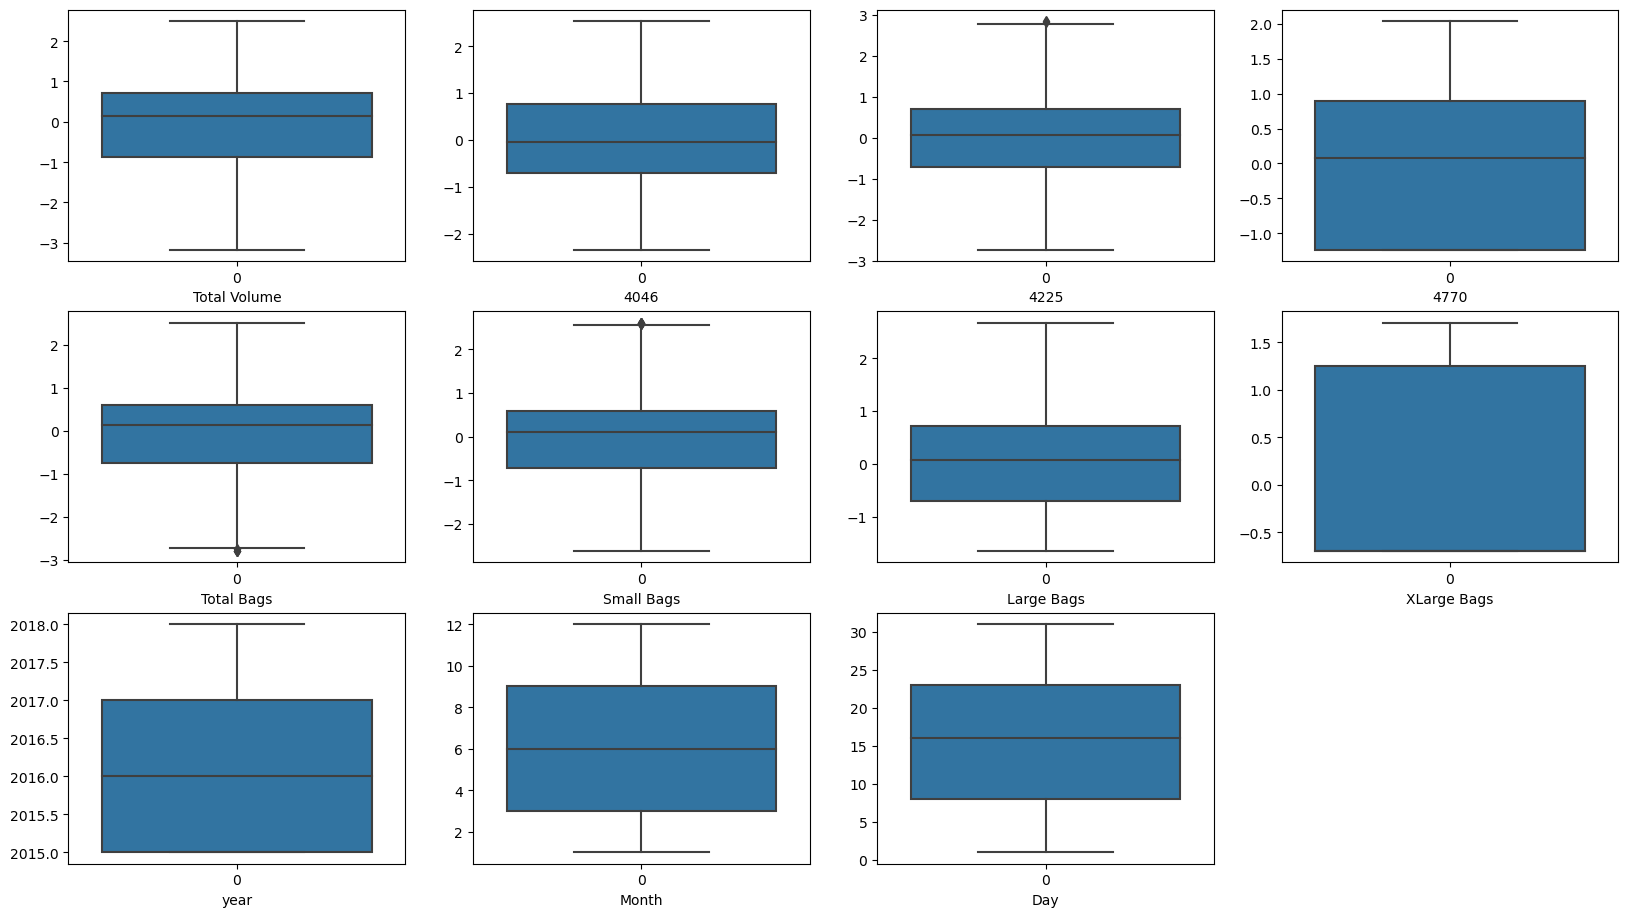

In [56]:
plt.figure(figsize=(20,15))
plotnumber=1


for column in x.columns:
    if plotnumber<=15:
        ax=plt.subplot(4,4,plotnumber)
        sns.boxplot(df[column])
        plt.xlabel(column)
    plotnumber+=1   
plt.show() 

We observe that a significant portion of outliers has been successfully removed from the dataset.

In [57]:
df.drop(columns=['Date'],inplace=True)

In [58]:
df

AveragePrice  Total Volume      4046      4225      4770  Total Bags  \
0              1.33     -0.086605 -0.658619  0.307313 -0.247250   -0.524004   
1              1.35     -0.155746 -0.776870  0.231647 -0.201041   -0.485890   
2              0.93      0.179327 -0.731947  0.579503 -0.007072   -0.552018   
3              1.08      0.003876 -0.634200  0.415100 -0.148322   -0.695449   
4              1.28     -0.187640 -0.685293  0.224806 -0.137918   -0.669157   
...             ...           ...       ...       ...       ...         ...   
18244          1.63     -0.674587 -0.467366 -0.919470 -1.238310   -0.334466   
18245          1.71     -0.767550 -0.619883 -0.665372 -1.238310   -0.496897   
18246          1.87     -0.771505 -0.619831 -0.772496  0.401546   -0.490952   
18247          1.93     -0.698077 -0.550282 -0.710543  0.401246   -0.424252   
18248          1.62     -0.663809 -0.367908 -0.785173  0.122919   -0.384961   

       Small Bags  Large Bags  XLarge Bags          type  year  \
0       -0.340627   -0.773351    -0.699849  conventional  2015   
1       -0.306425   -0.763435    -0.699849  conventional  2015   
2       -0.366303   -0.750820    -0.699849  conventional  2015   
3       -0.496853   -0.691865    -0.699849  conventional  2015   
4       -0.477201   -0.600975    -0.699849  conventional  2015   
...           ...         ...          ...           ...   ...   
18244   -0.178839   -0.410859    -0.699849       organic  2018   
18245   -0.325977   -0.481465    -0.699849       organic  2018   
18246   -0.308728   -0.943486    -0.699849       organic  2018   
18247   -0.248932   -0.908510    -0.699849       organic  2018   
18248   -0.212590   -1.042250    -0.699849       organic  2018   

                 region  Month  Day  
0                Albany     12   27  
1                Albany     12   20  
2                Albany     12   13  
3                Albany     12    6  
4                Albany     11   29  
...                 ...    ...  ...  
18244  WestTexNewMexico      2    4  
18245  WestTexNewMexico      1   28  
18246  WestTexNewMexico      1   21  
18247  WestTexNewMexico      1   14  
18248  WestTexNewMexico      1    7  

[17903 rows x 14 columns]

# Encoding of the object data-

In [278]:
object

['type', 'region']

Implementing Binary Encoding on the 'region' column due to the large number of categories:

In [279]:
from category_encoders import BinaryEncoder
b=BinaryEncoder()
new_df=b.fit_transform(df['region'])
new_df

region_0  region_1  region_2  region_3  region_4  region_5
0             0         0         0         0         0         1
1             0         0         0         0         0         1
2             0         0         0         0         0         1
3             0         0         0         0         0         1
4             0         0         0         0         0         1
...         ...       ...       ...       ...       ...       ...
18244         1         1         0         1         1         0
18245         1         1         0         1         1         0
18246         1         1         0         1         1         0
18247         1         1         0         1         1         0
18248         1         1         0         1         1         0

[17903 rows x 6 columns]

Concatenating the original DataFrame with the encoded data:

In [280]:
df = pd.concat([df, new_df], axis=1)
df.drop(columns="region",inplace=True)
df

AveragePrice  Total Volume      4046      4225      4770  Total Bags  \
0              1.33     -0.086605 -0.658619  0.307313 -0.247250   -0.524004   
1              1.35     -0.155746 -0.776870  0.231647 -0.201041   -0.485890   
2              0.93      0.179327 -0.731947  0.579503 -0.007072   -0.552018   
3              1.08      0.003876 -0.634200  0.415100 -0.148322   -0.695449   
4              1.28     -0.187640 -0.685293  0.224806 -0.137918   -0.669157   
...             ...           ...       ...       ...       ...         ...   
18244          1.63     -0.674587 -0.467366 -0.919470 -1.238310   -0.334466   
18245          1.71     -0.767550 -0.619883 -0.665372 -1.238310   -0.496897   
18246          1.87     -0.771505 -0.619831 -0.772496  0.401546   -0.490952   
18247          1.93     -0.698077 -0.550282 -0.710543  0.401246   -0.424252   
18248          1.62     -0.663809 -0.367908 -0.785173  0.122919   -0.384961   

       Small Bags  Large Bags  XLarge Bags          type  year  Month  Day  \
0       -0.340627   -0.773351    -0.699849  conventional  2015     12   27   
1       -0.306425   -0.763435    -0.699849  conventional  2015     12   20   
2       -0.366303   -0.750820    -0.699849  conventional  2015     12   13   
3       -0.496853   -0.691865    -0.699849  conventional  2015     12    6   
4       -0.477201   -0.600975    -0.699849  conventional  2015     11   29   
...           ...         ...          ...           ...   ...    ...  ...   
18244   -0.178839   -0.410859    -0.699849       organic  2018      2    4   
18245   -0.325977   -0.481465    -0.699849       organic  2018      1   28   
18246   -0.308728   -0.943486    -0.699849       organic  2018      1   21   
18247   -0.248932   -0.908510    -0.699849       organic  2018      1   14   
18248   -0.212590   -1.042250    -0.699849       organic  2018      1    7   

       region_0  region_1  region_2  region_3  region_4  region_5  
0             0         0         0         0         0         1  
1             0         0         0         0         0         1  
2             0         0         0         0         0         1  
3             0         0         0         0         0         1  
4             0         0         0         0         0         1  
...         ...       ...       ...       ...       ...       ...  
18244         1         1         0         1         1         0  
18245         1         1         0         1         1         0  
18246         1         1         0         1         1         0  
18247         1         1         0         1         1         0  
18248         1         1         0         1         1         0  

[17903 rows x 19 columns]

We can confirm that the 'region' column has been successfully encoded and concatenated with the main DataFrame.

Applying Label Encoder to the 'type' column as there are only two categories:

In [281]:
from sklearn.preprocessing import LabelEncoder
le= LabelEncoder()
df1=le.fit_transform(df['type'])
pd.Series(df1)

0        0
1        0
2        0
3        0
4        0
        ..
17898    1
17899    1
17900    1
17901    1
17902    1
Length: 17903, dtype: int32

In [282]:
df['type']=df1

In [283]:
df

AveragePrice  Total Volume      4046      4225      4770  Total Bags  \
0              1.33     -0.086605 -0.658619  0.307313 -0.247250   -0.524004   
1              1.35     -0.155746 -0.776870  0.231647 -0.201041   -0.485890   
2              0.93      0.179327 -0.731947  0.579503 -0.007072   -0.552018   
3              1.08      0.003876 -0.634200  0.415100 -0.148322   -0.695449   
4              1.28     -0.187640 -0.685293  0.224806 -0.137918   -0.669157   
...             ...           ...       ...       ...       ...         ...   
18244          1.63     -0.674587 -0.467366 -0.919470 -1.238310   -0.334466   
18245          1.71     -0.767550 -0.619883 -0.665372 -1.238310   -0.496897   
18246          1.87     -0.771505 -0.619831 -0.772496  0.401546   -0.490952   
18247          1.93     -0.698077 -0.550282 -0.710543  0.401246   -0.424252   
18248          1.62     -0.663809 -0.367908 -0.785173  0.122919   -0.384961   

       Small Bags  Large Bags  XLarge Bags  type  year  Month  Day  region_0  \
0       -0.340627   -0.773351    -0.699849     0  2015     12   27         0   
1       -0.306425   -0.763435    -0.699849     0  2015     12   20         0   
2       -0.366303   -0.750820    -0.699849     0  2015     12   13         0   
3       -0.496853   -0.691865    -0.699849     0  2015     12    6         0   
4       -0.477201   -0.600975    -0.699849     0  2015     11   29         0   
...           ...         ...          ...   ...   ...    ...  ...       ...   
18244   -0.178839   -0.410859    -0.699849     1  2018      2    4         1   
18245   -0.325977   -0.481465    -0.699849     1  2018      1   28         1   
18246   -0.308728   -0.943486    -0.699849     1  2018      1   21         1   
18247   -0.248932   -0.908510    -0.699849     1  2018      1   14         1   
18248   -0.212590   -1.042250    -0.699849     1  2018      1    7         1   

       region_1  region_2  region_3  region_4  region_5  
0             0         0         0         0         1  
1             0         0         0         0         1  
2             0         0         0         0         1  
3             0         0         0         0         1  
4             0         0         0         0         1  
...         ...       ...       ...       ...       ...  
18244         1         0         1         1         0  
18245         1         0         1         1         0  
18246         1         0         1         1         0  
18247         1         0         1         1         0  
18248         1         0         1         1         0  

[17903 rows x 19 columns]

We observe that the 'type' column has been successfully encoded using the Label Encoder method.

In [284]:
df.dtypes

AveragePrice    float64
Total Volume    float64
4046            float64
4225            float64
4770            float64
Total Bags      float64
Small Bags      float64
Large Bags      float64
XLarge Bags     float64
type              int32
year              int64
Month             int64
Day               int64
region_0          int64
region_1          int64
region_2          int64
region_3          int64
region_4          int64
region_5          int64
dtype: object

It is evident that all categorical data has been effectively encoded into numeric format.

In [285]:
df.describe()

AveragePrice  Total Volume          4046          4225          4770  \
count  17903.000000  17903.000000  17903.000000  17903.000000  17903.000000   
mean       1.405087     -0.012031     -0.016006     -0.018961     -0.007152   
std        0.401846      0.974471      0.978275      0.973337      0.986433   
min        0.440000     -3.172920     -2.343573     -2.725056     -1.238310   
25%        1.100000     -0.878555     -0.714819     -0.708778     -1.238310   
50%        1.370000      0.140553     -0.050278      0.071340      0.077857   
75%        1.660000      0.724861      0.758333      0.690923      0.889761   
max        3.250000      2.488765      2.527095      2.831567      2.036318   

         Total Bags    Small Bags    Large Bags   XLarge Bags          type  \
count  17903.000000  17903.000000  17903.000000  17903.000000  17903.000000   
mean      -0.004883      0.003050     -0.016242     -0.007882      0.499190   
std        0.948636      0.927526      0.977464      0.994251      0.500013   
min       -2.791311     -2.624488     -1.645675     -0.699849      0.000000   
25%       -0.734717     -0.723533     -0.710186     -0.699849      0.000000   
50%        0.144628      0.106229      0.073444     -0.699849      0.000000   
75%        0.604362      0.594178      0.718529      1.247406      1.000000   
max        2.514190      2.611596      2.666846      1.703879      1.000000   

               year         Month           Day      region_0      region_1  \
count  17903.000000  17903.000000  17903.000000  17903.000000  17903.000000   
mean    2016.156957      6.177400     15.655309      0.416913      0.420935   
std        0.939071      3.540993      8.774035      0.493062      0.493723   
min     2015.000000      1.000000      1.000000      0.000000      0.000000   
25%     2015.000000      3.000000      8.000000      0.000000      0.000000   
50%     2016.000000      6.000000     16.000000      0.000000      0.000000   
75%     2017.000000      9.000000     23.000000      1.000000      1.000000   
max     2018.000000     12.000000     31.000000      1.000000      1.000000   

           region_2      region_3      region_4      region_5  
count  17903.000000  17903.000000  17903.000000  17903.000000  
mean       0.449366      0.496900      0.506787      0.506005  
std        0.497443      0.500004      0.499968      0.499978  
min        0.000000      0.000000      0.000000      0.000000  
25%        0.000000      0.000000      0.000000      0.000000  
50%        0.000000      0.000000      1.000000      1.000000  
75%        1.000000      1.000000      1.000000      1.000000  
max        1.000000      1.000000      1.000000      1.000000

- The dataset contains a total of 17,896 records.
- The 'AveragePrice' column has a mean value of approximately 1.41, with a standard deviation of 0.40. The minimum and maximum values are 0.44 and 3.25, respectively.
- For the 'Total Volume' column, the mean is approximately -0.01, with a standard deviation of 0.97. The minimum and maximum values are -3.17 and 2.45, respectively.
- Similar statistics are provided for other numeric columns such as '4046', '4225', '4770', 'Total Bags', 'Small Bags', and 'Large Bags'.
- The 'type' column has been encoded, with a mean of approximately 0.50.
- The 'year' column ranges from 2015 to 2018, with a mean value of approximately 2016.16.
- The 'Month' column ranges from 1 to 12, with a mean value of approximately 6.18.
- The 'Day' column ranges from 1 to 31, with a mean value of approximately 15.66.
- Encoded 'region' columns (region_0 to region_5) have mean values ranging between 0.42 and 0.51.



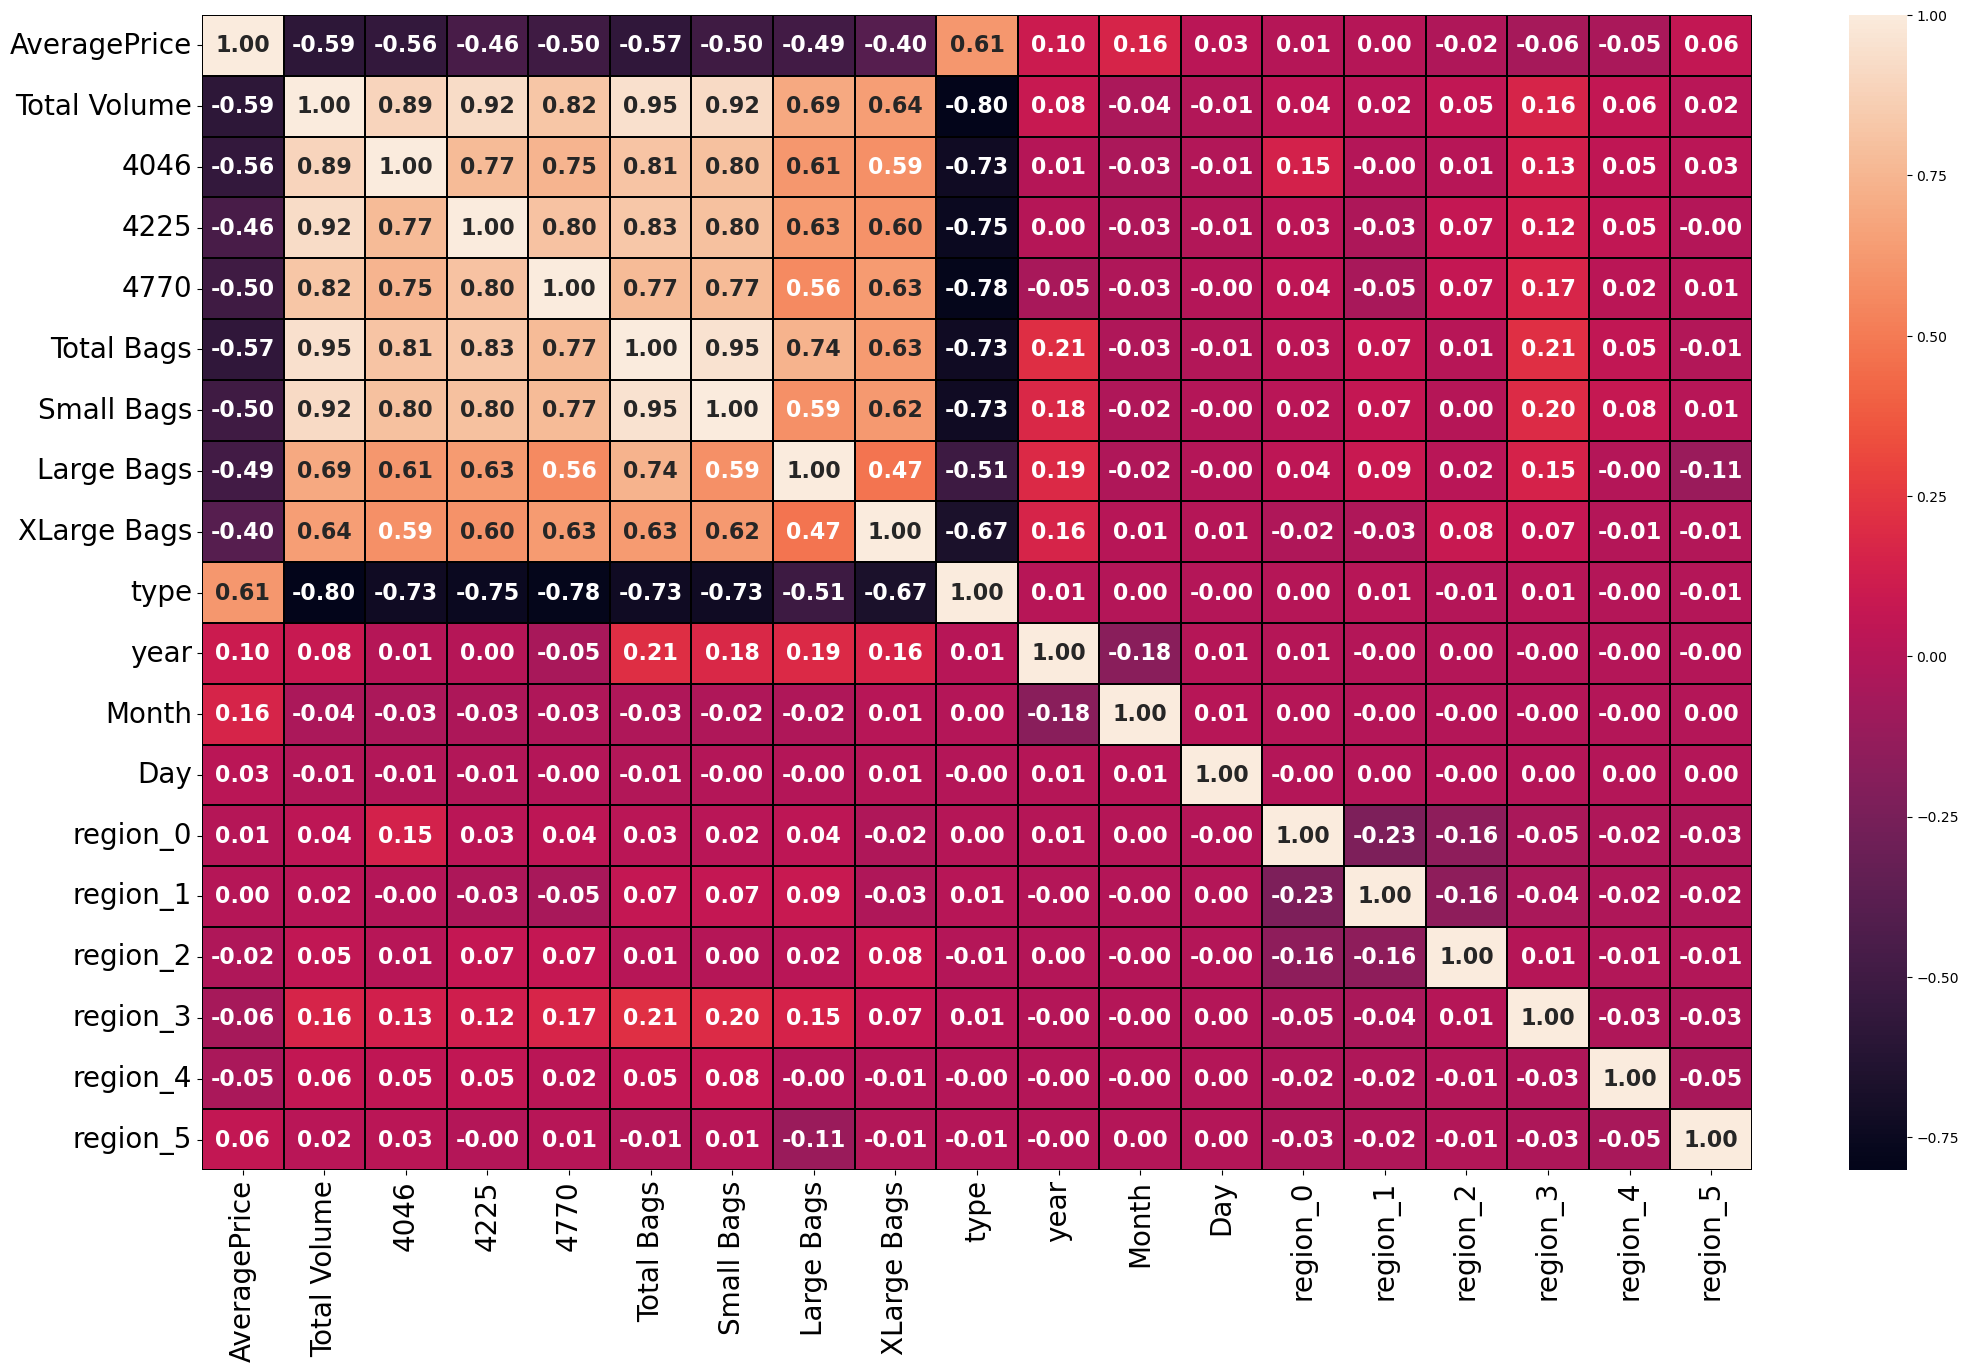

In [286]:
plt.figure(figsize=(25,15))
sns.heatmap(df.corr(),annot=True,fmt='.2f',linecolor='black',linewidth=0.2,annot_kws={'fontsize': 16,'fontweight': 'bold'})
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.show() 

Observations:

1. There exists an 89% positive correlation between 'Total Volume' and '4046'.
2. '4225' and 'Total Volume' exhibit a 92% positive correlation.
3. A positive correlation of 82% is observed between 'Total Volume' and '4770'.
4. 'Total Volume' and 'Total Bags' display a 95% positive correlation.
5. 'Total Volume' and 'Small Bags' have a positive correlation of 92%.
6. There is an 83% positive correlation between '4225' and 'Total Bags'.
7. A negative correlation of 80% is noted between 'type' and 'Total Volume'.
8. 'type' demonstrates a negative correlation of 78% with '4770'.
9. 'type' exhibits a negative correlation of 73% with '4046'.
10. A negative correlation of 75% is observed between '4225' and 'type'.
11. 'Total Bags' and 'type' display a negative correlation of 73%.
12. 'Small Bags' and 'type' have a negative correlation of 73%.


# Correlation between features and the target variable:

In [287]:
df.corr()['AveragePrice'].sort_values(ascending=False).to_frame()

AveragePrice
AveragePrice      1.000000
type              0.613085
Month             0.161107
year              0.104265
region_5          0.057573
Day               0.026702
region_0          0.006987
region_1          0.001029
region_2         -0.022941
region_4         -0.046755
region_3         -0.061047
XLarge Bags      -0.398176
4225             -0.459061
Large Bags       -0.486166
4770             -0.500294
Small Bags       -0.504535
4046             -0.556858
Total Bags       -0.573275
Total Volume     -0.585290

# Graphical depiction of the relationship between features and the target variable:

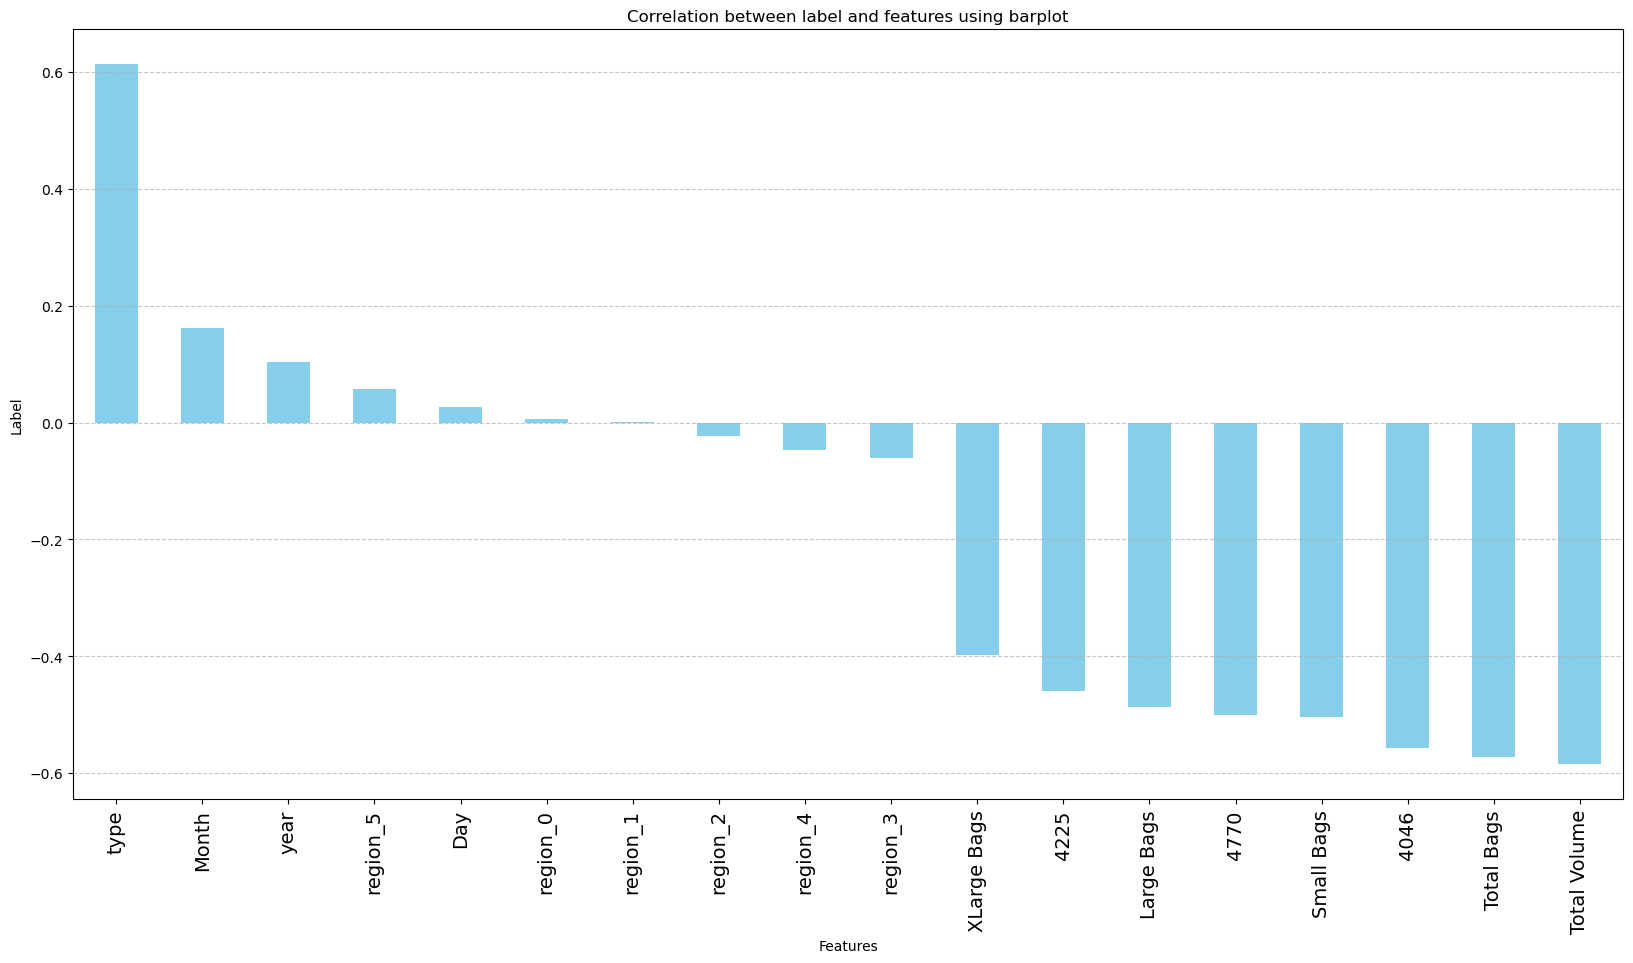

In [288]:
plt.figure(figsize=(20,10))
df.corr()['AveragePrice'].sort_values(ascending=False).drop(['AveragePrice']).plot(kind='bar', color='skyblue')
plt.xlabel('Features')
plt.ylabel('Label')
plt.xticks(fontsize=14)
plt.title('Correlation between label and features using barplot')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


Observations on the correlation between features and the target variable:

1. The type of avocados demonstrates the highest correlation with the target variable, with a correlation coefficient of 61%.
2. Features such as 'Total Volume', 'Total Bags', '4046', 'Small Bags', '4770', 'Large Bags', and '4225' exhibit a strong negative correlation with the target variable 'AveragePrice'.
3. 'Day', 'Year', and 'Region' columns show very weak correlations with the average price.

In [289]:
df

AveragePrice  Total Volume      4046      4225      4770  Total Bags  \
0              1.33     -0.086605 -0.658619  0.307313 -0.247250   -0.524004   
1              1.35     -0.155746 -0.776870  0.231647 -0.201041   -0.485890   
2              0.93      0.179327 -0.731947  0.579503 -0.007072   -0.552018   
3              1.08      0.003876 -0.634200  0.415100 -0.148322   -0.695449   
4              1.28     -0.187640 -0.685293  0.224806 -0.137918   -0.669157   
...             ...           ...       ...       ...       ...         ...   
18244          1.63     -0.674587 -0.467366 -0.919470 -1.238310   -0.334466   
18245          1.71     -0.767550 -0.619883 -0.665372 -1.238310   -0.496897   
18246          1.87     -0.771505 -0.619831 -0.772496  0.401546   -0.490952   
18247          1.93     -0.698077 -0.550282 -0.710543  0.401246   -0.424252   
18248          1.62     -0.663809 -0.367908 -0.785173  0.122919   -0.384961   

       Small Bags  Large Bags  XLarge Bags  type  year  Month  Day  region_0  \
0       -0.340627   -0.773351    -0.699849     0  2015     12   27         0   
1       -0.306425   -0.763435    -0.699849     0  2015     12   20         0   
2       -0.366303   -0.750820    -0.699849     0  2015     12   13         0   
3       -0.496853   -0.691865    -0.699849     0  2015     12    6         0   
4       -0.477201   -0.600975    -0.699849     0  2015     11   29         0   
...           ...         ...          ...   ...   ...    ...  ...       ...   
18244   -0.178839   -0.410859    -0.699849     1  2018      2    4         1   
18245   -0.325977   -0.481465    -0.699849     1  2018      1   28         1   
18246   -0.308728   -0.943486    -0.699849     1  2018      1   21         1   
18247   -0.248932   -0.908510    -0.699849     1  2018      1   14         1   
18248   -0.212590   -1.042250    -0.699849     1  2018      1    7         1   

       region_1  region_2  region_3  region_4  region_5  
0             0         0         0         0         1  
1             0         0         0         0         1  
2             0         0         0         0         1  
3             0         0         0         0         1  
4             0         0         0         0         1  
...         ...       ...       ...       ...       ...  
18244         1         0         1         1         0  
18245         1         0         1         1         0  
18246         1         0         1         1         0  
18247         1         0         1         1         0  
18248         1         0         1         1         0  

[17903 rows x 19 columns]

# Preparing Data for Machine Learning

# Splitting

Choose the dependent(label)and independent variables

In [290]:
X = df.drop('AveragePrice', axis=1)
Y = df['AveragePrice']

In [291]:
X

Total Volume      4046      4225      4770  Total Bags  Small Bags  \
0         -0.086605 -0.658619  0.307313 -0.247250   -0.524004   -0.340627   
1         -0.155746 -0.776870  0.231647 -0.201041   -0.485890   -0.306425   
2          0.179327 -0.731947  0.579503 -0.007072   -0.552018   -0.366303   
3          0.003876 -0.634200  0.415100 -0.148322   -0.695449   -0.496853   
4         -0.187640 -0.685293  0.224806 -0.137918   -0.669157   -0.477201   
...             ...       ...       ...       ...         ...         ...   
18244     -0.674587 -0.467366 -0.919470 -1.238310   -0.334466   -0.178839   
18245     -0.767550 -0.619883 -0.665372 -1.238310   -0.496897   -0.325977   
18246     -0.771505 -0.619831 -0.772496  0.401546   -0.490952   -0.308728   
18247     -0.698077 -0.550282 -0.710543  0.401246   -0.424252   -0.248932   
18248     -0.663809 -0.367908 -0.785173  0.122919   -0.384961   -0.212590   

       Large Bags  XLarge Bags  type  year  Month  Day  region_0  region_1  \
0       -0.773351    -0.699849     0  2015     12   27         0         0   
1       -0.763435    -0.699849     0  2015     12   20         0         0   
2       -0.750820    -0.699849     0  2015     12   13         0         0   
3       -0.691865    -0.699849     0  2015     12    6         0         0   
4       -0.600975    -0.699849     0  2015     11   29         0         0   
...           ...          ...   ...   ...    ...  ...       ...       ...   
18244   -0.410859    -0.699849     1  2018      2    4         1         1   
18245   -0.481465    -0.699849     1  2018      1   28         1         1   
18246   -0.943486    -0.699849     1  2018      1   21         1         1   
18247   -0.908510    -0.699849     1  2018      1   14         1         1   
18248   -1.042250    -0.699849     1  2018      1    7         1         1   

       region_2  region_3  region_4  region_5  
0             0         0         0         1  
1             0         0         0         1  
2             0         0         0         1  
3             0         0         0         1  
4             0         0         0         1  
...         ...       ...       ...       ...  
18244         0         1         1         0  
18245         0         1         1         0  
18246         0         1         1         0  
18247         0         1         1         0  
18248         0         1         1         0  

[17903 rows x 18 columns]

In [292]:
X.shape

(17903, 18)

In [293]:
Y

0        1.33
1        1.35
2        0.93
3        1.08
4        1.28
         ... 
18244    1.63
18245    1.71
18246    1.87
18247    1.93
18248    1.62
Name: AveragePrice, Length: 17903, dtype: float64

In [294]:
Y.shape

(17903,)

# Feature Scaling

In [295]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)
X 

Total Volume      4046      4225      4770  Total Bags  Small Bags  \
0         -0.076530 -0.656903  0.335221 -0.243408   -0.547244   -0.370542   
1         -0.147484 -0.777783  0.257481 -0.196561   -0.507065   -0.333666   
2          0.196376 -0.731861  0.614876  0.000080   -0.576775   -0.398225   
3          0.016324 -0.631941  0.445964 -0.143116   -0.727977   -0.538979   
4         -0.180215 -0.684170  0.250452 -0.132569   -0.700261   -0.517791   
...             ...       ...       ...       ...         ...         ...   
17898     -0.679933 -0.461397 -0.925202 -1.248125   -0.347438   -0.196107   
17899     -0.775334 -0.617305 -0.664137 -1.248125   -0.518668   -0.354746   
17900     -0.779393 -0.617252 -0.774198  0.414330   -0.512401   -0.336149   
17901     -0.704039 -0.546157 -0.710546  0.414026   -0.442088   -0.271679   
17902     -0.668873 -0.359728 -0.787223  0.131863   -0.400668   -0.232497   

       Large Bags  XLarge Bags      type      year     Month       Day  \
0       -0.774585    -0.695988 -0.998381 -1.232057  1.644387  1.293021   
1       -0.764440    -0.695988 -0.998381 -1.232057  1.644387  0.495190   
2       -0.751534    -0.695988 -0.998381 -1.232057  1.644387 -0.302641   
3       -0.691219    -0.695988 -0.998381 -1.232057  1.644387 -1.100472   
4       -0.598231    -0.695988 -0.998381 -1.232057  1.361972  1.520972   
...           ...          ...       ...       ...       ...       ...   
17898   -0.403726    -0.695988  1.001621  1.962679 -1.179759 -1.328424   
17899   -0.475961    -0.695988  1.001621  1.962679 -1.462173  1.406996   
17900   -0.948648    -0.695988  1.001621  1.962679 -1.462173  0.609166   
17901   -0.912865    -0.695988  1.001621  1.962679 -1.462173 -0.188665   
17902   -1.049692    -0.695988  1.001621  1.962679 -1.462173 -0.986496   

       region_0  region_1  region_2  region_3  region_4  region_5  
0     -0.845583 -0.852597 -0.903376 -0.993819 -1.013667  0.988062  
1     -0.845583 -0.852597 -0.903376 -0.993819 -1.013667  0.988062  
2     -0.845583 -0.852597 -0.903376 -0.993819 -1.013667  0.988062  
3     -0.845583 -0.852597 -0.903376 -0.993819 -1.013667  0.988062  
4     -0.845583 -0.852597 -0.903376 -0.993819 -1.013667  0.988062  
...         ...       ...       ...       ...       ...       ...  
17898  1.182616  1.172887 -0.903376  1.006219  0.986518 -1.012082  
17899  1.182616  1.172887 -0.903376  1.006219  0.986518 -1.012082  
17900  1.182616  1.172887 -0.903376  1.006219  0.986518 -1.012082  
17901  1.182616  1.172887 -0.903376  1.006219  0.986518 -1.012082  
17902  1.182616  1.172887 -0.903376  1.006219  0.986518 -1.012082  

[17903 rows x 18 columns]

To address potential bias stemming from variations in decimal places across feature columns, I've opted to standardize all the features using the Standard Scaler method. This technique ensures that all feature columns have comparable scales, which can enhance the performance and stability of my model.

# Assessing multicollinearity among features.

In [79]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [297]:
vif=pd.DataFrame()
vif['VIF Values']=[variance_inflation_factor(X.values,i) for i in range(len(X.columns))]
vif['Features']=X.columns
vif

VIF Values      Features
0    56.318637  Total Volume
1     7.351694          4046
2    11.179311          4225
3     4.284176          4770
4    38.461072    Total Bags
5    18.163449    Small Bags
6     3.626093    Large Bags
7     2.143250   XLarge Bags
8     4.048659          type
9     1.420452          year
10    1.055614         Month
11    1.000839           Day
12    1.212340      region_0
13    1.183608      region_1
14    1.122104      region_2
15    1.184732      region_3
16    1.034607      region_4
17    1.047410      region_5

We've identified higher VIF (Variance Inflation Factor) values in the 'Total Volume', 'Total Bags', and 'Small Bags' columns, surpassing the acceptable range. Consequently, we need to drop these columns to mitigate multicollinearity among features.

In [298]:
X=X.drop(columns=['Total Volume','Total Bags',],axis=1)
X

4046      4225      4770  Small Bags  Large Bags  XLarge Bags  \
0     -0.656903  0.335221 -0.243408   -0.370542   -0.774585    -0.695988   
1     -0.777783  0.257481 -0.196561   -0.333666   -0.764440    -0.695988   
2     -0.731861  0.614876  0.000080   -0.398225   -0.751534    -0.695988   
3     -0.631941  0.445964 -0.143116   -0.538979   -0.691219    -0.695988   
4     -0.684170  0.250452 -0.132569   -0.517791   -0.598231    -0.695988   
...         ...       ...       ...         ...         ...          ...   
17898 -0.461397 -0.925202 -1.248125   -0.196107   -0.403726    -0.695988   
17899 -0.617305 -0.664137 -1.248125   -0.354746   -0.475961    -0.695988   
17900 -0.617252 -0.774198  0.414330   -0.336149   -0.948648    -0.695988   
17901 -0.546157 -0.710546  0.414026   -0.271679   -0.912865    -0.695988   
17902 -0.359728 -0.787223  0.131863   -0.232497   -1.049692    -0.695988   

           type      year     Month       Day  region_0  region_1  region_2  \
0     -0.998381 -1.232057  1.644387  1.293021 -0.845583 -0.852597 -0.903376   
1     -0.998381 -1.232057  1.644387  0.495190 -0.845583 -0.852597 -0.903376   
2     -0.998381 -1.232057  1.644387 -0.302641 -0.845583 -0.852597 -0.903376   
3     -0.998381 -1.232057  1.644387 -1.100472 -0.845583 -0.852597 -0.903376   
4     -0.998381 -1.232057  1.361972  1.520972 -0.845583 -0.852597 -0.903376   
...         ...       ...       ...       ...       ...       ...       ...   
17898  1.001621  1.962679 -1.179759 -1.328424  1.182616  1.172887 -0.903376   
17899  1.001621  1.962679 -1.462173  1.406996  1.182616  1.172887 -0.903376   
17900  1.001621  1.962679 -1.462173  0.609166  1.182616  1.172887 -0.903376   
17901  1.001621  1.962679 -1.462173 -0.188665  1.182616  1.172887 -0.903376   
17902  1.001621  1.962679 -1.462173 -0.986496  1.182616  1.172887 -0.903376   

       region_3  region_4  region_5  
0     -0.993819 -1.013667  0.988062  
1     -0.993819 -1.013667  0.988062  
2     -0.993819 -1.013667  0.988062  
3     -0.993819 -1.013667  0.988062  
4     -0.993819 -1.013667  0.988062  
...         ...       ...       ...  
17898  1.006219  0.986518 -1.012082  
17899  1.006219  0.986518 -1.012082  
17900  1.006219  0.986518 -1.012082  
17901  1.006219  0.986518 -1.012082  
17902  1.006219  0.986518 -1.012082  

[17903 rows x 16 columns]

In [299]:
vif=pd.DataFrame()
vif['VIF Values']=[variance_inflation_factor(X.values,i) for i in range(len(X.columns))]
vif['Features']=X.columns
vif

VIF Values     Features
0     3.986629         4046
1     4.381353         4225
2     4.252796         4770
3     4.912465   Small Bags
4     2.041822   Large Bags
5     2.116690  XLarge Bags
6     3.745586         type
7     1.380431         year
8     1.052398        Month
9     1.000588          Day
10    1.199818     region_0
11    1.183136     region_1
12    1.099719     region_2
13    1.168214     region_3
14    1.029541     region_4
15    1.038297     region_5

The multicollinearity among features has been successfully mitigated, allowing us to proceed with model building.

In [300]:
df.corr()['AveragePrice']

AveragePrice    1.000000
Total Volume   -0.585290
4046           -0.556858
4225           -0.459061
4770           -0.500294
Total Bags     -0.573275
Small Bags     -0.504535
Large Bags     -0.486166
XLarge Bags    -0.398176
type            0.613085
year            0.104265
Month           0.161107
Day             0.026702
region_0        0.006987
region_1        0.001029
region_2       -0.022941
region_3       -0.061047
region_4       -0.046755
region_5        0.057573
Name: AveragePrice, dtype: float64

# Model Building-1

In [301]:
maxacc=0
maxrs=0
for i in range(1,200):
    x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.30,random_state=i) 
    lr=LinearRegression()
    lr.fit(x_train,y_train)
    pred=lr.predict(x_test)
    acc=r2_score(y_test,pred)   
    if acc>maxacc:
        maxacc=acc
        maxrs=i
print('Best accuracy is', maxacc,'at random state',maxrs) 

Best accuracy is 0.5395200925651833 at random state 173


In [302]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=maxrs)

20% of the dataset will be used for testing, and the remaining 80% for training our machine learning models.

In [303]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_squared_error, r2_score
print()
def evaluate_regression(model, X, Y):
    print('Model Name:',model)
    # Splitting data into train and test sets
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=maxrs)
    
    # Training the model
    model.fit(X_train, Y_train)
    
    # Predicting y_test
    pred = model.predict(X_test)
    
    # Predicting y_train
    train = model.predict(X_train)
    
    
    # R-squared Score
    r2 = r2_score(Y_test, pred)
    print("R-squared Score:", r2)
    
    #R-squared Score on training data
    r3 = r2_score(Y_train, train)
    print("R-squared Score on training data:", r3*100)
    
    # Mean Absolute Error
    mae = mean_absolute_error(Y_test, pred)
    print("Mean Absolute Error:", mae)
    
    # Mean Squared Error
    mse = mean_squared_error(Y_test, pred)
    print("Mean Squared Error:", mse)
    
    # Root Mean Squared Error
    rmse =np.sqrt(mean_squared_error(Y_test, pred))
    print("Root Mean Squared Error:", rmse)
    
    
    
    # Cross Validation Score
    cv_score = cross_val_score(model, X, Y, cv=5, scoring='r2') 
    print("\nCross Validation Score:", cv_score)
    print("Cross Validation Score Mean:", cv_score.mean())
    
    # Result of accuracy minus cv scores
    result = r2 - cv_score.mean()
    print("R-squared Score - Cross Validation Score is", result*100)


In [304]:
# Linear Regression
LR = LinearRegression()
evaluate_regression(LR,X, Y)

Model Name: LinearRegression()
R-squared Score: 0.5441354511379589
R-squared Score on training data: 51.56922978845992
Mean Absolute Error: 0.21149334869119316
Mean Squared Error: 0.07551776613039822
Root Mean Squared Error: 0.27480496016338246

Cross Validation Score: [-0.44694562  0.19952797  0.46163335  0.17101182  0.17800275]
Cross Validation Score Mean: 0.11264605602083792
R-squared Score - Cross Validation Score is 43.1489395117121


In [305]:
# Ridge Regressor
RDG = Ridge()
evaluate_regression(RDG,X, Y)

Model Name: Ridge()
R-squared Score: 0.5441331633173312
R-squared Score on training data: 51.56922824750948
Mean Absolute Error: 0.21149270290749891
Mean Squared Error: 0.07551814512697418
Root Mean Squared Error: 0.2748056497362712

Cross Validation Score: [-0.44678508  0.19957663  0.46165015  0.17099469  0.17798485]
Cross Validation Score Mean: 0.11268424602946217
R-squared Score - Cross Validation Score is 43.1448917287869


In [306]:
# Lasso Regressor
LS = Lasso()
evaluate_regression(LS,X, Y)

Model Name: Lasso()
R-squared Score: -0.0004500725147591478
R-squared Score on training data: 0.0
Mean Absolute Error: 0.3272308986110771
Mean Squared Error: 0.16573290199886517
Root Mean Squared Error: 0.40710306066015417

Cross Validation Score: [-3.92565437 -0.74976822 -0.01992998 -0.44689421 -0.82060643]
Cross Validation Score Mean: -1.192570642323561
R-squared Score - Cross Validation Score is 119.21205698088018


In [307]:
# Decision Tree Regression
DT = DecisionTreeRegressor()
evaluate_regression(DT,X, Y)

Model Name: DecisionTreeRegressor()
R-squared Score: 0.7763834083553603
R-squared Score on training data: 100.0
Mean Absolute Error: 0.12451829098017313
Mean Squared Error: 0.03704395420273667
Root Mean Squared Error: 0.1924680602145111

Cross Validation Score: [-0.79951685  0.17071446  0.28003871 -0.46064338 -0.40123181]
Cross Validation Score Mean: -0.24212777444764608
R-squared Score - Cross Validation Score is 101.85111828030064


In [308]:
# Random Forest Regression
RFR = RandomForestRegressor()
evaluate_regression(RFR,X, Y)

Model Name: RandomForestRegressor()
R-squared Score: 0.8932917621872725
R-squared Score on training data: 98.47001043597552
Mean Absolute Error: 0.09198053616308294
Mean Squared Error: 0.017677109938564646
Root Mean Squared Error: 0.1329552930069527

Cross Validation Score: [-0.21547548  0.46695639  0.60867458  0.3041245   0.00131857]
Cross Validation Score Mean: 0.23311971304127113
R-squared Score - Cross Validation Score is 66.01720491460014


In [309]:
# Extra Tree Regression
ETR = ExtraTreesRegressor()
evaluate_regression(ETR,X, Y)

Model Name: ExtraTreesRegressor()
R-squared Score: 0.9335745935628925
R-squared Score on training data: 100.0
Mean Absolute Error: 0.07308475286232897
Mean Squared Error: 0.011003922812063676
Root Mean Squared Error: 0.10489958442274057

Cross Validation Score: [-0.050824    0.55923094  0.67074227  0.30585539  0.13432481]
Cross Validation Score Mean: 0.3238658802209686
R-squared Score - Cross Validation Score is 60.97087133419239


In [310]:
# ADA Boost Regressor
ABR = AdaBoostRegressor()
evaluate_regression(ABR,X, Y)

Model Name: AdaBoostRegressor()
R-squared Score: 0.5689261642121481
R-squared Score on training data: 54.60392192514303
Mean Absolute Error: 0.21532061421718215
Mean Squared Error: 0.07141097766260493
Root Mean Squared Error: 0.2672283249631388

Cross Validation Score: [-0.84786607  0.29240787  0.50575947 -0.14006525  0.09393122]
Cross Validation Score Mean: -0.019166552766493438
R-squared Score - Cross Validation Score is 58.80927169786416


In [311]:
# GradientBoostingRegressor
GBR = GradientBoostingRegressor()
evaluate_regression(GBR,X, Y)

Model Name: GradientBoostingRegressor()
R-squared Score: 0.7344895041756341
R-squared Score on training data: 73.79209225766263
Mean Absolute Error: 0.15651649518000138
Mean Squared Error: 0.04398402898159674
Root Mean Squared Error: 0.2097236967574164

Cross Validation Score: [0.05100599 0.55875419 0.64176232 0.31639367 0.17081843]
Cross Validation Score Mean: 0.34774692231160786
R-squared Score - Cross Validation Score is 38.674258186402625


In [312]:
# XGBRegressor
XGBR = XGBRegressor()
evaluate_regression(XGBR,X, Y)

Model Name: XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)
R-squared Score: 0.8991956722671568
R-squared Score on training data: 95.84262051251507
Mean Absolute Error: 0.09329515989783489
Mean Squared Error: 0.016699077973191232
Root Mean Squared Error: 0.12922491235513078

Cross Validation Score: [

# summary of the evaluation metrics for each model:

1. LinearRegression:
   - R-squared Score: 0.5441
   - Cross Validation Score Mean: 0.1126
   - Difference between R-squared Score and Cross Validation Score: 43.1489

2. Ridge:
   - R-squared Score: 0.5441
   - Cross Validation Score Mean: 0.1127
   - Difference between R-squared Score and Cross Validation Score: 43.1449

3. Lasso:
   - R-squared Score: -0.0005
   - Cross Validation Score Mean: -1.1926
   - Difference between R-squared Score and Cross Validation Score: 119.2121

4. DecisionTreeRegressor:
   - R-squared Score: 0.7764
   - Cross Validation Score Mean: -0.2421
   - Difference between R-squared Score and Cross Validation Score: 101.8511

5. RandomForestRegressor:
   - R-squared Score: 0.8933
   - Cross Validation Score Mean: 0.2331
   - Difference between R-squared Score and Cross Validation Score: 66.0172

6. ExtraTreesRegressor (Best Model):
   - R-squared Score: 0.9336
   - Cross Validation Score Mean: 0.3239
   - Difference between R-squared Score and Cross Validation Score: 60.9709

7. AdaBoostRegressor:
   - R-squared Score: 0.5689
   - Cross Validation Score Mean: -0.0192
   - Difference between R-squared Score and Cross Validation Score: 58.8093

8. GradientBoostingRegressor:
   - R-squared Score: 0.7345
   - Cross Validation Score Mean: 0.3477
   - Difference between R-squared Score and Cross Validation Score: 38.6743

9. XGBRegressor:
   - R-squared Score: 0.8992
   - Cross Validation Score Mean: 0.4239
   - Difference between R-squared Score and Cross Validation Score: 47.5299

Among these models, the ExtraTreesRegressor stands out with the highest R-squared score and the least difference between R-squared score and cross-validation score, indicating strong performance and generalization capability.

# Hyper parameter tuning on the best ML Model

In [316]:
# Choosing the  ExtraTreesRegressor  as best model
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

In [317]:
from sklearn.model_selection import GridSearchCV
grid_search = GridSearchCV(estimator=ETR, param_grid=param_grid, cv=5)

In [318]:
grid_search.fit(X_train, Y_train)

GridSearchCV(cv=5, estimator=ExtraTreesRegressor(),
             param_grid={'bootstrap': [True, False],
                         'max_depth': [None, 10, 20],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100, 200]})

In [319]:
best_params = grid_search.best_params_
best_params

{'bootstrap': False,
 'max_depth': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 200}

In [320]:
final_model_1 = ExtraTreesRegressor(bootstrap=False,
                                    max_depth=None,
                                    min_samples_leaf=1,
                                    min_samples_split=2,
                                    n_estimators=200, random_state=maxrs)

In [321]:
final_model_1.fit(x_train,y_train)

ExtraTreesRegressor(n_estimators=200, random_state=173)

In [322]:
pred=final_model_1.predict(X_test)

In [323]:
mse = mean_squared_error(Y_test, pred)

In [324]:
print("Mean Squared Error:", mse)

Mean Squared Error: 0.003516244040770727


In [325]:
r2_score(Y_test,pred)

0.9787741205087162

# Saving the model

In [327]:
import joblib
filename = "FinalModel_5.pkl"
joblib.dump(final_model_1, filename)

['FinalModel_5.pkl']

In [328]:
model=joblib.load("FinalModel_5.pkl")

prediction=model.predict(X_test)
prediction

array([1.1443 , 1.3824 , 1.17   , ..., 1.47   , 1.16355, 0.78   ])

In [329]:
a=np.array(Y_test)
df=pd.DataFrame()
df['Predicted']=prediction
df['Original']=a
df

Predicted  Original
0       1.14430      1.08
1       1.38240      1.37
2       1.17000      1.17
3       1.16000      1.16
4       1.27000      1.27
...         ...       ...
3576    0.76000      0.76
3577    1.38000      1.38
3578    1.47000      1.47
3579    1.16355      1.18
3580    0.78000      0.78

[3581 rows x 2 columns]

In [330]:
df.tail()

Predicted  Original
3576    0.76000      0.76
3577    1.38000      1.38
3578    1.47000      1.47
3579    1.16355      1.18
3580    0.78000      0.78

 Plotting the disparity between predicted and actual values aids in comprehending the discrepancy more effectively.

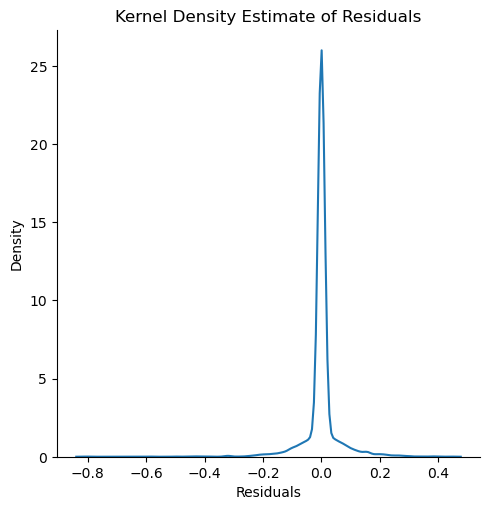

In [334]:
# Calculate residuals
residuals = prediction - Y_test

# Create KDE plot of residuals
sns.displot(residuals, kind='kde')

# Add labels and title
plt.xlabel('Residuals')
plt.ylabel('Density')
plt.title('Kernel Density Estimate of Residuals')

# Show the plot
plt.show()

# 2.Classification Problem(Predicting Region-)

# Import important library :

In [59]:
import warnings
warnings.simplefilter("ignore")
import joblib

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import scipy.stats as stats
from scipy.stats import zscore

# from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.neighbors import KNeighborsClassifier
import xgboost as xgb

from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV 

In [60]:
df

AveragePrice  Total Volume      4046      4225      4770  Total Bags  \
0              1.33     -0.086605 -0.658619  0.307313 -0.247250   -0.524004   
1              1.35     -0.155746 -0.776870  0.231647 -0.201041   -0.485890   
2              0.93      0.179327 -0.731947  0.579503 -0.007072   -0.552018   
3              1.08      0.003876 -0.634200  0.415100 -0.148322   -0.695449   
4              1.28     -0.187640 -0.685293  0.224806 -0.137918   -0.669157   
...             ...           ...       ...       ...       ...         ...   
18244          1.63     -0.674587 -0.467366 -0.919470 -1.238310   -0.334466   
18245          1.71     -0.767550 -0.619883 -0.665372 -1.238310   -0.496897   
18246          1.87     -0.771505 -0.619831 -0.772496  0.401546   -0.490952   
18247          1.93     -0.698077 -0.550282 -0.710543  0.401246   -0.424252   
18248          1.62     -0.663809 -0.367908 -0.785173  0.122919   -0.384961   

       Small Bags  Large Bags  XLarge Bags          type  year  \
0       -0.340627   -0.773351    -0.699849  conventional  2015   
1       -0.306425   -0.763435    -0.699849  conventional  2015   
2       -0.366303   -0.750820    -0.699849  conventional  2015   
3       -0.496853   -0.691865    -0.699849  conventional  2015   
4       -0.477201   -0.600975    -0.699849  conventional  2015   
...           ...         ...          ...           ...   ...   
18244   -0.178839   -0.410859    -0.699849       organic  2018   
18245   -0.325977   -0.481465    -0.699849       organic  2018   
18246   -0.308728   -0.943486    -0.699849       organic  2018   
18247   -0.248932   -0.908510    -0.699849       organic  2018   
18248   -0.212590   -1.042250    -0.699849       organic  2018   

                 region  Month  Day  
0                Albany     12   27  
1                Albany     12   20  
2                Albany     12   13  
3                Albany     12    6  
4                Albany     11   29  
...                 ...    ...  ...  
18244  WestTexNewMexico      2    4  
18245  WestTexNewMexico      1   28  
18246  WestTexNewMexico      1   21  
18247  WestTexNewMexico      1   14  
18248  WestTexNewMexico      1    7  

[17903 rows x 14 columns]

In [61]:
df.nunique().to_frame('No of unique values')

No of unique values
AveragePrice                  259
Total Volume                17891
4046                        17364
4225                        17759
4770                        11876
Total Bags                  17767
Small Bags                  17136
Large Bags                  14783
XLarge Bags                  5428
type                            2
year                            4
region                         54
Month                          12
Day                            31

# Encoding of the object data-

Using label encoding on the "type" and "region" columns.

In [62]:
from sklearn.preprocessing import LabelEncoder
le= LabelEncoder()

In [63]:
df1=le.fit_transform(df['type'])
pd.Series(df1)

0        0
1        0
2        0
3        0
4        0
        ..
17898    1
17899    1
17900    1
17901    1
17902    1
Length: 17903, dtype: int32

In [64]:
df['type']=df1
df

AveragePrice  Total Volume      4046      4225      4770  Total Bags  \
0              1.33     -0.086605 -0.658619  0.307313 -0.247250   -0.524004   
1              1.35     -0.155746 -0.776870  0.231647 -0.201041   -0.485890   
2              0.93      0.179327 -0.731947  0.579503 -0.007072   -0.552018   
3              1.08      0.003876 -0.634200  0.415100 -0.148322   -0.695449   
4              1.28     -0.187640 -0.685293  0.224806 -0.137918   -0.669157   
...             ...           ...       ...       ...       ...         ...   
18244          1.63     -0.674587 -0.467366 -0.919470 -1.238310   -0.334466   
18245          1.71     -0.767550 -0.619883 -0.665372 -1.238310   -0.496897   
18246          1.87     -0.771505 -0.619831 -0.772496  0.401546   -0.490952   
18247          1.93     -0.698077 -0.550282 -0.710543  0.401246   -0.424252   
18248          1.62     -0.663809 -0.367908 -0.785173  0.122919   -0.384961   

       Small Bags  Large Bags  XLarge Bags  type  year            region  \
0       -0.340627   -0.773351    -0.699849     0  2015            Albany   
1       -0.306425   -0.763435    -0.699849     0  2015            Albany   
2       -0.366303   -0.750820    -0.699849     0  2015            Albany   
3       -0.496853   -0.691865    -0.699849     0  2015            Albany   
4       -0.477201   -0.600975    -0.699849     0  2015            Albany   
...           ...         ...          ...   ...   ...               ...   
18244   -0.178839   -0.410859    -0.699849     1  2018  WestTexNewMexico   
18245   -0.325977   -0.481465    -0.699849     1  2018  WestTexNewMexico   
18246   -0.308728   -0.943486    -0.699849     1  2018  WestTexNewMexico   
18247   -0.248932   -0.908510    -0.699849     1  2018  WestTexNewMexico   
18248   -0.212590   -1.042250    -0.699849     1  2018  WestTexNewMexico   

       Month  Day  
0         12   27  
1         12   20  
2         12   13  
3         12    6  
4         11   29  
...      ...  ...  
18244      2    4  
18245      1   28  
18246      1   21  
18247      1   14  
18248      1    7  

[17903 rows x 14 columns]

In [65]:
df2=le.fit_transform(df['region'])
pd.Series(df2)


0         0
1         0
2         0
3         0
4         0
         ..
17898    53
17899    53
17900    53
17901    53
17902    53
Length: 17903, dtype: int32

In [66]:
df2=le.fit_transform(df['region'])
pd.Series(df2)


0         0
1         0
2         0
3         0
4         0
         ..
17898    53
17899    53
17900    53
17901    53
17902    53
Length: 17903, dtype: int32

In [67]:
df['region']=df2
df

AveragePrice  Total Volume      4046      4225      4770  Total Bags  \
0              1.33     -0.086605 -0.658619  0.307313 -0.247250   -0.524004   
1              1.35     -0.155746 -0.776870  0.231647 -0.201041   -0.485890   
2              0.93      0.179327 -0.731947  0.579503 -0.007072   -0.552018   
3              1.08      0.003876 -0.634200  0.415100 -0.148322   -0.695449   
4              1.28     -0.187640 -0.685293  0.224806 -0.137918   -0.669157   
...             ...           ...       ...       ...       ...         ...   
18244          1.63     -0.674587 -0.467366 -0.919470 -1.238310   -0.334466   
18245          1.71     -0.767550 -0.619883 -0.665372 -1.238310   -0.496897   
18246          1.87     -0.771505 -0.619831 -0.772496  0.401546   -0.490952   
18247          1.93     -0.698077 -0.550282 -0.710543  0.401246   -0.424252   
18248          1.62     -0.663809 -0.367908 -0.785173  0.122919   -0.384961   

       Small Bags  Large Bags  XLarge Bags  type  year  region  Month  Day  
0       -0.340627   -0.773351    -0.699849     0  2015       0     12   27  
1       -0.306425   -0.763435    -0.699849     0  2015       0     12   20  
2       -0.366303   -0.750820    -0.699849     0  2015       0     12   13  
3       -0.496853   -0.691865    -0.699849     0  2015       0     12    6  
4       -0.477201   -0.600975    -0.699849     0  2015       0     11   29  
...           ...         ...          ...   ...   ...     ...    ...  ...  
18244   -0.178839   -0.410859    -0.699849     1  2018      53      2    4  
18245   -0.325977   -0.481465    -0.699849     1  2018      53      1   28  
18246   -0.308728   -0.943486    -0.699849     1  2018      53      1   21  
18247   -0.248932   -0.908510    -0.699849     1  2018      53      1   14  
18248   -0.212590   -1.042250    -0.699849     1  2018      53      1    7  

[17903 rows x 14 columns]

In [68]:
df.dtypes

AveragePrice    float64
Total Volume    float64
4046            float64
4225            float64
4770            float64
Total Bags      float64
Small Bags      float64
Large Bags      float64
XLarge Bags     float64
type              int32
year              int64
region            int32
Month             int64
Day               int64
dtype: object

In [69]:
df.corr()['region'].sort_values(ascending=False).to_frame()

region
region        1.000000
4046          0.173942
Large Bags    0.108954
Total Bags    0.094371
Total Volume  0.084571
Small Bags    0.084065
4770          0.053784
4225          0.047400
type          0.007487
year          0.005916
Month         0.000656
Day          -0.000612
XLarge Bags  -0.004952
AveragePrice -0.007312

In [70]:
# Graphical depiction of the relationship between features and the target variable:

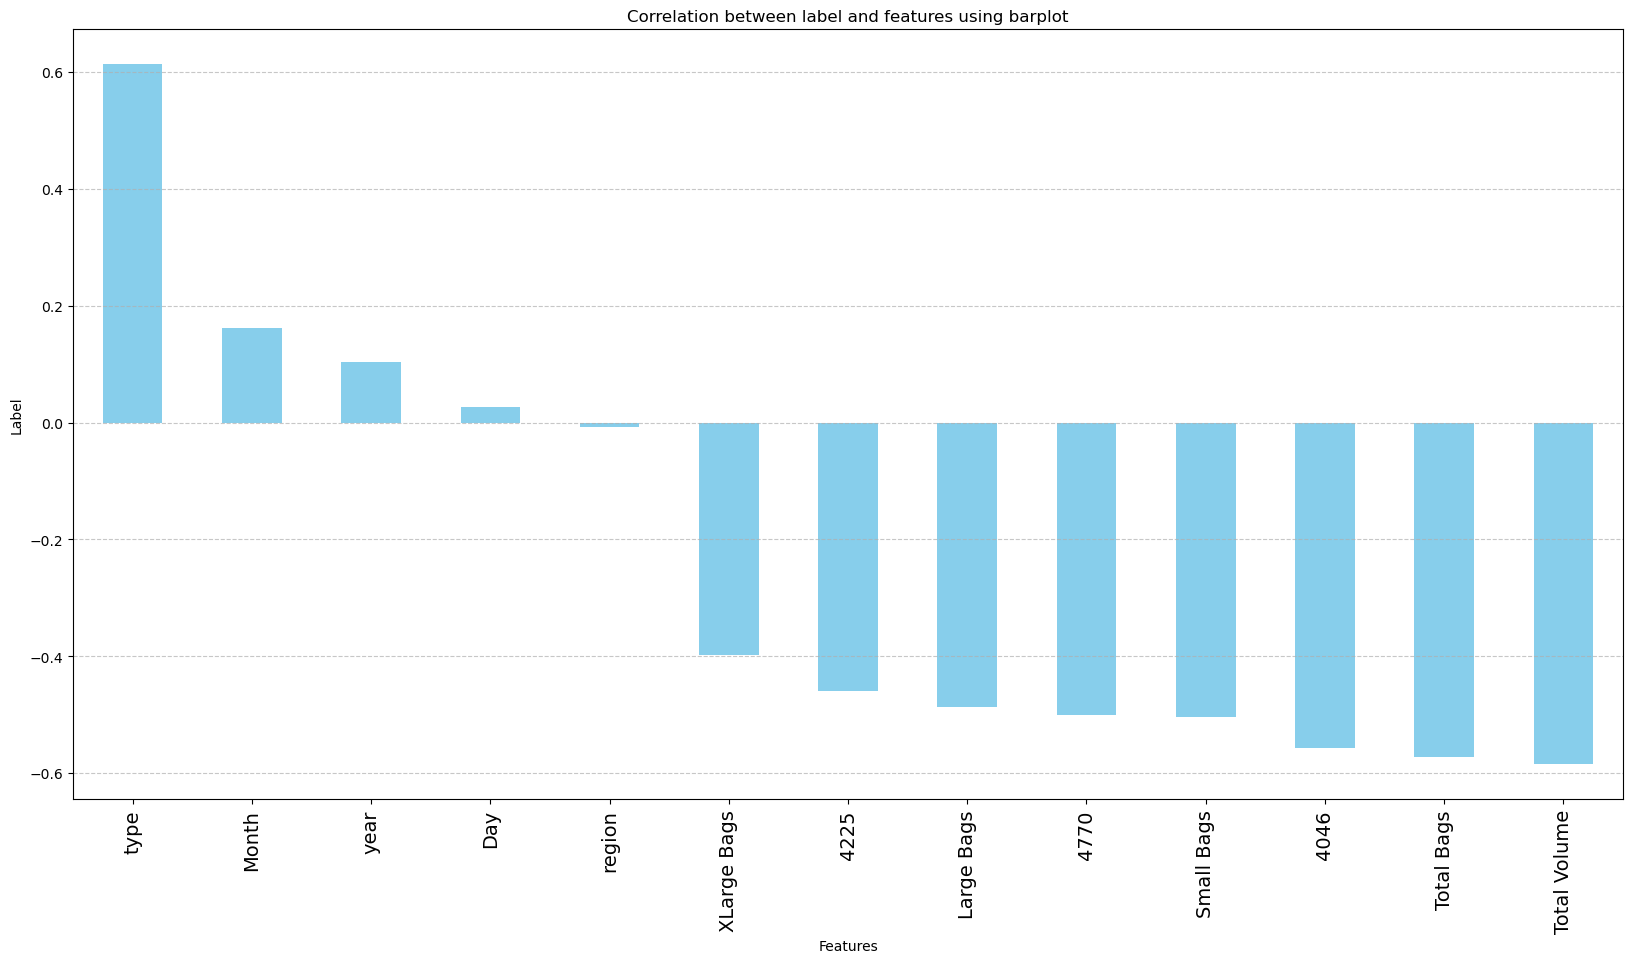

In [71]:
plt.figure(figsize=(20,10))
df.corr()['AveragePrice'].sort_values(ascending=False).drop(['AveragePrice']).plot(kind='bar', color='skyblue')
plt.xlabel('Features')
plt.ylabel('Label')
plt.xticks(fontsize=14)
plt.title('Correlation between label and features using barplot')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

Observations:
- Column "4046" exhibits the strongest correlation with the target variable.
- Other columns like "Large Bags", "Total Bags", "Total Volume", and "Small Bags" also demonstrate significant relationships with the target variable.
- Conversely, "Day" and "Month" as well as "XLarge Bags" show the weakest relationships with the target variable.

In [72]:
df=df.drop(columns=['type','year','Month','Day','XLarge Bags','AveragePrice'],axis=1)
df

Total Volume      4046      4225      4770  Total Bags  Small Bags  \
0         -0.086605 -0.658619  0.307313 -0.247250   -0.524004   -0.340627   
1         -0.155746 -0.776870  0.231647 -0.201041   -0.485890   -0.306425   
2          0.179327 -0.731947  0.579503 -0.007072   -0.552018   -0.366303   
3          0.003876 -0.634200  0.415100 -0.148322   -0.695449   -0.496853   
4         -0.187640 -0.685293  0.224806 -0.137918   -0.669157   -0.477201   
...             ...       ...       ...       ...         ...         ...   
18244     -0.674587 -0.467366 -0.919470 -1.238310   -0.334466   -0.178839   
18245     -0.767550 -0.619883 -0.665372 -1.238310   -0.496897   -0.325977   
18246     -0.771505 -0.619831 -0.772496  0.401546   -0.490952   -0.308728   
18247     -0.698077 -0.550282 -0.710543  0.401246   -0.424252   -0.248932   
18248     -0.663809 -0.367908 -0.785173  0.122919   -0.384961   -0.212590   

       Large Bags  region  
0       -0.773351       0  
1       -0.763435       0  
2       -0.750820       0  
3       -0.691865       0  
4       -0.600975       0  
...           ...     ...  
18244   -0.410859      53  
18245   -0.481465      53  
18246   -0.943486      53  
18247   -0.908510      53  
18248   -1.042250      53  

[17903 rows x 8 columns]

# Preparing Data for Machine Learning

# Splitting

Choose the dependent(label)and independent variables.

In [73]:
X = df.drop('region', axis=1)
Y = df['region']

I've split the dataset into features and labels, with X representing all the feature columns and Y representing the target label column.

In [74]:
X

Total Volume      4046      4225      4770  Total Bags  Small Bags  \
0         -0.086605 -0.658619  0.307313 -0.247250   -0.524004   -0.340627   
1         -0.155746 -0.776870  0.231647 -0.201041   -0.485890   -0.306425   
2          0.179327 -0.731947  0.579503 -0.007072   -0.552018   -0.366303   
3          0.003876 -0.634200  0.415100 -0.148322   -0.695449   -0.496853   
4         -0.187640 -0.685293  0.224806 -0.137918   -0.669157   -0.477201   
...             ...       ...       ...       ...         ...         ...   
18244     -0.674587 -0.467366 -0.919470 -1.238310   -0.334466   -0.178839   
18245     -0.767550 -0.619883 -0.665372 -1.238310   -0.496897   -0.325977   
18246     -0.771505 -0.619831 -0.772496  0.401546   -0.490952   -0.308728   
18247     -0.698077 -0.550282 -0.710543  0.401246   -0.424252   -0.248932   
18248     -0.663809 -0.367908 -0.785173  0.122919   -0.384961   -0.212590   

       Large Bags  
0       -0.773351  
1       -0.763435  
2       -0.750820  
3       -0.691865  
4       -0.600975  
...           ...  
18244   -0.410859  
18245   -0.481465  
18246   -0.943486  
18247   -0.908510  
18248   -1.042250  

[17903 rows x 7 columns]

In [75]:
Y

0         0
1         0
2         0
3         0
4         0
         ..
18244    53
18245    53
18246    53
18247    53
18248    53
Name: region, Length: 17903, dtype: int32

# Feature Scaling

In [76]:
scaler = StandardScaler()
X = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)
X 

Total Volume      4046      4225      4770  Total Bags  Small Bags  \
0         -0.076530 -0.656903  0.335221 -0.243408   -0.547244   -0.370542   
1         -0.147484 -0.777783  0.257481 -0.196561   -0.507065   -0.333666   
2          0.196376 -0.731861  0.614876  0.000080   -0.576775   -0.398225   
3          0.016324 -0.631941  0.445964 -0.143116   -0.727977   -0.538979   
4         -0.180215 -0.684170  0.250452 -0.132569   -0.700261   -0.517791   
...             ...       ...       ...       ...         ...         ...   
17898     -0.679933 -0.461397 -0.925202 -1.248125   -0.347438   -0.196107   
17899     -0.775334 -0.617305 -0.664137 -1.248125   -0.518668   -0.354746   
17900     -0.779393 -0.617252 -0.774198  0.414330   -0.512401   -0.336149   
17901     -0.704039 -0.546157 -0.710546  0.414026   -0.442088   -0.271679   
17902     -0.668873 -0.359728 -0.787223  0.131863   -0.400668   -0.232497   

       Large Bags  
0       -0.774585  
1       -0.764440  
2       -0.751534  
3       -0.691219  
4       -0.598231  
...           ...  
17898   -0.403726  
17899   -0.475961  
17900   -0.948648  
17901   -0.912865  
17902   -1.049692  

[17903 rows x 7 columns]

In [77]:
Y

0         0
1         0
2         0
3         0
4         0
         ..
18244    53
18245    53
18246    53
18247    53
18248    53
Name: region, Length: 17903, dtype: int32

In [80]:
vif=pd.DataFrame()
vif['VIF Values']=[variance_inflation_factor(X.values,i) for i in range(len(X.columns))]
vif['Features']=X.columns
vif

VIF Values      Features
0   49.364481  Total Volume
1    6.660707          4046
2   10.791462          4225
3    3.372340          4770
4   35.832332    Total Bags
5   17.681524    Small Bags
6    3.478436    Large Bags

Here, we observe that the VIF (Variance Inflation Factor) exceeds the acceptable range in the columns for "Total Volume", "Total Bags", and "Small Bags". Hence, we need to drop these columns to alleviate multicollinearity among features.

In [81]:
X=X.drop(columns=['Total Volume','Total Bags',],axis=1)
X

4046      4225      4770  Small Bags  Large Bags
0     -0.656903  0.335221 -0.243408   -0.370542   -0.774585
1     -0.777783  0.257481 -0.196561   -0.333666   -0.764440
2     -0.731861  0.614876  0.000080   -0.398225   -0.751534
3     -0.631941  0.445964 -0.143116   -0.538979   -0.691219
4     -0.684170  0.250452 -0.132569   -0.517791   -0.598231
...         ...       ...       ...         ...         ...
17898 -0.461397 -0.925202 -1.248125   -0.196107   -0.403726
17899 -0.617305 -0.664137 -1.248125   -0.354746   -0.475961
17900 -0.617252 -0.774198  0.414330   -0.336149   -0.948648
17901 -0.546157 -0.710546  0.414026   -0.271679   -0.912865
17902 -0.359728 -0.787223  0.131863   -0.232497   -1.049692

[17903 rows x 5 columns]

In [82]:
vif=pd.DataFrame()
vif['VIF Values']=[variance_inflation_factor(X.values,i) for i in range(len(X.columns))]
vif['Features']=X.columns
vif

VIF Values    Features
0    3.456797        4046
1    4.075010        4225
2    3.366553        4770
3    3.805453  Small Bags
4    1.782037  Large Bags

We can observe that multicollinearity has been successfully mitigated among the features. Now, we can proceed further with the model building process.

In [83]:
Y.value_counts()

region
0     338
37    338
26    338
28    338
29    338
30    338
31    338
32    338
33    338
34    338
35    338
38    338
24    338
39    338
40    338
41    338
44    338
45    338
46    338
49    338
50    338
52    338
25    338
27    338
6     338
22    338
5     338
2     338
8     338
19    338
18    338
17    338
16    338
15    338
7     338
13    338
4     338
9     338
11    338
10    337
20    337
14    337
12    336
21    336
53    335
48    334
3     333
23    329
1     320
43    312
42    310
36    308
47    279
51    178
Name: count, dtype: int64

We notice that the data is unbalanced, hence we will balance it using the oversampling method.

In [84]:
# We're adding samples to ensure an equal number of instances for all categorical quality values.
from imblearn.over_sampling import SMOTE
oversample = SMOTE()
X, Y = oversample.fit_resample(X, Y)

In [85]:
Y.value_counts()

region
0     338
40    338
29    338
30    338
31    338
32    338
33    338
34    338
35    338
36    338
37    338
38    338
39    338
41    338
1     338
42    338
43    338
44    338
45    338
46    338
47    338
48    338
49    338
50    338
51    338
52    338
28    338
27    338
26    338
25    338
2     338
3     338
4     338
5     338
6     338
7     338
8     338
9     338
10    338
11    338
12    338
13    338
14    338
15    338
16    338
17    338
18    338
19    338
20    338
21    338
22    338
23    338
24    338
53    338
Name: count, dtype: int64

In [88]:
maxacc=0
maxrs=0
for i in range(1,200):
    x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.30,random_state=i) 
    lr=LinearRegression()
    lr.fit(x_train,y_train)
    pred=lr.predict(x_test)
    acc=r2_score(y_test,pred)   
    if acc>maxacc:
        maxacc=acc
        maxrs=i
print('Best accuracy is', maxacc,'at random state',maxrs) 

Best accuracy is 0.06701131608899014 at random state 4


# Creating the training and testing data sets

In [89]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=maxrs)

20% of the dataset will be used for testing, and the remaining 80% for training our machine learning models.

In [90]:
X_train.shape

(14601, 5)

In [91]:
X_test.shape

(3651, 5)

In [92]:
Y_train.shape

(14601,)

In [93]:
Y_test.shape

(3651,)

# Machine Learning Model for Classification and Evaluation Metrics

In [94]:
# Classification Model Function
from sklearn.metrics import classification_report,confusion_matrix,roc_curve,accuracy_score
def classify(model, X, Y):
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=maxrs)
    
    # Training the model
    model.fit(X_train, Y_train)
    
    # Predicting Y_test
    pred = model.predict(X_test)
    
    # Accuracy Score
    acc_score = (accuracy_score(Y_test, pred))*100
    print("Accuracy Score:", acc_score)
    
    # Classification Report
    class_report = classification_report(Y_test, pred)
    print("\nClassification Report:\n", class_report)
    
    #Confusion Matrix
    confusion_matx=confusion_matrix(Y_test, pred)
    print("\nConfusion Matrix:\n",confusion_matx)
    
    # Cross Validation Score
    cv_score = (cross_val_score(model, X, Y, cv=5).mean())*100
    print("\nCross Validation Score:", cv_score)
    
    # Result of accuracy minus cv scores
    result = acc_score - cv_score
    print("\nAccuracy Score - Cross Validation Score is", result)

I've created a class to handle train-test splitting, model training, label prediction, accuracy score calculation, classification report generation, cross-validation scoring,Confusion Matrix, and comparison of accuracy and cross-validation scores for any machine learning model that utilizes this function.

In [95]:
# Logistic Regression

model=LogisticRegression()
classify(model, X, Y)

Accuracy Score: 24.349493289509724

Classification Report:
               precision    recall  f1-score   support

           0       0.19      0.17      0.18        76
           1       0.10      0.20      0.13        59
           2       0.20      0.26      0.23        58
           3       0.04      0.03      0.03        74
           4       0.40      0.34      0.37        71
           5       0.11      0.05      0.07        80
           6       0.59      0.78      0.67        65
           7       0.29      0.43      0.35        72
           8       0.39      0.55      0.45        62
           9       0.28      0.61      0.38        70
          10       0.00      0.00      0.00        68
          11       0.33      0.26      0.29        69
          12       0.07      0.18      0.11        55
          13       0.00      0.00      0.00        72
          14       0.12      0.09      0.11        64
          15       0.35      0.35      0.35        66
          16       0.

In [96]:
# Random Forest Classifier

model=RandomForestClassifier(max_depth=15, random_state=111)
classify(model, X, Y)

Accuracy Score: 83.15529991783073

Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.86      0.83        76
           1       0.63      0.73      0.68        59
           2       0.86      0.98      0.92        58
           3       0.85      0.77      0.81        74
           4       0.89      0.89      0.89        71
           5       0.87      0.66      0.75        80
           6       0.97      0.94      0.95        65
           7       0.91      0.74      0.82        72
           8       0.97      0.97      0.97        62
           9       0.83      0.84      0.84        70
          10       0.68      0.79      0.73        68
          11       0.81      0.91      0.86        69
          12       0.94      0.85      0.90        55
          13       0.82      0.78      0.80        72
          14       0.76      0.84      0.80        64
          15       1.00      0.98      0.99        66
          16       0.9

In [97]:
# Extra Trees Classifier

model=ExtraTreesClassifier()
classify(model, X, Y)

Accuracy Score: 86.22295261572171

Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.87      0.89        76
           1       0.81      0.80      0.80        59
           2       0.89      0.97      0.93        58
           3       0.83      0.80      0.81        74
           4       0.87      0.86      0.87        71
           5       0.90      0.75      0.82        80
           6       1.00      0.94      0.97        65
           7       0.91      0.88      0.89        72
           8       0.94      0.95      0.94        62
           9       0.87      0.89      0.88        70
          10       0.80      0.84      0.82        68
          11       0.86      0.90      0.88        69
          12       0.93      0.91      0.92        55
          13       0.84      0.86      0.85        72
          14       0.79      0.88      0.83        64
          15       1.00      0.98      0.99        66
          16       0.9

In [98]:
# K Neighbors Classifier

model=KNeighborsClassifier(n_neighbors=15)
classify(model, X, Y)

Accuracy Score: 80.36154478225144

Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.87      0.83        76
           1       0.75      0.83      0.79        59
           2       0.82      0.95      0.88        58
           3       0.78      0.73      0.76        74
           4       0.92      0.76      0.83        71
           5       0.83      0.61      0.71        80
           6       0.95      0.91      0.93        65
           7       0.82      0.86      0.84        72
           8       0.95      0.98      0.97        62
           9       0.83      0.84      0.84        70
          10       0.71      0.81      0.76        68
          11       0.77      0.88      0.82        69
          12       0.89      0.85      0.87        55
          13       0.81      0.75      0.78        72
          14       0.73      0.80      0.76        64
          15       0.97      0.97      0.97        66
          16       0.8

In [102]:
# Support Vector Classifier

model=SVC(C=1.0, kernel='rbf', gamma='auto', random_state=42)
classify(model, X, Y)

Accuracy Score: 73.07586962476034

Classification Report:
               precision    recall  f1-score   support

           0       0.75      0.89      0.81        76
           1       0.58      0.61      0.60        59
           2       0.84      0.93      0.89        58
           3       0.76      0.65      0.70        74
           4       0.77      0.70      0.74        71
           5       0.84      0.53      0.65        80
           6       0.95      0.94      0.95        65
           7       0.80      0.74      0.77        72
           8       0.94      0.97      0.95        62
           9       0.74      0.84      0.79        70
          10       0.67      0.74      0.70        68
          11       0.72      0.83      0.77        69
          12       0.83      0.80      0.81        55
          13       0.59      0.65      0.62        72
          14       0.60      0.80      0.68        64
          15       0.94      0.95      0.95        66
          16       0.8

In [103]:
# Decision Tree Classifier

model=DecisionTreeClassifier(random_state=21, max_depth=15)
classify(model, X, Y)

Accuracy Score: 72.80197206244864

Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.83      0.83        76
           1       0.48      0.75      0.59        59
           2       0.90      0.91      0.91        58
           3       0.79      0.72      0.75        74
           4       0.88      0.83      0.86        71
           5       0.78      0.59      0.67        80
           6       0.92      0.89      0.91        65
           7       0.91      0.67      0.77        72
           8       0.89      0.95      0.92        62
           9       0.79      0.64      0.71        70
          10       0.46      0.72      0.56        68
          11       0.79      0.72      0.76        69
          12       0.80      0.73      0.76        55
          13       0.74      0.58      0.65        72
          14       0.61      0.80      0.69        64
          15       1.00      0.86      0.93        66
          16       0.9

In [104]:
# XGB Classifier

model=xgb.XGBClassifier(verbosity=0)
classify(model, X, Y)

Accuracy Score: 82.74445357436319

Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.83      0.85        76
           1       0.69      0.73      0.71        59
           2       0.86      0.95      0.90        58
           3       0.83      0.81      0.82        74
           4       0.88      0.83      0.86        71
           5       0.82      0.75      0.78        80
           6       0.97      0.94      0.95        65
           7       0.89      0.79      0.84        72
           8       0.95      0.94      0.94        62
           9       0.81      0.87      0.84        70
          10       0.72      0.79      0.76        68
          11       0.85      0.88      0.87        69
          12       0.89      0.89      0.89        55
          13       0.84      0.71      0.77        72
          14       0.74      0.86      0.80        64
          15       1.00      0.95      0.98        66
          16       0.8

# ETRA TREES CLASSIFIER IS OUR BEST MODEL BECAUSE IT HAS Diffrence between Accuracy score and cross validation score is LEAST

# Hyper parameter tuning on the best ML Model

In [105]:
# ExtraTrees Classifier
from sklearn.model_selection import GridSearchCV

param_grid ={'criterion':['gini','entropy'],
           'random_state':[10,50,1000],
           'max_depth':[0,10,20],
           'n_jobs':[-2,-1,1],
           'n_estimators':[50,100,200,300]}

In [106]:
ETC=ExtraTreesClassifier()

In [109]:
grid_search= GridSearchCV(estimator=ETC, param_grid=param_grid, cv=5)

In [110]:
grid_search.fit(X_train, Y_train)

GridSearchCV(cv=5, estimator=ExtraTreesClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [0, 10, 20],
                         'n_estimators': [50, 100, 200, 300],
                         'n_jobs': [-2, -1, 1],
                         'random_state': [10, 50, 1000]})

In [112]:
grid_search.best_params_

{'criterion': 'gini',
 'max_depth': 20,
 'n_estimators': 300,
 'n_jobs': -2,
 'random_state': 1000}

In [113]:
final_model_2=ExtraTreesClassifier(criterion='gini',max_depth=20,n_estimators=300,n_jobs=-2,random_state=1000)

In [114]:
final_model_2.fit(X_train,Y_train)
pred=final_model_2.predict(X_test)
acc=accuracy_score(Y_test,pred)
print(acc*100)

86.11339359079705


# Saving the model

In [121]:
import joblib

filename = "FinalModel_6.pkl"
joblib.dump(final_model_2, filename)

['FinalModel_6.pkl']

In [117]:
model=joblib.load("FinalModel_6.pkl")

prediction=model.predict(X_test)
prediction

array([25, 22, 20, ..., 18, 37, 19])

In [118]:
a=np.array(Y_test)
df=pd.DataFrame()
df['Predicted']=prediction
df['Original']=a
df.head()

Predicted  Original
0         25        25
1         22        22
2         20        20
3         19        19
4          0         0

In [119]:
df.tail()

Predicted  Original
3646         31        31
3647         21        21
3648         18        18
3649         37        37
3650         19        19